# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The initial code was provided by Dr. Sandoval (Assitant professor of Electrical Engineering, New Mexico State University) as a starting point for project. https://web.nmsu.edu/~spsandov/ 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this problem, application of multi-layer perceptron with three hidden layers and 10 neurons (4 in first, 3 in second, and 3 in last hidden layer) for classifying XOR Dataset is considered.  

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
import pandas as pd
import numpy.matlib
import numpy as np
import matplotlib
import math
plt.style.use('ggplot')
label = [-1,1]

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [2]:
def trainMLP(X,D,H,eta,alpha,epochMax,MSETarget):
    '''%==========================================================================
    % Call Syntax:  [Wh,Wo,MSE] = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)
    %
    % Description:  The matrix implementation of the Backpropagation algorithm
    %               for a Multilayer Perceptron (MLP).
    %
    % Input Arguments:
    %	Name: X
    %	Type: (p x N) dimensional matrix, where p is a number of the inputs and N is a training size
    %	Description: a series of input oberservation vectors as columns in a matrix
    %
    %	Name: D
    %	Type: (m x N) dimensional matrix, where m is a number of the output neurons and N is a training size
    %	Description: a series of desired output responses as columns in a matrix
    %
    %	Name: H
    %	Type: vector
    %	Description: Number of hidden neurons in each hidden layer
    %
    %	Name: eta
    %	Type: scalar
    %	Description: learning rate parameter
    %
    %	Name: alpha
    %	Type: scalar
    %	Description: momentum parameter
    %
    %	Name: epochMax
    %	Type:  scalar
    %	Description: maximum number of training epochs
    %
    %	Name: MSETarget (optional)
    %	Type:  scalar (default: MSETarget = 1e-12)
    %	Description: target mse error rate
    %
    % Output Arguments:
    %	Name: Wh
    %	Type: Cell arrray, with each cell containing a (H(j) x p+1) dimensional matrix, where H(j) is the number of neurons in the j'th hidden layer
    %	Description: hidden layer weight matrix for each hidden layer
    %
    %	Name: Wo
    %	Type: (m x H(end)+1) dimensional matrix
    %	Description: Output layer weight matrix
    %
    %	Name: MSE
    %	Type: vector
    %	Description: mean square error per epoch
    %
    %--------------------------------------------------------------------------
    % Notes:
    %
    % References:
    % [1] - S. Haykin, Neural Networks and Learning Machines, vol. 3, Pearson,2009
    %
    %--------------------------------------------------------------------------
    % Author: Steven Sandoval
    %--------------------------------------------------------------------------
    % Revision History:
    %
    %          Steven Sandoval - 25 September 2012 - Adapted 2-layer MLP codes by Marcelo Augusto Costa Fernandes (mfernandes@dca.ufrn.br).
    %          Steven Sandoval -   06 October 2012 - Cleaned code, added comments
    %          Steven Sandoval -      01 July 2018 - updated references and variable names, added ReLU activation function
    %          Steven Sandoval -   30 October 2019 - simplified code for EE565 Project
    %          Brandon Byford  -   30 OCtober 2019 - ported to python3 
    %==========================================================================
    ''';
    
    '''%-----------
    %INITIALIZE
    %-----------''';
    
    a = 1.7159
    b = 2/3.
    [p, N] = np.shape(np.array(X))                 #dimension of input vector and number of training data pts
    m = len(D)                                  #number of output neurons
    bias = -1                                      #bias value
    Wh=[]
    WhAnt=[]
    X = np.concatenate([bias*np.ones([1,N]),X ],axis=0)                  #add zero'th order terms
    for j in range(len(H)):
        if j ==0:
            Wh.append(np.random.rand(H[j],p+1))                          #initialize first hidden layer weights
            WhAnt.append(np.zeros([H[j],p+1]))                      #initialize variable for weight correction using momentum 
        else:
            Wh.append( np.random.rand(H[j],H[j-1]+1)  ) #initialize hidden layer weights
            WhAnt.append(np.zeros([H[j],H[j-1]+1]) )                #initialize variable for weight correction using momentum 
            
    Wo = np.random.rand(m,H[-1]+1)                                 #initialize output layer weights
    WoAnt = np.zeros([m,H[-1]+1])                            #initialize variable for weight correction using momentum
    MSETemp = np.zeros([epochMax,1])                   #allocate memory for MSE error for each epoch

    for i in range(epochMax):
        O=[]
        '''%-------------------------------------------------
        %PROPAGATE INPUTS FORWARD
        %-------------------------------------------------''';
        
        '''%------------------------
        %HIDDEN LAYER
        %------------------------''';
        for j in range(len(H)):               #%loop over each hidden layer
            if j==0:
                V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
            else:
                V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
            PHI = a * np.tanh(b*V)         #%activation function [1] Eqn(4.37)
            O.append(np.concatenate([bias*np.ones([1,N]),PHI],axis=0))   #%add zero'th order terms
        
        '''%------------------------
        %OUTPUT LAYER
        %------------------------''';
        V = Wo@O[-1]                 #%weighted sum of inputs [1] Eqn(4.29)
        Y = a * np.tanh(b*V)       #%activation function [1] Eqn(4.37)


        '''%------------------------
        %ERROR CALCULATION 
        %------------------------''';
        E = D - Y                  #%calclate error
        mse = np.mean(E**2)    #%calculate mean square error
        
        MSETemp[i,0] = mse           #%save mse

        #%DISPLAY PROGRESS, BREAK IF ERROR CONSTRAINT MET
        print('epoch = ' +str(i)+ ' mse = ' +str(mse))
        if (mse < MSETarget):
            MSE = MSETemp
            return(Wh,Wo,MSE)
        
        '''%-------------------------------------------------
        %BACK PROPAGATE ERROR
        %-------------------------------------------------

        %------------------------
        %OUTPUT LAYER
        %------------------------''';
        PHI_PRMo = b/a *(a-Y)*(a+Y)   #%derivative of activation function [1] Eqn(4.38)

        dGo = E * PHI_PRMo                 #%local gradient [1] Eqn(4.35/39)
        DWo = dGo@O[-1].T                    #%non-scaled weight correction [1] Eqn(4.27)

        Wo = Wo + eta*DWo + alpha*WoAnt  #%weight correction including momentum term [1] Eqn(4.41)
        WoAnt = eta*DWo + alpha*WoAnt                         #%save weight correction for momentum calculation

        '''%------------------------
        %HIDDEN LAYERS
        %------------------------''';
        
        
        for j in np.arange(len(H))[::-1]:
            PHI_PRMh = b/a *(a-O[j])*(a+O[j])         #%derivative of activation function [1] Eqn(4.38)
            
            if j==(len(H)-1):
                dGh = PHI_PRMh * (Wo.T @ dGo)                   #%local gradient[1] Eqn(4.36/40)
            else:
                dGh = PHI_PRMh * (Wh[j+1].T @ np.matlib.repmat( dGo,Wh[j+1].shape[0],1 ) )         # %local gradient[1] Eqn(4.36/40)
            dGh = dGh[1:,:]                             #%dicard first row of local gradient (bias doesn't update)
            
            if j==0:
                DWh = dGh@X.T                            #%non-scaled weight correction [1] Eqn(4.27/30)
            else:
                DWh = dGh@O[j-1].T                       #%non-scaled weight correction [1] Eqn(4.27/31)
            
            Wh[j] =Wh[j]+ eta*DWh + alpha*WhAnt[j]  # %weight correction including momentum term [1] Eqn(4.41)
            WhAnt[j] =eta*DWh + alpha*WhAnt[j]     #%save weight correction for momentum calculation

    MSE = MSETemp
    return(Wh,Wo,MSE)

In [3]:
def MLP(X,Wh,Wo):
    '''%-----------
    %INITIALIZE
    %-----------''';
    a = 1.7159
    b = 2/3.
    N = len(X[0,:])               #%number of training data pts
    bias = -1                  # %initial bias value
    O=[]
    X = np.concatenate((bias*np.ones([1,N]) , X),axis=0)    #%add zero'th order terms
    H=[]
    for j in range(len(Wh)):
        H.append(len(Wh[j]))
    
    
    '''
    %-----
    %MAIN
    %-----

    %-------------------------------------------------
    %PROPAGATE INPUTS FORWARD
    %-------------------------------------------------
    %------------------------
    %HIDDEN LAYER
    %------------------------''';
    
    for j in range(len(H)):               #%loop over each hidden layer
        if j==0:
            V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
        else:
            V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
        
        PHI = a * np.tanh(b*V)     #%acivation function [1] Eqn(4.37)
        O.append( np.concatenate((bias*np.ones([1,N]),PHI),axis=0))   #%add zero'th order terms
    

    '''%------------------------
    %OUTPUT LAYER
    %------------------------''';
    V = Wo@O[-1]            #%weighted sum of inputs [1] Eqn(4.29)
    Y = a * np.tanh(b*V)    #%activation function [1] Eqn(4.37)

    return Y

In [4]:
def circGuass(N,Mean,VAR):
    dimension = len(Mean)
    a = np.array(Mean)
    p = np.random.randn(dimension,N)
    h = np.tile(a, (2, N//2))
    x = math.sqrt(Var) * p + h
    return x

In [5]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [6]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh1,Wo1,MSE1 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.4189837267088405
epoch = 1 mse = 2.364867570710391
epoch = 2 mse = 2.310757927880773
epoch = 3 mse = 2.255545353990642
epoch = 4 mse = 2.198180362647225
epoch = 5 mse = 2.1377748998871513
epoch = 6 mse = 2.0736656581637
epoch = 7 mse = 2.0054664801137174
epoch = 8 mse = 1.9331141500731712
epoch = 9 mse = 1.8569025533726402
epoch = 10 mse = 1.777497200325331
epoch = 11 mse = 1.6959256749523999
epoch = 12 mse = 1.61354533078022
epoch = 13 mse = 1.5319898829648193
epoch = 14 mse = 1.4530874161345262
epoch = 15 mse = 1.3787314488813238
epoch = 16 mse = 1.3106917517495298
epoch = 17 mse = 1.250383303209333
epoch = 18 mse = 1.1986549458315203
epoch = 19 mse = 1.1556772466050584
epoch = 20 mse = 1.1209770631295586
epoch = 21 mse = 1.0936016113740588
epoch = 22 mse = 1.072343511677284
epoch = 23 mse = 1.0559510601232216
epoch = 24 mse = 1.0432770226098451
epoch = 25 mse = 1.0333561849631971
epoch = 26 mse = 1.0254259715948246
epoch = 27 mse = 1.0189119611824449
epoch = 28 mse

epoch = 239 mse = 0.9481704197321456
epoch = 240 mse = 0.948340219787107
epoch = 241 mse = 0.9484918062993096
epoch = 242 mse = 0.9486156515947469
epoch = 243 mse = 0.9487007265549459
epoch = 244 mse = 0.9487344702046107
epoch = 245 mse = 0.94870281247633
epoch = 246 mse = 0.9485902619018945
epoch = 247 mse = 0.948380066885045
epoch = 248 mse = 0.948054454486413
epoch = 249 mse = 0.9475949445758693
epoch = 250 mse = 0.9469827303892379
epoch = 251 mse = 0.9461991098799988
epoch = 252 mse = 0.9452259468285209
epoch = 253 mse = 0.9440461373609791
epoch = 254 mse = 0.9426440568307961
epoch = 255 mse = 0.9410059638972454
epoch = 256 mse = 0.9391203426134626
epoch = 257 mse = 0.9369781686639008
epoch = 258 mse = 0.9345730917789936
epoch = 259 mse = 0.9319015321197758
epoch = 260 mse = 0.9289626935569498
epoch = 261 mse = 0.9257585009316408
epoch = 262 mse = 0.9222934713978963
epoch = 263 mse = 0.9185745317641973
epoch = 264 mse = 0.9146107944458451
epoch = 265 mse = 0.9104133043818138
epoch 

epoch = 510 mse = 0.3324237249835476
epoch = 511 mse = 0.3318284013223071
epoch = 512 mse = 0.3312369665726438
epoch = 513 mse = 0.3306493670429515
epoch = 514 mse = 0.3300655502393243
epoch = 515 mse = 0.3294854648310605
epoch = 516 mse = 0.32890906061713804
epoch = 517 mse = 0.32833628849365715
epoch = 518 mse = 0.3277671004222431
epoch = 519 mse = 0.3272014493994002
epoch = 520 mse = 0.3266392894268063
epoch = 521 mse = 0.3260805754825353
epoch = 522 mse = 0.32552526349319405
epoch = 523 mse = 0.32497331030695753
epoch = 524 mse = 0.32442467366748706
epoch = 525 mse = 0.3238793121887124
epoch = 526 mse = 0.32333718533046196
epoch = 527 mse = 0.3227982533749193
epoch = 528 mse = 0.32226247740388797
epoch = 529 mse = 0.32172981927684485
epoch = 530 mse = 0.3212002416097593
epoch = 531 mse = 0.3206737077546603
epoch = 532 mse = 0.3201501817799281
epoch = 533 mse = 0.31962962845129017
epoch = 534 mse = 0.3191120132135004
epoch = 535 mse = 0.31859730217268023
epoch = 536 mse = 0.31808546

epoch = 777 mse = 0.24424241006074404
epoch = 778 mse = 0.24408581367684137
epoch = 779 mse = 0.2439302315489289
epoch = 780 mse = 0.24377566035990814
epoch = 781 mse = 0.24362209676117585
epoch = 782 mse = 0.2434695373727657
epoch = 783 mse = 0.24331797878349773
epoch = 784 mse = 0.24316741755113802
epoch = 785 mse = 0.24301785020256705
epoch = 786 mse = 0.24286927323395552
epoch = 787 mse = 0.24272168311094997
epoch = 788 mse = 0.2425750762688658
epoch = 789 mse = 0.24242944911288822
epoch = 790 mse = 0.2422847980182807
epoch = 791 mse = 0.24214111933060195
epoch = 792 mse = 0.2419984093659286
epoch = 793 mse = 0.2418566644110864
epoch = 794 mse = 0.2417158807238872
epoch = 795 mse = 0.2415760545333734
epoch = 796 mse = 0.2414371820400684
epoch = 797 mse = 0.24129925941623317
epoch = 798 mse = 0.24116228280612945
epoch = 799 mse = 0.24102624832628836
epoch = 800 mse = 0.2408911520657844
epoch = 801 mse = 0.2407569900865156
epoch = 802 mse = 0.24062375842348846
epoch = 803 mse = 0.240

epoch = 1033 mse = 0.22537948847947567
epoch = 1034 mse = 0.2253453384616248
epoch = 1035 mse = 0.22531128553428614
epoch = 1036 mse = 0.22527732961686558
epoch = 1037 mse = 0.22524347065819142
epoch = 1038 mse = 0.22520970863587153
epoch = 1039 mse = 0.22517604355564197
epoch = 1040 mse = 0.2251424754507118
epoch = 1041 mse = 0.22510900438109993
epoch = 1042 mse = 0.22507563043296794
epoch = 1043 mse = 0.22504235371794812
epoch = 1044 mse = 0.22500917437246618
epoch = 1045 mse = 0.22497609255706172
epoch = 1046 mse = 0.22494310845570303
epoch = 1047 mse = 0.2249102222751008
epoch = 1048 mse = 0.22487743424401813
epoch = 1049 mse = 0.22484474461257892
epoch = 1050 mse = 0.22481215365157464
epoch = 1051 mse = 0.22477966165176935
epoch = 1052 mse = 0.22474726892320426
epoch = 1053 mse = 0.224714975794503
epoch = 1054 mse = 0.2246827826121746
epoch = 1055 mse = 0.22465068973991986
epoch = 1056 mse = 0.22461869755793673
epoch = 1057 mse = 0.224586806462228
epoch = 1058 mse = 0.224555016863

epoch = 1295 mse = 0.22041879115372903
epoch = 1296 mse = 0.2204138965932657
epoch = 1297 mse = 0.220409072439452
epoch = 1298 mse = 0.22040431824315612
epoch = 1299 mse = 0.22039963355751555
epoch = 1300 mse = 0.22039501793794666
epoch = 1301 mse = 0.22039047094215236
epoch = 1302 mse = 0.22038599213013027
epoch = 1303 mse = 0.2203815810641791
epoch = 1304 mse = 0.220377237308906
epoch = 1305 mse = 0.220372960431232
epoch = 1306 mse = 0.22036875000039816
epoch = 1307 mse = 0.22036460558796986
epoch = 1308 mse = 0.22036052676784168
epoch = 1309 mse = 0.22035651311624185
epoch = 1310 mse = 0.22035256421173505
epoch = 1311 mse = 0.22034867963522595
epoch = 1312 mse = 0.22034485896996178
epoch = 1313 mse = 0.2203411018015349
epoch = 1314 mse = 0.2203374077178838
epoch = 1315 mse = 0.22033377630929543
epoch = 1316 mse = 0.22033020716840557
epoch = 1317 mse = 0.22032669989019943
epoch = 1318 mse = 0.22032325407201206
epoch = 1319 mse = 0.22031986931352823
epoch = 1320 mse = 0.22031654521678

epoch = 1561 mse = 0.22063155307752783
epoch = 1562 mse = 0.2206357011257982
epoch = 1563 mse = 0.22063986328950597
epoch = 1564 mse = 0.22064403949793923
epoch = 1565 mse = 0.22064822968085046
epoch = 1566 mse = 0.22065243376845153
epoch = 1567 mse = 0.2206566516914105
epoch = 1568 mse = 0.22066088338084744
epoch = 1569 mse = 0.22066512876833144
epoch = 1570 mse = 0.2206693877858762
epoch = 1571 mse = 0.22067366036593722
epoch = 1572 mse = 0.22067794644140776
epoch = 1573 mse = 0.22068224594561536
epoch = 1574 mse = 0.22068655881231855
epoch = 1575 mse = 0.22069088497570297
epoch = 1576 mse = 0.22069522437037867
epoch = 1577 mse = 0.2206995769313759
epoch = 1578 mse = 0.2207039425941427
epoch = 1579 mse = 0.2207083212945405
epoch = 1580 mse = 0.22071271296884176
epoch = 1581 mse = 0.2207171175537262
epoch = 1582 mse = 0.22072153498627806
epoch = 1583 mse = 0.22072596520398177
epoch = 1584 mse = 0.22073040814472072
epoch = 1585 mse = 0.22073486374677215
epoch = 1586 mse = 0.22073933194

epoch = 1838 mse = 0.2221504692408235
epoch = 1839 mse = 0.22215688452564555
epoch = 1840 mse = 0.2221633046653153
epoch = 1841 mse = 0.22216972964973053
epoch = 1842 mse = 0.2221761594689022
epoch = 1843 mse = 0.2221825941129551
epoch = 1844 mse = 0.22218903357212688
epoch = 1845 mse = 0.22219547783676769
epoch = 1846 mse = 0.22220192689733984
epoch = 1847 mse = 0.22220838074441826
epoch = 1848 mse = 0.22221483936868863
epoch = 1849 mse = 0.22222130276094837
epoch = 1850 mse = 0.22222777091210535
epoch = 1851 mse = 0.22223424381317847
epoch = 1852 mse = 0.2222407214552963
epoch = 1853 mse = 0.22224720382969768
epoch = 1854 mse = 0.2222536909277301
epoch = 1855 mse = 0.2222601827408509
epoch = 1856 mse = 0.22226667926062596
epoch = 1857 mse = 0.2222731804787294
epoch = 1858 mse = 0.2222796863869436
epoch = 1859 mse = 0.22228619697715818
epoch = 1860 mse = 0.2222927122413706
epoch = 1861 mse = 0.22229923217168504
epoch = 1862 mse = 0.22230575676031228
epoch = 1863 mse = 0.22231228599956

epoch = 2100 mse = 0.2239857467919338
epoch = 2101 mse = 0.2239933600192845
epoch = 2102 mse = 0.2240009783371739
epoch = 2103 mse = 0.22400860175382273
epoch = 2104 mse = 0.22401623027747924
epoch = 2105 mse = 0.22402386391641946
epoch = 2106 mse = 0.22403150267894711
epoch = 2107 mse = 0.22403914657339244
epoch = 2108 mse = 0.22404679560811283
epoch = 2109 mse = 0.22405444979149203
epoch = 2110 mse = 0.2240621091319403
epoch = 2111 mse = 0.2240697736378928
epoch = 2112 mse = 0.2240774433178115
epoch = 2113 mse = 0.22408511818018315
epoch = 2114 mse = 0.2240927982335191
epoch = 2115 mse = 0.22410048348635633
epoch = 2116 mse = 0.22410817394725555
epoch = 2117 mse = 0.22411586962480207
epoch = 2118 mse = 0.22412357052760434
epoch = 2119 mse = 0.22413127666429547
epoch = 2120 mse = 0.22413898804353116
epoch = 2121 mse = 0.2241467046739901
epoch = 2122 mse = 0.22415442656437404
epoch = 2123 mse = 0.22416215372340673
epoch = 2124 mse = 0.22416988615983455
epoch = 2125 mse = 0.224177623882

epoch = 2355 mse = 0.2261169132152559
epoch = 2356 mse = 0.22612612190421746
epoch = 2357 mse = 0.22613533799608704
epoch = 2358 mse = 0.2261445614986433
epoch = 2359 mse = 0.22615379241964215
epoch = 2360 mse = 0.22616303076681968
epoch = 2361 mse = 0.22617227654788963
epoch = 2362 mse = 0.22618152977054473
epoch = 2363 mse = 0.2261907904424564
epoch = 2364 mse = 0.22620005857127456
epoch = 2365 mse = 0.2262093341646276
epoch = 2366 mse = 0.22621861723012227
epoch = 2367 mse = 0.22622790777534338
epoch = 2368 mse = 0.22623720580785492
epoch = 2369 mse = 0.22624651133519857
epoch = 2370 mse = 0.22625582436489458
epoch = 2371 mse = 0.22626514490444125
epoch = 2372 mse = 0.22627447296131503
epoch = 2373 mse = 0.22628380854297067
epoch = 2374 mse = 0.22629315165684127
epoch = 2375 mse = 0.22630250231033738
epoch = 2376 mse = 0.2263118605108485
epoch = 2377 mse = 0.22632122626574125
epoch = 2378 mse = 0.22633059958236093
epoch = 2379 mse = 0.22633998046803042
epoch = 2380 mse = 0.226349368

epoch = 2616 mse = 0.2287903507764698
epoch = 2617 mse = 0.22880169562888175
epoch = 2618 mse = 0.22881304927370166
epoch = 2619 mse = 0.22882441171489912
epoch = 2620 mse = 0.22883578295644724
epoch = 2621 mse = 0.2288471630023224
epoch = 2622 mse = 0.22885855185650453
epoch = 2623 mse = 0.22886994952297735
epoch = 2624 mse = 0.22888135600572856
epoch = 2625 mse = 0.22889277130875021
epoch = 2626 mse = 0.2289041954360389
epoch = 2627 mse = 0.22891562839159524
epoch = 2628 mse = 0.22892707017942554
epoch = 2629 mse = 0.22893852080353974
epoch = 2630 mse = 0.2289499802679542
epoch = 2631 mse = 0.22896144857668999
epoch = 2632 mse = 0.22897292573377423
epoch = 2633 mse = 0.22898441174323897
epoch = 2634 mse = 0.2289959066091227
epoch = 2635 mse = 0.22900741033547037
epoch = 2636 mse = 0.22901892292633255
epoch = 2637 mse = 0.22903044438576672
epoch = 2638 mse = 0.22904197471783694
epoch = 2639 mse = 0.22905351392661452
epoch = 2640 mse = 0.22906506201617735
epoch = 2641 mse = 0.229076618

epoch = 2881 mse = 0.2321190707623108
epoch = 2882 mse = 0.23213293098733104
epoch = 2883 mse = 0.23214680170591964
epoch = 2884 mse = 0.23216068292846484
epoch = 2885 mse = 0.2321745746653893
epoch = 2886 mse = 0.23218847692714994
epoch = 2887 mse = 0.23220238972423726
epoch = 2888 mse = 0.23221631306717697
epoch = 2889 mse = 0.23223024696652775
epoch = 2890 mse = 0.23224419143288277
epoch = 2891 mse = 0.23225814647686924
epoch = 2892 mse = 0.23227211210914783
epoch = 2893 mse = 0.2322860883404132
epoch = 2894 mse = 0.23230007518139395
epoch = 2895 mse = 0.2323140726428516
epoch = 2896 mse = 0.23232808073558175
epoch = 2897 mse = 0.23234209947041343
epoch = 2898 mse = 0.23235612885820897
epoch = 2899 mse = 0.23237016890986387
epoch = 2900 mse = 0.2323842196363069
epoch = 2901 mse = 0.2323982810485
epoch = 2902 mse = 0.23241235315743794
epoch = 2903 mse = 0.23242643597414886
epoch = 2904 mse = 0.23244052950969304
epoch = 2905 mse = 0.23245463377516443
epoch = 2906 mse = 0.2324687487816

epoch = 3142 mse = 0.245637456006725
epoch = 3143 mse = 0.2518125803992992
epoch = 3144 mse = 0.25881169966110223
epoch = 3145 mse = 0.27264165139535007
epoch = 3146 mse = 0.2860962771336367
epoch = 3147 mse = 0.31306207561434407
epoch = 3148 mse = 0.3302034023010184
epoch = 3149 mse = 0.37036995198490796
epoch = 3150 mse = 0.37546389485548864
epoch = 3151 mse = 0.41850315373814495
epoch = 3152 mse = 0.39909759742308676
epoch = 3153 mse = 0.43732726484512874
epoch = 3154 mse = 0.4025134612674642
epoch = 3155 mse = 0.43598222667972053
epoch = 3156 mse = 0.3977688615360085
epoch = 3157 mse = 0.42784678546785887
epoch = 3158 mse = 0.39105849298936624
epoch = 3159 mse = 0.4185277477167908
epoch = 3160 mse = 0.38424887501862925
epoch = 3161 mse = 0.4095223421470597
epoch = 3162 mse = 0.37776291045475513
epoch = 3163 mse = 0.40110488954371937
epoch = 3164 mse = 0.3716533585523153
epoch = 3165 mse = 0.39326711031222117
epoch = 3166 mse = 0.3658978634395598
epoch = 3167 mse = 0.385955263936379

epoch = 3419 mse = 0.26407607339717587
epoch = 3420 mse = 0.26150422357453423
epoch = 3421 mse = 0.26408510928999457
epoch = 3422 mse = 0.2615151839177658
epoch = 3423 mse = 0.26409429937940254
epoch = 3424 mse = 0.26152627454912253
epoch = 3425 mse = 0.26410362867579573
epoch = 3426 mse = 0.2615374821385527
epoch = 3427 mse = 0.26411308330599964
epoch = 3428 mse = 0.2615487943385293
epoch = 3429 mse = 0.2641226504335808
epoch = 3430 mse = 0.26156019971428784
epoch = 3431 mse = 0.2641323181844884
epoch = 3432 mse = 0.26157168767872396
epoch = 3433 mse = 0.26414207557773883
epoch = 3434 mse = 0.26158324843172037
epoch = 3435 mse = 0.2641519124608583
epoch = 3436 mse = 0.2615948729036333
epoch = 3437 mse = 0.2641618194498157
epoch = 3438 mse = 0.26160655270270866
epoch = 3439 mse = 0.26417178787317763
epoch = 3440 mse = 0.26161828006619076
epoch = 3441 mse = 0.2641818097202284
epoch = 3442 mse = 0.2616300478148981
epoch = 3443 mse = 0.2641918775928133
epoch = 3444 mse = 0.261641849311046

epoch = 3696 mse = 0.26294035232916946
epoch = 3697 mse = 0.265339134316949
epoch = 3698 mse = 0.26294916616084074
epoch = 3699 mse = 0.2653472420972288
epoch = 3700 mse = 0.2629579631767516
epoch = 3701 mse = 0.2653553440812973
epoch = 3702 mse = 0.26296674341213133
epoch = 3703 mse = 0.2653634403315457
epoch = 3704 mse = 0.2629755068986616
epoch = 3705 mse = 0.26537153090638765
epoch = 3706 mse = 0.26298425366455297
epoch = 3707 mse = 0.2653796158603412
epoch = 3708 mse = 0.2629929837346213
epoch = 3709 mse = 0.2653876952441133
epoch = 3710 mse = 0.2630016971303626
epoch = 3711 mse = 0.2653957691046781
epoch = 3712 mse = 0.26301039387002556
epoch = 3713 mse = 0.26540383748536284
epoch = 3714 mse = 0.26301907396868884
epoch = 3715 mse = 0.2654119004259222
epoch = 3716 mse = 0.2630277374383297
epoch = 3717 mse = 0.2654199579626201
epoch = 3718 mse = 0.26303638428789716
epoch = 3719 mse = 0.2654280101283072
epoch = 3720 mse = 0.263045014523381
epoch = 3721 mse = 0.2654360569524936
epoch

epoch = 3963 mse = 0.26636066020164145
epoch = 3964 mse = 0.2639587216834725
epoch = 3965 mse = 0.2663677342460451
epoch = 3966 mse = 0.26396488505695537
epoch = 3967 mse = 0.2663747957498623
epoch = 3968 mse = 0.26397102350122437
epoch = 3969 mse = 0.26638184463145326
epoch = 3970 mse = 0.26397713693709607
epoch = 3971 mse = 0.2663888808093291
epoch = 3972 mse = 0.26398322528567464
epoch = 3973 mse = 0.26639590420216025
epoch = 3974 mse = 0.26398928846835695
epoch = 3975 mse = 0.2664029147287812
epoch = 3976 mse = 0.2639953264068398
epoch = 3977 mse = 0.2664099123081976
epoch = 3978 mse = 0.26400133902312267
epoch = 3979 mse = 0.2664168968595921
epoch = 3980 mse = 0.2640073262395136
epoch = 3981 mse = 0.266423868302327
epoch = 3982 mse = 0.26401328797863477
epoch = 3983 mse = 0.26643082655595346
epoch = 3984 mse = 0.2640192241634248
epoch = 3985 mse = 0.26643777154021503
epoch = 3986 mse = 0.264025134717146
epoch = 3987 mse = 0.2664447031750545
epoch = 3988 mse = 0.2640310195633888
ep

In [7]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [8]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh2,Wo2,MSE2 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.305335842390601
epoch = 1 mse = 2.2718155459429323
epoch = 2 mse = 2.237858240889031
epoch = 3 mse = 2.2031507810733326
epoch = 4 mse = 2.1673898792129083
epoch = 5 mse = 2.130290088897449
epoch = 6 mse = 2.0915870143335598
epoch = 7 mse = 2.0510422176950476
epoch = 8 mse = 2.0084497786055473
epoch = 9 mse = 1.963644578306732
epoch = 10 mse = 1.9165125231393791
epoch = 11 mse = 1.867003105541745
epoch = 12 mse = 1.815144874457142
epoch = 13 mse = 1.7610643616338086
epoch = 14 mse = 1.7050084202169078
epoch = 15 mse = 1.6473683014771723
epoch = 16 mse = 1.58870081378665
epoch = 17 mse = 1.5297379707115837
epoch = 18 mse = 1.4713733685738486
epoch = 19 mse = 1.4146142485176898
epoch = 20 mse = 1.360495810291918
epoch = 21 mse = 1.30996863763345
epoch = 22 mse = 1.2637850994142554
epoch = 23 mse = 1.2224166323515857
epoch = 24 mse = 1.1860248478640003
epoch = 25 mse = 1.1544893887027818
epoch = 26 mse = 1.1274760869637575
epoch = 27 mse = 1.1045202367235318
epoch = 28 ms

epoch = 231 mse = 0.6405613646116628
epoch = 232 mse = 0.6403073907846267
epoch = 233 mse = 0.6400552089740313
epoch = 234 mse = 0.6398046417112712
epoch = 235 mse = 0.6395555184594861
epoch = 236 mse = 0.6393076752706712
epoch = 237 mse = 0.6390609544586915
epoch = 238 mse = 0.6388152042874935
epoch = 239 mse = 0.6385702786738311
epoch = 240 mse = 0.6383260369038474
epoch = 241 mse = 0.6380823433628874
epoch = 242 mse = 0.6378390672779342
epoch = 243 mse = 0.6375960824720934
epoch = 244 mse = 0.6373532671305688
epoch = 245 mse = 0.6371105035776005
epoch = 246 mse = 0.6368676780638576
epoch = 247 mse = 0.6366246805637987
epoch = 248 mse = 0.6363814045825371
epoch = 249 mse = 0.6361377469717664
epoch = 250 mse = 0.6358936077543211
epoch = 251 mse = 0.6356488899569707
epoch = 252 mse = 0.6354034994510573
epoch = 253 mse = 0.6351573448006089
epoch = 254 mse = 0.6349103371175786
epoch = 255 mse = 0.6346623899238691
epoch = 256 mse = 0.6344134190198284
epoch = 257 mse = 0.6341633423589059
e

epoch = 479 mse = 0.4555365761080801
epoch = 480 mse = 0.45407776581817777
epoch = 481 mse = 0.4526187294186511
epoch = 482 mse = 0.45115963596148256
epoch = 483 mse = 0.4497006539833171
epoch = 484 mse = 0.4482419514226336
epoch = 485 mse = 0.44678369553961456
epoch = 486 mse = 0.44532605283888066
epoch = 487 mse = 0.4438691889952579
epoch = 488 mse = 0.44241326878272685
epoch = 489 mse = 0.4409584560067035
epoch = 490 mse = 0.43950491343978026
epoch = 491 mse = 0.4380528027610534
epoch = 492 mse = 0.43660228449914606
epoch = 493 mse = 0.43515351797902274
epoch = 494 mse = 0.43370666127268365
epoch = 495 mse = 0.432261871153805
epoch = 496 mse = 0.43081930305638505
epoch = 497 mse = 0.4293791110374357
epoch = 498 mse = 0.42794144774374576
epoch = 499 mse = 0.4265064643827268
epoch = 500 mse = 0.42507431069733587
epoch = 501 mse = 0.42364513494505224
epoch = 502 mse = 0.42221908388087265
epoch = 503 mse = 0.42079630274426516
epoch = 504 mse = 0.41937693525001635
epoch = 505 mse = 0.417

epoch = 703 mse = 0.2839879189975531
epoch = 704 mse = 0.283868748467686
epoch = 705 mse = 0.28375128969163793
epoch = 706 mse = 0.2836355114488882
epoch = 707 mse = 0.2835213831595519
epoch = 708 mse = 0.2834088748711807
epoch = 709 mse = 0.2832979572457592
epoch = 710 mse = 0.28318860154690184
epoch = 711 mse = 0.28308077962725114
epoch = 712 mse = 0.282974463916081
epoch = 713 mse = 0.2828696274071054
epoch = 714 mse = 0.2827662436464951
epoch = 715 mse = 0.2826642867211031
epoch = 716 mse = 0.2825637312468977
epoch = 717 mse = 0.28246455235760604
epoch = 718 mse = 0.2823667256935662
epoch = 719 mse = 0.2822702273907877
epoch = 720 mse = 0.2821750340702202
epoch = 721 mse = 0.28208112282722886
epoch = 722 mse = 0.2819884712212768
epoch = 723 mse = 0.2818970572658091
epoch = 724 mse = 0.2818068594183433
epoch = 725 mse = 0.28171785657075776
epoch = 726 mse = 0.2816300280397813
epoch = 727 mse = 0.2815433535576785
epoch = 728 mse = 0.28145781326313074
epoch = 729 mse = 0.2813733876923

epoch = 925 mse = 0.27438975571932744
epoch = 926 mse = 0.2743744559347385
epoch = 927 mse = 0.27435923359731773
epoch = 928 mse = 0.2743440878920705
epoch = 929 mse = 0.27432901801429904
epoch = 930 mse = 0.2743140231694535
epoch = 931 mse = 0.2742991025729856
epoch = 932 mse = 0.2742842554502043
epoch = 933 mse = 0.274269481036134
epoch = 934 mse = 0.2742547785753753
epoch = 935 mse = 0.27424014732196716
epoch = 936 mse = 0.2742255865392531
epoch = 937 mse = 0.2742110954997472
epoch = 938 mse = 0.27419667348500404
epoch = 939 mse = 0.2741823197854901
epoch = 940 mse = 0.2741680337004573
epoch = 941 mse = 0.27415381453781856
epoch = 942 mse = 0.2741396616140252
epoch = 943 mse = 0.27412557425394685
epoch = 944 mse = 0.2741115517907521
epoch = 945 mse = 0.27409759356579294
epoch = 946 mse = 0.2740836989284891
epoch = 947 mse = 0.2740698672362154
epoch = 948 mse = 0.2740560978541905
epoch = 949 mse = 0.2740423901553676
epoch = 950 mse = 0.2740287435203265
epoch = 951 mse = 0.27401515733

epoch = 1256 mse = 0.27122902114145536
epoch = 1257 mse = 0.27122201791397216
epoch = 1258 mse = 0.27121502163117733
epoch = 1259 mse = 0.27120803226338397
epoch = 1260 mse = 0.2712010497811281
epoch = 1261 mse = 0.2711940741551669
epoch = 1262 mse = 0.271187105356476
epoch = 1263 mse = 0.27118014335624735
epoch = 1264 mse = 0.27117318812588725
epoch = 1265 mse = 0.27116623963701386
epoch = 1266 mse = 0.2711592978614549
epoch = 1267 mse = 0.2711523627712459
epoch = 1268 mse = 0.27114543433862803
epoch = 1269 mse = 0.2711385125360452
epoch = 1270 mse = 0.2711315973361432
epoch = 1271 mse = 0.2711246887117667
epoch = 1272 mse = 0.27111778663595715
epoch = 1273 mse = 0.27111089108195163
epoch = 1274 mse = 0.27110400202317986
epoch = 1275 mse = 0.2710971194332626
epoch = 1276 mse = 0.27109024328600984
epoch = 1277 mse = 0.2710833735554185
epoch = 1278 mse = 0.2710765102156709
epoch = 1279 mse = 0.2710696532411321
epoch = 1280 mse = 0.27106280260634846
epoch = 1281 mse = 0.27105595828604645

epoch = 1486 mse = 0.2697584771472565
epoch = 1487 mse = 0.2697525557765611
epoch = 1488 mse = 0.26974663747377436
epoch = 1489 mse = 0.2697407222268511
epoch = 1490 mse = 0.26973481002374394
epoch = 1491 mse = 0.2697289008524032
epoch = 1492 mse = 0.2697229947007763
epoch = 1493 mse = 0.26971709155680734
epoch = 1494 mse = 0.26971119140843713
epoch = 1495 mse = 0.2697052942436023
epoch = 1496 mse = 0.26969940005023535
epoch = 1497 mse = 0.2696935088162646
epoch = 1498 mse = 0.26968762052961337
epoch = 1499 mse = 0.2696817351781997
epoch = 1500 mse = 0.2696758527499362
epoch = 1501 mse = 0.26966997323273006
epoch = 1502 mse = 0.2696640966144818
epoch = 1503 mse = 0.269658222883086
epoch = 1504 mse = 0.2696523520264302
epoch = 1505 mse = 0.2696464840323952
epoch = 1506 mse = 0.2696406188888542
epoch = 1507 mse = 0.26963475658367325
epoch = 1508 mse = 0.2696288971047101
epoch = 1509 mse = 0.2696230404398141
epoch = 1510 mse = 0.26961718657682665
epoch = 1511 mse = 0.26961133550358
epoch 

epoch = 1804 mse = 0.2679593091317795
epoch = 1805 mse = 0.2679536591152379
epoch = 1806 mse = 0.2679480073152909
epoch = 1807 mse = 0.26794235371342007
epoch = 1808 mse = 0.26793669829110733
epoch = 1809 mse = 0.2679310410298354
epoch = 1810 mse = 0.26792538191108795
epoch = 1811 mse = 0.2679197209163503
epoch = 1812 mse = 0.26791405802711016
epoch = 1813 mse = 0.2679083932248572
epoch = 1814 mse = 0.26790272649108454
epoch = 1815 mse = 0.2678970578072885
epoch = 1816 mse = 0.26789138715496935
epoch = 1817 mse = 0.2678857145156315
epoch = 1818 mse = 0.2678800398707843
epoch = 1819 mse = 0.26787436320194263
epoch = 1820 mse = 0.2678686844906265
epoch = 1821 mse = 0.26786300371836286
epoch = 1822 mse = 0.2678573208666847
epoch = 1823 mse = 0.2678516359171326
epoch = 1824 mse = 0.26784594885125484
epoch = 1825 mse = 0.2678402596506075
epoch = 1826 mse = 0.26783456829675556
epoch = 1827 mse = 0.2678288747712733
epoch = 1828 mse = 0.2678231790557442
epoch = 1829 mse = 0.26781748113176246
e

epoch = 2018 mse = 0.26668174495415137
epoch = 2019 mse = 0.26667534096250484
epoch = 2020 mse = 0.26666893221842575
epoch = 2021 mse = 0.2666625187185587
epoch = 2022 mse = 0.2666561004597069
epoch = 2023 mse = 0.26664967743883233
epoch = 2024 mse = 0.2666432496530572
epoch = 2025 mse = 0.26663681709966475
epoch = 2026 mse = 0.2666303797760996
epoch = 2027 mse = 0.26662393767996884
epoch = 2028 mse = 0.26661749080904285
epoch = 2029 mse = 0.26661103916125606
epoch = 2030 mse = 0.26660458273470755
epoch = 2031 mse = 0.26659812152766216
epoch = 2032 mse = 0.2665916555385508
epoch = 2033 mse = 0.2665851847659719
epoch = 2034 mse = 0.26657870920869153
epoch = 2035 mse = 0.26657222886564463
epoch = 2036 mse = 0.2665657437359352
epoch = 2037 mse = 0.26655925381883794
epoch = 2038 mse = 0.266552759113798
epoch = 2039 mse = 0.26654625962043255
epoch = 2040 mse = 0.26653975533853114
epoch = 2041 mse = 0.2665332462680563
epoch = 2042 mse = 0.2665267324091446
epoch = 2043 mse = 0.266520213762107

epoch = 2242 mse = 0.26514116666819343
epoch = 2243 mse = 0.26513396031397113
epoch = 2244 mse = 0.2651267531760179
epoch = 2245 mse = 0.26511954529186904
epoch = 2246 mse = 0.2651123366991695
epoch = 2247 mse = 0.26510512743567355
epoch = 2248 mse = 0.26509791753924294
epoch = 2249 mse = 0.26509070704784454
epoch = 2250 mse = 0.2650834959995497
epoch = 2251 mse = 0.265076284432532
epoch = 2252 mse = 0.26506907238506594
epoch = 2253 mse = 0.2650618598955253
epoch = 2254 mse = 0.26505464700238146
epoch = 2255 mse = 0.26504743374420153
epoch = 2256 mse = 0.26504022015964723
epoch = 2257 mse = 0.2650330062874727
epoch = 2258 mse = 0.2650257921665231
epoch = 2259 mse = 0.2650185778357329
epoch = 2260 mse = 0.26501136333412423
epoch = 2261 mse = 0.26500414870080524
epoch = 2262 mse = 0.26499693397496815
epoch = 2263 mse = 0.2649897191958877
epoch = 2264 mse = 0.2649825044029198
epoch = 2265 mse = 0.264975289635499
epoch = 2266 mse = 0.2649680749331375
epoch = 2267 mse = 0.26496086033542315


epoch = 2520 mse = 0.26324477411415365
epoch = 2521 mse = 0.26323878036225545
epoch = 2522 mse = 0.2632327948835214
epoch = 2523 mse = 0.26322681769190315
epoch = 2524 mse = 0.2632208488012001
epoch = 2525 mse = 0.26321488822506034
epoch = 2526 mse = 0.2632089359769806
epoch = 2527 mse = 0.26320299207030706
epoch = 2528 mse = 0.2631970565182369
epoch = 2529 mse = 0.2631911293338177
epoch = 2530 mse = 0.26318521052994914
epoch = 2531 mse = 0.2631793001193829
epoch = 2532 mse = 0.2631733981147237
epoch = 2533 mse = 0.2631675045284302
epoch = 2534 mse = 0.2631616193728153
epoch = 2535 mse = 0.26315574266004704
epoch = 2536 mse = 0.26314987440214954
epoch = 2537 mse = 0.2631440146110029
epoch = 2538 mse = 0.26313816329834516
epoch = 2539 mse = 0.26313232047577173
epoch = 2540 mse = 0.2631264861547372
epoch = 2541 mse = 0.2631206603465555
epoch = 2542 mse = 0.26311484306240046
epoch = 2543 mse = 0.2631090343133072
epoch = 2544 mse = 0.26310323411017245
epoch = 2545 mse = 0.2630974424637554


epoch = 2873 mse = 0.26168012427465126
epoch = 2874 mse = 0.2616772642342179
epoch = 2875 mse = 0.261674412816878
epoch = 2876 mse = 0.26167157001963665
epoch = 2877 mse = 0.2616687358394968
epoch = 2878 mse = 0.26166591027345903
epoch = 2879 mse = 0.26166309331852233
epoch = 2880 mse = 0.2616602849716836
epoch = 2881 mse = 0.2616574852299373
epoch = 2882 mse = 0.26165469409027664
epoch = 2883 mse = 0.26165191154969225
epoch = 2884 mse = 0.2616491376051727
epoch = 2885 mse = 0.26164637225370535
epoch = 2886 mse = 0.26164361549227483
epoch = 2887 mse = 0.2616408673178645
epoch = 2888 mse = 0.26163812772745526
epoch = 2889 mse = 0.2616353967180261
epoch = 2890 mse = 0.26163267428655473
epoch = 2891 mse = 0.2616299604300166
epoch = 2892 mse = 0.2616272551453848
epoch = 2893 mse = 0.2616245584296315
epoch = 2894 mse = 0.2616218702797263
epoch = 2895 mse = 0.2616191906926373
epoch = 2896 mse = 0.2616165196653306
epoch = 2897 mse = 0.26161385719477076
epoch = 2898 mse = 0.2616112032779201
ep

epoch = 3121 mse = 0.26122716107158234
epoch = 3122 mse = 0.26122634373571385
epoch = 3123 mse = 0.26122553423267014
epoch = 3124 mse = 0.2612247325590952
epoch = 3125 mse = 0.2612239387116323
epoch = 3126 mse = 0.26122315268692237
epoch = 3127 mse = 0.26122237448160524
epoch = 3128 mse = 0.2612216040923188
epoch = 3129 mse = 0.2612208415156997
epoch = 3130 mse = 0.26122008674838265
epoch = 3131 mse = 0.2612193397870007
epoch = 3132 mse = 0.26121860062818547
epoch = 3133 mse = 0.2612178692685667
epoch = 3134 mse = 0.2612171457047726
epoch = 3135 mse = 0.2612164299334296
epoch = 3136 mse = 0.2612157219511624
epoch = 3137 mse = 0.2612150217545938
epoch = 3138 mse = 0.2612143293403455
epoch = 3139 mse = 0.2612136447050367
epoch = 3140 mse = 0.2612129678452852
epoch = 3141 mse = 0.261212298757707
epoch = 3142 mse = 0.2612116374389162
epoch = 3143 mse = 0.2612109838855252
epoch = 3144 mse = 0.26121033809414457
epoch = 3145 mse = 0.2612097000613829
epoch = 3146 mse = 0.2612090697838471
epoch

epoch = 3396 mse = 0.261285359981915
epoch = 3397 mse = 0.2612865595471594
epoch = 3398 mse = 0.26128776587584224
epoch = 3399 mse = 0.2612889789630573
epoch = 3400 mse = 0.26129019880388715
epoch = 3401 mse = 0.26129142539340267
epoch = 3402 mse = 0.26129265872666224
epoch = 3403 mse = 0.2612938987987131
epoch = 3404 mse = 0.2612951456045902
epoch = 3405 mse = 0.2612963991393164
epoch = 3406 mse = 0.26129765939790267
epoch = 3407 mse = 0.26129892637534763
epoch = 3408 mse = 0.26130020006663834
epoch = 3409 mse = 0.261301480466749
epoch = 3410 mse = 0.2613027675706416
epoch = 3411 mse = 0.26130406137326634
epoch = 3412 mse = 0.26130536186956044
epoch = 3413 mse = 0.2613066690544492
epoch = 3414 mse = 0.26130798292284524
epoch = 3415 mse = 0.2613093034696483
epoch = 3416 mse = 0.2613106306897461
epoch = 3417 mse = 0.2613119645780136
epoch = 3418 mse = 0.26131330512931283
epoch = 3419 mse = 0.26131465233849327
epoch = 3420 mse = 0.26131600620039164
epoch = 3421 mse = 0.2613173667098317
e

epoch = 3619 mse = 0.26170993034806006
epoch = 3620 mse = 0.2617124902311318
epoch = 3621 mse = 0.2617150554021488
epoch = 3622 mse = 0.26171762585239694
epoch = 3623 mse = 0.26172020157314063
epoch = 3624 mse = 0.2617227825556229
epoch = 3625 mse = 0.26172536879106467
epoch = 3626 mse = 0.2617279602706658
epoch = 3627 mse = 0.2617305569856043
epoch = 3628 mse = 0.26173315892703664
epoch = 3629 mse = 0.26173576608609755
epoch = 3630 mse = 0.26173837845390024
epoch = 3631 mse = 0.2617409960215363
epoch = 3632 mse = 0.2617436187800749
epoch = 3633 mse = 0.26174624672056435
epoch = 3634 mse = 0.2617488798340306
epoch = 3635 mse = 0.26175151811147823
epoch = 3636 mse = 0.2617541615438894
epoch = 3637 mse = 0.261756810122225
epoch = 3638 mse = 0.26175946383742366
epoch = 3639 mse = 0.2617621226804022
epoch = 3640 mse = 0.2617647866420558
epoch = 3641 mse = 0.26176745571325727
epoch = 3642 mse = 0.2617701298848575
epoch = 3643 mse = 0.26177280914768575
epoch = 3644 mse = 0.26177549349254875


epoch = 3841 mse = 0.2623900679361445
epoch = 3842 mse = 0.26239354760437716
epoch = 3843 mse = 0.26239703007231135
epoch = 3844 mse = 0.2624005153262087
epoch = 3845 mse = 0.2624040033523091
epoch = 3846 mse = 0.2624074941368304
epoch = 3847 mse = 0.26241098766596904
epoch = 3848 mse = 0.2624144839258995
epoch = 3849 mse = 0.26241798290277435
epoch = 3850 mse = 0.2624214845827251
epoch = 3851 mse = 0.2624249889518606
epoch = 3852 mse = 0.26242849599626916
epoch = 3853 mse = 0.26243200570201675
epoch = 3854 mse = 0.2624355180551478
epoch = 3855 mse = 0.26243903304168575
epoch = 3856 mse = 0.26244255064763167
epoch = 3857 mse = 0.2624460708589656
epoch = 3858 mse = 0.26244959366164616
epoch = 3859 mse = 0.26245311904161034
epoch = 3860 mse = 0.2624566469847736
epoch = 3861 mse = 0.26246017747703054
epoch = 3862 mse = 0.26246371050425366
epoch = 3863 mse = 0.26246724605229466
epoch = 3864 mse = 0.26247078410698355
epoch = 3865 mse = 0.26247432465412934
epoch = 3866 mse = 0.26247786767951

In [9]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [10]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh3,Wo3,MSE3 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.1738750891815806
epoch = 1 mse = 3.1530578266959606
epoch = 2 mse = 3.1331370577819166
epoch = 3 mse = 3.114170181811705
epoch = 4 mse = 3.096172317794051
epoch = 5 mse = 3.079141415372987
epoch = 6 mse = 3.0630669787587887
epoch = 7 mse = 3.04792986657951
epoch = 8 mse = 3.0336987989239903
epoch = 9 mse = 3.0203281872009797
epoch = 10 mse = 3.007759270958254
epoch = 11 mse = 2.9959241392587495
epoch = 12 mse = 2.98475101340738
epoch = 13 mse = 2.9741691714284237
epoch = 14 mse = 2.964112543482756
epoch = 15 mse = 2.9545217254358445
epoch = 16 mse = 2.9453446377610075
epoch = 17 mse = 2.9365362529441277
epoch = 18 mse = 2.9280578110943885
epoch = 19 mse = 2.91987584489984
epoch = 20 mse = 2.9119612161544763
epoch = 21 mse = 2.9042882655786935
epoch = 22 mse = 2.896834108409612
epoch = 23 mse = 2.8895780688312804
epoch = 24 mse = 2.8825012294018175
epoch = 25 mse = 2.8755860688260015
epoch = 26 mse = 2.868816165675809
epoch = 27 mse = 2.86217595210778
epoch = 28 mse = 

epoch = 282 mse = 0.9279188744917933
epoch = 283 mse = 0.9261235939844504
epoch = 284 mse = 0.9242961490290676
epoch = 285 mse = 0.9224367844742257
epoch = 286 mse = 0.9205457860705412
epoch = 287 mse = 0.9186234809081129
epoch = 288 mse = 0.9166702377428999
epoch = 289 mse = 0.9146864672065725
epoch = 290 mse = 0.912672621894877
epoch = 291 mse = 0.9106291963300946
epoch = 292 mse = 0.908556726793814
epoch = 293 mse = 0.9064557910268973
epoch = 294 mse = 0.9043270077942732
epoch = 295 mse = 0.9021710363129503
epoch = 296 mse = 0.8999885755424579
epoch = 297 mse = 0.8977803633377578
epoch = 298 mse = 0.8955471754655027
epoch = 299 mse = 0.8932898244853651
epoch = 300 mse = 0.8910091584989944
epoch = 301 mse = 0.888706059769961
epoch = 302 mse = 0.8863814432188314
epoch = 303 mse = 0.8840362547982556
epoch = 304 mse = 0.8816714697536413
epoch = 305 mse = 0.8792880907756248
epoch = 306 mse = 0.8768871460511365
epoch = 307 mse = 0.8744696872203779
epoch = 308 mse = 0.8720367872474886
epoc

epoch = 524 mse = 0.49266481673767004
epoch = 525 mse = 0.4912089373685149
epoch = 526 mse = 0.489759099603217
epoch = 527 mse = 0.488315393474591
epoch = 528 mse = 0.48687790677055687
epoch = 529 mse = 0.4854467250456694
epoch = 530 mse = 0.4840219316347285
epoch = 531 mse = 0.4826036076682938
epoch = 532 mse = 0.48119183208993976
epoch = 533 mse = 0.4797866816750744
epoch = 534 mse = 0.47838823105115874
epoch = 535 mse = 0.4769965527191526
epoch = 536 mse = 0.47561171707602395
epoch = 537 mse = 0.47423379243815883
epoch = 538 mse = 0.4728628450655091
epoch = 539 mse = 0.4714989391863255
epoch = 540 mse = 0.4701421370223245
epoch = 541 mse = 0.46879249881414087
epoch = 542 mse = 0.46745008284693157
epoch = 543 mse = 0.4661149454759925
epoch = 544 mse = 0.46478714115226716
epoch = 545 mse = 0.4634667224476256
epoch = 546 mse = 0.46215374007980486
epoch = 547 mse = 0.4608482429369074
epoch = 548 mse = 0.4595502781013668
epoch = 549 mse = 0.4582598908732917
epoch = 550 mse = 0.4569771247

epoch = 772 mse = 0.3291705298397709
epoch = 773 mse = 0.3289913858290412
epoch = 774 mse = 0.32881353804400903
epoch = 775 mse = 0.3286369707288982
epoch = 776 mse = 0.3284616683220134
epoch = 777 mse = 0.3282876154536567
epoch = 778 mse = 0.3281147969440622
epoch = 779 mse = 0.3279431978013461
epoch = 780 mse = 0.32777280321947605
epoch = 781 mse = 0.3276035985762568
epoch = 782 mse = 0.32743556943133295
epoch = 783 mse = 0.32726870152420917
epoch = 784 mse = 0.3271029807722869
epoch = 785 mse = 0.3269383932689178
epoch = 786 mse = 0.32677492528147406
epoch = 787 mse = 0.32661256324943505
epoch = 788 mse = 0.32645129378249077
epoch = 789 mse = 0.32629110365866065
epoch = 790 mse = 0.32613197982242975
epoch = 791 mse = 0.3259739093829001
epoch = 792 mse = 0.32581687961195827
epoch = 793 mse = 0.32566087794245885
epoch = 794 mse = 0.32550589196642365
epoch = 795 mse = 0.32535190943325615
epoch = 796 mse = 0.32519891824797215
epoch = 797 mse = 0.325046906469445
epoch = 798 mse = 0.32489

epoch = 1026 mse = 0.303008919475719
epoch = 1027 mse = 0.3029399462577898
epoch = 1028 mse = 0.30287109442678434
epoch = 1029 mse = 0.30280236332041305
epoch = 1030 mse = 0.3027337522827289
epoch = 1031 mse = 0.3026652606640453
epoch = 1032 mse = 0.3025968878208541
epoch = 1033 mse = 0.30252863311574546
epoch = 1034 mse = 0.3024604959173294
epoch = 1035 mse = 0.302392475600158
epoch = 1036 mse = 0.30232457154464826
epoch = 1037 mse = 0.30225678313700816
epoch = 1038 mse = 0.3021891097691614
epoch = 1039 mse = 0.3021215508386749
epoch = 1040 mse = 0.3020541057486873
epoch = 1041 mse = 0.30198677390783807
epoch = 1042 mse = 0.30191955473019777
epoch = 1043 mse = 0.30185244763519997
epoch = 1044 mse = 0.3017854520475734
epoch = 1045 mse = 0.30171856739727637
epoch = 1046 mse = 0.3016517931194303
epoch = 1047 mse = 0.3015851286542568
epoch = 1048 mse = 0.3015185734470135
epoch = 1049 mse = 0.3014521269479317
epoch = 1050 mse = 0.30138578861215565
epoch = 1051 mse = 0.3013195578996817
epoc

epoch = 1278 mse = 0.2883607305206191
epoch = 1279 mse = 0.28831071404863234
epoch = 1280 mse = 0.28826074785864314
epoch = 1281 mse = 0.2882108318578432
epoch = 1282 mse = 0.2881609659542107
epoch = 1283 mse = 0.28811115005650706
epoch = 1284 mse = 0.288061384074271
epoch = 1285 mse = 0.2880116679178156
epoch = 1286 mse = 0.28796200149822265
epoch = 1287 mse = 0.2879123847273397
epoch = 1288 mse = 0.287862817517774
epoch = 1289 mse = 0.2878132997828897
epoch = 1290 mse = 0.2877638314368028
epoch = 1291 mse = 0.2877144123943771
epoch = 1292 mse = 0.28766504257121966
epoch = 1293 mse = 0.28761572188367673
epoch = 1294 mse = 0.2875664502488299
epoch = 1295 mse = 0.287517227584491
epoch = 1296 mse = 0.2874680538091989
epoch = 1297 mse = 0.2874189288422144
epoch = 1298 mse = 0.2873698526035171
epoch = 1299 mse = 0.2873208250138
epoch = 1300 mse = 0.2872718459944665
epoch = 1301 mse = 0.2872229154676255
epoch = 1302 mse = 0.2871740333560879
epoch = 1303 mse = 0.28712519958336197
epoch = 130

epoch = 1534 mse = 0.2770446750026848
epoch = 1535 mse = 0.2770060142886912
epoch = 1536 mse = 0.27696739565874223
epoch = 1537 mse = 0.2769288191083353
epoch = 1538 mse = 0.27689028463296655
epoch = 1539 mse = 0.2768517922281294
epoch = 1540 mse = 0.2768133418893128
epoch = 1541 mse = 0.2767749336119986
epoch = 1542 mse = 0.2767365673916609
epoch = 1543 mse = 0.2766982432237633
epoch = 1544 mse = 0.27665996110375746
epoch = 1545 mse = 0.2766217210270813
epoch = 1546 mse = 0.2765835229891577
epoch = 1547 mse = 0.2765453669853917
epoch = 1548 mse = 0.2765072530111696
epoch = 1549 mse = 0.27646918106185686
epoch = 1550 mse = 0.276431151132797
epoch = 1551 mse = 0.27639316321930885
epoch = 1552 mse = 0.27635521731668555
epoch = 1553 mse = 0.2763173134201928
epoch = 1554 mse = 0.27627945152506705
epoch = 1555 mse = 0.27624163162651383
epoch = 1556 mse = 0.2762038537197066
epoch = 1557 mse = 0.27616611779978417
epoch = 1558 mse = 0.27612842386185005
epoch = 1559 mse = 0.27609077190096987
ep

epoch = 1767 mse = 0.26915709265307847
epoch = 1768 mse = 0.26912795937608275
epoch = 1769 mse = 0.2690988647159772
epoch = 1770 mse = 0.26906980864313973
epoch = 1771 mse = 0.26904079112783263
epoch = 1772 mse = 0.2690118121402028
epoch = 1773 mse = 0.2689828716502821
epoch = 1774 mse = 0.268953969627988
epoch = 1775 mse = 0.26892510604312436
epoch = 1776 mse = 0.26889628086538214
epoch = 1777 mse = 0.2688674940643394
epoch = 1778 mse = 0.2688387456094629
epoch = 1779 mse = 0.2688100354701075
epoch = 1780 mse = 0.26878136361551774
epoch = 1781 mse = 0.2687527300148283
epoch = 1782 mse = 0.268724134637064
epoch = 1783 mse = 0.2686955774511417
epoch = 1784 mse = 0.2686670584258694
epoch = 1785 mse = 0.2686385775299476
epoch = 1786 mse = 0.26861013473197054
epoch = 1787 mse = 0.268581730000426
epoch = 1788 mse = 0.2685533633036961
epoch = 1789 mse = 0.26852503461005817
epoch = 1790 mse = 0.2684967438876854
epoch = 1791 mse = 0.26846849110464727
epoch = 1792 mse = 0.2684402762289104
epoch

epoch = 2049 mse = 0.26234178662993063
epoch = 2050 mse = 0.26232211487873824
epoch = 2051 mse = 0.26230247125913225
epoch = 2052 mse = 0.2622828557340356
epoch = 2053 mse = 0.2622632682664109
epoch = 2054 mse = 0.2622437088192596
epoch = 2055 mse = 0.26222417735562303
epoch = 2056 mse = 0.2622046738385818
epoch = 2057 mse = 0.2621851982312566
epoch = 2058 mse = 0.2621657504968081
epoch = 2059 mse = 0.26214633059843756
epoch = 2060 mse = 0.2621269384993863
epoch = 2061 mse = 0.26210757416293645
epoch = 2062 mse = 0.26208823755241123
epoch = 2063 mse = 0.2620689286311746
epoch = 2064 mse = 0.2620496473626321
epoch = 2065 mse = 0.26203039371023046
epoch = 2066 mse = 0.2620111676374581
epoch = 2067 mse = 0.2619919691078453
epoch = 2068 mse = 0.26197279808496443
epoch = 2069 mse = 0.26195365453242997
epoch = 2070 mse = 0.2619345384138987
epoch = 2071 mse = 0.26191544969306985
epoch = 2072 mse = 0.26189638833368567
epoch = 2073 mse = 0.2618773542995309
epoch = 2074 mse = 0.2618583475544338


epoch = 2269 mse = 0.2586311058842128
epoch = 2270 mse = 0.2586168114214188
epoch = 2271 mse = 0.258602538091683
epoch = 2272 mse = 0.25858828586899835
epoch = 2273 mse = 0.2585740547274105
epoch = 2274 mse = 0.2585598446410191
epoch = 2275 mse = 0.2585456555839772
epoch = 2276 mse = 0.258531487530491
epoch = 2277 mse = 0.2585173404548205
epoch = 2278 mse = 0.25850321433127876
epoch = 2279 mse = 0.25848910913423223
epoch = 2280 mse = 0.25847502483810086
epoch = 2281 mse = 0.2584609614173576
epoch = 2282 mse = 0.258446918846529
epoch = 2283 mse = 0.25843289710019446
epoch = 2284 mse = 0.25841889615298697
epoch = 2285 mse = 0.25840491597959236
epoch = 2286 mse = 0.2583909565547498
epoch = 2287 mse = 0.25837701785325123
epoch = 2288 mse = 0.2583630998499422
epoch = 2289 mse = 0.2583492025197208
epoch = 2290 mse = 0.25833532583753865
epoch = 2291 mse = 0.25832146977839954
epoch = 2292 mse = 0.2583076343173609
epoch = 2293 mse = 0.25829381942953294
epoch = 2294 mse = 0.2582800250900782
epoc

epoch = 2493 mse = 0.2559141487569001
epoch = 2494 mse = 0.25590403211338203
epoch = 2495 mse = 0.25589393200446026
epoch = 2496 mse = 0.2558838484143471
epoch = 2497 mse = 0.2558737813272868
epoch = 2498 mse = 0.2558637307275565
epoch = 2499 mse = 0.25585369659946533
epoch = 2500 mse = 0.2558436789273544
epoch = 2501 mse = 0.2558336776955972
epoch = 2502 mse = 0.2558236928885982
epoch = 2503 mse = 0.25581372449079404
epoch = 2504 mse = 0.25580377248665287
epoch = 2505 mse = 0.2557938368606737
epoch = 2506 mse = 0.25578391759738667
epoch = 2507 mse = 0.2557740146813533
epoch = 2508 mse = 0.25576412809716564
epoch = 2509 mse = 0.2557542578294461
epoch = 2510 mse = 0.25574440386284764
epoch = 2511 mse = 0.25573456618205387
epoch = 2512 mse = 0.2557247447717786
epoch = 2513 mse = 0.25571493961676484
epoch = 2514 mse = 0.2557051507017859
epoch = 2515 mse = 0.2556953780116449
epoch = 2516 mse = 0.255685621531174
epoch = 2517 mse = 0.25567588124523505
epoch = 2518 mse = 0.2556661571387187
ep

epoch = 2726 mse = 0.25397396712444276
epoch = 2727 mse = 0.25396732355397456
epoch = 2728 mse = 0.25396069296548895
epoch = 2729 mse = 0.2539540761804413
epoch = 2730 mse = 0.2539474722333586
epoch = 2731 mse = 0.2539408821989745
epoch = 2732 mse = 0.25393430482145446
epoch = 2733 mse = 0.25392774150848124
epoch = 2734 mse = 0.2539211906221718
epoch = 2735 mse = 0.25391465400872026
epoch = 2736 mse = 0.2539081295265998
epoch = 2737 mse = 0.2539016196006398
epoch = 2738 mse = 0.2538951214241166
epoch = 2739 mse = 0.2538886381868376
epoch = 2740 mse = 0.25388216620184556
epoch = 2741 mse = 0.2538757096721874
epoch = 2742 mse = 0.2538692637439175
epoch = 2743 mse = 0.25386283396468823
epoch = 2744 mse = 0.2538564139304728
epoch = 2745 mse = 0.25385001097662563
epoch = 2746 mse = 0.2538436166363041
epoch = 2747 mse = 0.25383724062615515
epoch = 2748 mse = 0.25383087172901103
epoch = 2749 mse = 0.2538245228394661
epoch = 2750 mse = 0.2538181790664834
epoch = 2751 mse = 0.2538118575537477
e

epoch = 2959 mse = 0.26871127197671874
epoch = 2960 mse = 0.26835774176050226
epoch = 2961 mse = 0.26856432124122603
epoch = 2962 mse = 0.2682127213904394
epoch = 2963 mse = 0.2684265762529929
epoch = 2964 mse = 0.2680768319722925
epoch = 2965 mse = 0.26829746252356534
epoch = 2966 mse = 0.26794949443043864
epoch = 2967 mse = 0.26817643244284334
epoch = 2968 mse = 0.2678301572752432
epoch = 2969 mse = 0.26806296381290096
epoch = 2970 mse = 0.26771829507537975
epoch = 2971 mse = 0.26795655852671924
epoch = 2972 mse = 0.2676134070828357
epoch = 2973 mse = 0.26785674137975
epoch = 2974 mse = 0.2675150159974321
epoch = 2975 mse = 0.26776305900266145
epoch = 2976 mse = 0.2674226668582321
epoch = 2977 mse = 0.26767507890404824
epoch = 2978 mse = 0.26733592604973194
epoch = 2979 mse = 0.26759238861228707
epoch = 2980 mse = 0.2672543804112373
epoch = 2981 mse = 0.2675145949061307
epoch = 2982 mse = 0.26717763643831627
epoch = 2983 mse = 0.2674413231240446
epoch = 2984 mse = 0.26710531956570843

epoch = 3193 mse = 0.2632782768755229
epoch = 3194 mse = 0.2628934932052041
epoch = 3195 mse = 0.26324637056308536
epoch = 3196 mse = 0.2628611443453886
epoch = 3197 mse = 0.26321455030966995
epoch = 3198 mse = 0.2628288812372974
epoch = 3199 mse = 0.26318281152664447
epoch = 3200 mse = 0.2627966993061897
epoch = 3201 mse = 0.2631511498090893
epoch = 3202 mse = 0.262764594165801
epoch = 3203 mse = 0.2631195609373383
epoch = 3204 mse = 0.2627325616193701
epoch = 3205 mse = 0.26308804087759374
epoch = 3206 mse = 0.2627005976597549
epoch = 3207 mse = 0.26305658578166863
epoch = 3208 mse = 0.2626686984687037
epoch = 3209 mse = 0.26302519198593294
epoch = 3210 mse = 0.262636860415344
epoch = 3211 mse = 0.26299385600951714
epoch = 3212 mse = 0.26260508005395405
epoch = 3213 mse = 0.262962574551843
epoch = 3214 mse = 0.262573354121086
epoch = 3215 mse = 0.26293134448953953
epoch = 3216 mse = 0.2625416795320925
epoch = 3217 mse = 0.2629001628728069
epoch = 3218 mse = 0.2625100533771295
epoch =

epoch = 3423 mse = 0.25977141658893166
epoch = 3424 mse = 0.25933917702285103
epoch = 3425 mse = 0.2597411683509043
epoch = 3426 mse = 0.25930856910854866
epoch = 3427 mse = 0.2597109152824338
epoch = 3428 mse = 0.2592779576241721
epoch = 3429 mse = 0.25968065735316587
epoch = 3430 mse = 0.2592473425520793
epoch = 3431 mse = 0.25965039453959
epoch = 3432 mse = 0.259216723881457
epoch = 3433 mse = 0.2596201268248537
epoch = 3434 mse = 0.2591861016081315
epoch = 3435 mse = 0.25958985419858027
epoch = 3436 mse = 0.2591554757343824
epoch = 3437 mse = 0.2595595766566847
epoch = 3438 mse = 0.2591248462687513
epoch = 3439 mse = 0.25952929420118903
epoch = 3440 mse = 0.2590942132258565
epoch = 3441 mse = 0.25949900684004107
epoch = 3442 mse = 0.2590635766262068
epoch = 3443 mse = 0.25946871458693527
epoch = 3444 mse = 0.2590329364960184
epoch = 3445 mse = 0.25943841746113366
epoch = 3446 mse = 0.2590022928670349
epoch = 3447 mse = 0.25940811548729154
epoch = 3448 mse = 0.25897164577634946
epoc

epoch = 3654 mse = 0.25581909565045197
epoch = 3655 mse = 0.25625155242667746
epoch = 3656 mse = 0.255788846660305
epoch = 3657 mse = 0.25622146100463383
epoch = 3658 mse = 0.2557586119893112
epoch = 3659 mse = 0.2561913818506444
epoch = 3660 mse = 0.2557283918729461
epoch = 3661 mse = 0.25616131519808816
epoch = 3662 mse = 0.2556981865470383
epoch = 3663 mse = 0.2561312612808248
epoch = 3664 mse = 0.25566799624774267
epoch = 3665 mse = 0.2561012203331719
epoch = 3666 mse = 0.25563782121152107
epoch = 3667 mse = 0.2560711925898845
epoch = 3668 mse = 0.2556076616751174
epoch = 3669 mse = 0.25604117828613243
epoch = 3670 mse = 0.25557751787553773
epoch = 3671 mse = 0.25601117765747894
epoch = 3672 mse = 0.25554739005002614
epoch = 3673 mse = 0.25598119093986077
epoch = 3674 mse = 0.2555172784360448
epoch = 3675 mse = 0.25595121836956597
epoch = 3676 mse = 0.2554871832712521
epoch = 3677 mse = 0.25592126018321376
epoch = 3678 mse = 0.2554571047934802
epoch = 3679 mse = 0.25589131661773407

epoch = 3911 mse = 0.2525794838447547
epoch = 3912 mse = 0.2521161623864483
epoch = 3913 mse = 0.2525528330197752
epoch = 3914 mse = 0.2520896266189511
epoch = 3915 mse = 0.2525262224106314
epoch = 3916 mse = 0.25206313239475736
epoch = 3917 mse = 0.25249965218343784
epoch = 3918 mse = 0.2520366798636633
epoch = 3919 mse = 0.2524731225030596
epoch = 3920 mse = 0.25201026917412583
epoch = 3921 mse = 0.2524466335331069
epoch = 3922 mse = 0.2519839004732552
epoch = 3923 mse = 0.252420185435927
epoch = 3924 mse = 0.25195757390681056
epoch = 3925 mse = 0.2523937783725978
epoch = 3926 mse = 0.25193128961919625
epoch = 3927 mse = 0.2523674125029218
epoch = 3928 mse = 0.25190504775345496
epoch = 3929 mse = 0.2523410879854197
epoch = 3930 mse = 0.2518788484512643
epoch = 3931 mse = 0.25231480497732456
epoch = 3932 mse = 0.2518526918529323
epoch = 3933 mse = 0.25228856363457414
epoch = 3934 mse = 0.25182657809739134
epoch = 3935 mse = 0.25226236411180497
epoch = 3936 mse = 0.25180050732219506
ep

In [11]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [12]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh4,Wo4,MSE4 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.367476537053549
epoch = 1 mse = 3.33499541572088
epoch = 2 mse = 3.30088949573534
epoch = 3 mse = 3.2651693252964584
epoch = 4 mse = 3.227892285610677
epoch = 5 mse = 3.189220798141732
epoch = 6 mse = 3.1494465304962787
epoch = 7 mse = 3.108956696468744
epoch = 8 mse = 3.0681400142333706
epoch = 9 mse = 3.0272709325249205
epoch = 10 mse = 2.986429725854686
epoch = 11 mse = 2.9454922190247754
epoch = 12 mse = 2.9041785371773767
epoch = 13 mse = 2.862123237384052
epoch = 14 mse = 2.8189314655087006
epoch = 15 mse = 2.7742036405646515
epoch = 16 mse = 2.7275290445579214
epoch = 17 mse = 2.678460144150186
epoch = 18 mse = 2.626483490966715
epoch = 19 mse = 2.5710001396740387
epoch = 20 mse = 2.5113209822384213
epoch = 21 mse = 2.4466745544190993
epoch = 22 mse = 2.3762203330297114
epoch = 23 mse = 2.299059013779168
epoch = 24 mse = 2.2142297897174026
epoch = 25 mse = 2.1206860645517485
epoch = 26 mse = 2.017268194826482
epoch = 27 mse = 1.9027908565251628
epoch = 28 mse =

epoch = 238 mse = 0.8469673355271512
epoch = 239 mse = 0.846299226793387
epoch = 240 mse = 0.8455947836994995
epoch = 241 mse = 0.8448526937990076
epoch = 242 mse = 0.8440716178233572
epoch = 243 mse = 0.8432501924942626
epoch = 244 mse = 0.8423870338135813
epoch = 245 mse = 0.8414807408534539
epoch = 246 mse = 0.8405299000649976
epoch = 247 mse = 0.8395330901183052
epoch = 248 mse = 0.8384888872798266
epoch = 249 mse = 0.8373958713254032
epoch = 250 mse = 0.8362526319783085
epoch = 251 mse = 0.8350577758517062
epoch = 252 mse = 0.8338099338640905
epoch = 253 mse = 0.8325077690847298
epoch = 254 mse = 0.8311499849541258
epoch = 255 mse = 0.8297353338123458
epoch = 256 mse = 0.8282626256561321
epoch = 257 mse = 0.8267307370343792
epoch = 258 mse = 0.8251386199812878
epoch = 259 mse = 0.8234853108777651
epoch = 260 mse = 0.8217699391248472
epoch = 261 mse = 0.8199917355085261
epoch = 262 mse = 0.8181500401337077
epoch = 263 mse = 0.8162443098064218
epoch = 264 mse = 0.8142741247479881
ep

epoch = 479 mse = 0.3914581204720955
epoch = 480 mse = 0.39096725962909257
epoch = 481 mse = 0.39048141026562666
epoch = 482 mse = 0.3900004909772291
epoch = 483 mse = 0.3895244217383446
epoch = 484 mse = 0.3890531238839279
epoch = 485 mse = 0.3885865200910929
epoch = 486 mse = 0.3881245343608184
epoch = 487 mse = 0.38766709199971994
epoch = 488 mse = 0.3872141196018925
epoch = 489 mse = 0.38676554503083316
epoch = 490 mse = 0.38632129740144633
epoch = 491 mse = 0.3858813070621418
epoch = 492 mse = 0.38544550557702734
epoch = 493 mse = 0.38501382570820514
epoch = 494 mse = 0.38458620139817457
epoch = 495 mse = 0.38416256775234725
epoch = 496 mse = 0.38374286102167987
epoch = 497 mse = 0.38332701858542917
epoch = 498 mse = 0.3829149789340318
epoch = 499 mse = 0.3825066816521167
epoch = 500 mse = 0.38210206740164965
epoch = 501 mse = 0.38170107790521746
epoch = 502 mse = 0.3813036559294526
epoch = 503 mse = 0.3809097452686039
epoch = 504 mse = 0.3805192907282535
epoch = 505 mse = 0.38013

epoch = 700 mse = 0.33634253833385375
epoch = 701 mse = 0.33620135526707884
epoch = 702 mse = 0.3360606563994126
epoch = 703 mse = 0.33592043900971025
epoch = 704 mse = 0.33578070039981717
epoch = 705 mse = 0.3356414378942427
epoch = 706 mse = 0.33550264883984077
epoch = 707 mse = 0.3353643306054967
epoch = 708 mse = 0.33522648058182164
epoch = 709 mse = 0.33508909618085286
epoch = 710 mse = 0.33495217483576095
epoch = 711 mse = 0.33481571400056265
epoch = 712 mse = 0.33467971114984
epoch = 713 mse = 0.334544163778466
epoch = 714 mse = 0.3344090694013351
epoch = 715 mse = 0.33427442555309983
epoch = 716 mse = 0.3341402297879131
epoch = 717 mse = 0.33400647967917535
epoch = 718 mse = 0.33387317281928763
epoch = 719 mse = 0.3337403068194088
epoch = 720 mse = 0.333607879309219
epoch = 721 mse = 0.33347588793668653
epoch = 722 mse = 0.33334433036784117
epoch = 723 mse = 0.3332132042865506
epoch = 724 mse = 0.33308250739430156
epoch = 725 mse = 0.3329522374099869
epoch = 726 mse = 0.3328223

epoch = 959 mse = 0.310758807561741
epoch = 960 mse = 0.3106890682038275
epoch = 961 mse = 0.3106194813809534
epoch = 962 mse = 0.3105500465590138
epoch = 963 mse = 0.31048076320680257
epoch = 964 mse = 0.31041163079599415
epoch = 965 mse = 0.31034264880112455
epoch = 966 mse = 0.3102738166995732
epoch = 967 mse = 0.31020513397154403
epoch = 968 mse = 0.31013660010004807
epoch = 969 mse = 0.3100682145708848
epoch = 970 mse = 0.30999997687262404
epoch = 971 mse = 0.30993188649658865
epoch = 972 mse = 0.3098639429368364
epoch = 973 mse = 0.3097961456901422
epoch = 974 mse = 0.3097284942559811
epoch = 975 mse = 0.30966098813651044
epoch = 976 mse = 0.30959362683655267
epoch = 977 mse = 0.3095264098635783
epoch = 978 mse = 0.309459336727689
epoch = 979 mse = 0.3093924069416001
epoch = 980 mse = 0.3093256200206242
epoch = 981 mse = 0.30925897548265474
epoch = 982 mse = 0.3091924728481486
epoch = 983 mse = 0.3091261116401102
epoch = 984 mse = 0.3090598913840753
epoch = 985 mse = 0.3089938116

epoch = 1195 mse = 0.297653722630252
epoch = 1196 mse = 0.297609662123824
epoch = 1197 mse = 0.2975656799525207
epoch = 1198 mse = 0.2975217759393719
epoch = 1199 mse = 0.29747794990809456
epoch = 1200 mse = 0.29743420168308893
epoch = 1201 mse = 0.2973905310894348
epoch = 1202 mse = 0.2973469379528876
epoch = 1203 mse = 0.2973034220998749
epoch = 1204 mse = 0.29725998335749315
epoch = 1205 mse = 0.2972166215535029
epoch = 1206 mse = 0.29717333651632627
epoch = 1207 mse = 0.2971301280750428
epoch = 1208 mse = 0.2970869960593856
epoch = 1209 mse = 0.2970439402997387
epoch = 1210 mse = 0.2970009606271326
epoch = 1211 mse = 0.296958056873241
epoch = 1212 mse = 0.2969152288703777
epoch = 1213 mse = 0.29687247645149256
epoch = 1214 mse = 0.2968297994501684
epoch = 1215 mse = 0.29678719770061746
epoch = 1216 mse = 0.29674467103767793
epoch = 1217 mse = 0.29670221929681073
epoch = 1218 mse = 0.29665984231409603
epoch = 1219 mse = 0.2966175399262297
epoch = 1220 mse = 0.2965753119705205
epoch 

epoch = 1432 mse = 0.2890843944370499
epoch = 1433 mse = 0.28905508311436023
epoch = 1434 mse = 0.2890258214090513
epoch = 1435 mse = 0.28899660923766557
epoch = 1436 mse = 0.28896744651694856
epoch = 1437 mse = 0.28893833316384865
epoch = 1438 mse = 0.2889092690955159
epoch = 1439 mse = 0.28888025422930064
epoch = 1440 mse = 0.2888512884827531
epoch = 1441 mse = 0.28882237177362174
epoch = 1442 mse = 0.2887935040198529
epoch = 1443 mse = 0.288764685139589
epoch = 1444 mse = 0.2887359150511685
epoch = 1445 mse = 0.2887071936731246
epoch = 1446 mse = 0.2886785209241835
epoch = 1447 mse = 0.2886498967232647
epoch = 1448 mse = 0.28862132098947896
epoch = 1449 mse = 0.2885927936421282
epoch = 1450 mse = 0.2885643146007038
epoch = 1451 mse = 0.28853588378488615
epoch = 1452 mse = 0.2885075011145436
epoch = 1453 mse = 0.28847916650973127
epoch = 1454 mse = 0.28845087989069057
epoch = 1455 mse = 0.28842264117784766
epoch = 1456 mse = 0.28839445029181326
epoch = 1457 mse = 0.288366307153381
ep

epoch = 1686 mse = 0.28303575822610194
epoch = 1687 mse = 0.2830167824859481
epoch = 1688 mse = 0.282997839684933
epoch = 1689 mse = 0.28297892976973
epoch = 1690 mse = 0.28296005268708146
epoch = 1691 mse = 0.2829412083837987
epoch = 1692 mse = 0.28292239680676207
epoch = 1693 mse = 0.28290361790292023
epoch = 1694 mse = 0.28288487161929043
epoch = 1695 mse = 0.28286615790295827
epoch = 1696 mse = 0.2828474767010773
epoch = 1697 mse = 0.28282882796086933
epoch = 1698 mse = 0.28281021162962416
epoch = 1699 mse = 0.28279162765469873
epoch = 1700 mse = 0.282773075983518
epoch = 1701 mse = 0.28275455656357423
epoch = 1702 mse = 0.282736069342427
epoch = 1703 mse = 0.28271761426770264
epoch = 1704 mse = 0.28269919128709503
epoch = 1705 mse = 0.28268080034836457
epoch = 1706 mse = 0.2826624413993383
epoch = 1707 mse = 0.2826441143879101
epoch = 1708 mse = 0.2826258192620399
epoch = 1709 mse = 0.2826075559697544
epoch = 1710 mse = 0.28258932445914614
epoch = 1711 mse = 0.28257112467837353
ep

epoch = 1943 mse = 0.27910480027184686
epoch = 1944 mse = 0.279092712374818
epoch = 1945 mse = 0.2790806457598265
epoch = 1946 mse = 0.2790686003892186
epoch = 1947 mse = 0.2790565762253998
epoch = 1948 mse = 0.2790445732308344
epoch = 1949 mse = 0.2790325913680463
epoch = 1950 mse = 0.279020630599618
epoch = 1951 mse = 0.27900869088819175
epoch = 1952 mse = 0.2789967721964685
epoch = 1953 mse = 0.2789848744872088
epoch = 1954 mse = 0.278972997723232
epoch = 1955 mse = 0.2789611418674166
epoch = 1956 mse = 0.2789493068827003
epoch = 1957 mse = 0.27893749273207996
epoch = 1958 mse = 0.2789256993786117
epoch = 1959 mse = 0.27891392678541027
epoch = 1960 mse = 0.27890217491565
epoch = 1961 mse = 0.27889044373256405
epoch = 1962 mse = 0.27887873319944473
epoch = 1963 mse = 0.2788670432796434
epoch = 1964 mse = 0.27885537393657067
epoch = 1965 mse = 0.2788437251336957
epoch = 1966 mse = 0.27883209683454724
epoch = 1967 mse = 0.2788204890027128
epoch = 1968 mse = 0.27880890160183897
epoch = 

epoch = 2204 mse = 0.2765726733418877
epoch = 2205 mse = 0.2765650320617885
epoch = 2206 mse = 0.276557404174597
epoch = 2207 mse = 0.2765497896570928
epoch = 2208 mse = 0.27654218848610435
epoch = 2209 mse = 0.2765346006385087
epoch = 2210 mse = 0.2765270260912307
epoch = 2211 mse = 0.2765194648212442
epoch = 2212 mse = 0.2765119168055706
epoch = 2213 mse = 0.2765043820212799
epoch = 2214 mse = 0.2764968604454901
epoch = 2215 mse = 0.2764893520553673
epoch = 2216 mse = 0.27648185682812515
epoch = 2217 mse = 0.2764743747410259
epoch = 2218 mse = 0.27646690577137895
epoch = 2219 mse = 0.27645944989654203
epoch = 2220 mse = 0.27645200709392015
epoch = 2221 mse = 0.276444577340966
epoch = 2222 mse = 0.27643716061518003
epoch = 2223 mse = 0.2764297568941101
epoch = 2224 mse = 0.2764223661553516
epoch = 2225 mse = 0.27641498837654704
epoch = 2226 mse = 0.276407623535386
epoch = 2227 mse = 0.27640027160960623
epoch = 2228 mse = 0.2763929325769916
epoch = 2229 mse = 0.27638560641537374
epoch 

epoch = 2445 mse = 0.27507116682592825
epoch = 2446 mse = 0.275066184415113
epoch = 2447 mse = 0.27506121105382125
epoch = 2448 mse = 0.2750562467286895
epoch = 2449 mse = 0.27505129142638884
epoch = 2450 mse = 0.2750463451336241
epoch = 2451 mse = 0.27504140783713477
epoch = 2452 mse = 0.27503647952369414
epoch = 2453 mse = 0.27503156018011005
epoch = 2454 mse = 0.2750266497932241
epoch = 2455 mse = 0.2750217483499119
epoch = 2456 mse = 0.2750168558370832
epoch = 2457 mse = 0.2750119722416816
epoch = 2458 mse = 0.2750070975506847
epoch = 2459 mse = 0.27500223175110405
epoch = 2460 mse = 0.27499737482998476
epoch = 2461 mse = 0.27499252677440605
epoch = 2462 mse = 0.27498768757148045
epoch = 2463 mse = 0.2749828572083548
epoch = 2464 mse = 0.2749780356722091
epoch = 2465 mse = 0.2749732229502572
epoch = 2466 mse = 0.2749684190297463
epoch = 2467 mse = 0.27496362389795764
epoch = 2468 mse = 0.2749588375422055
epoch = 2469 mse = 0.2749540599498379
epoch = 2470 mse = 0.2749492911082362
ep

epoch = 2673 mse = 0.2741468877267047
epoch = 2674 mse = 0.27414368569720654
epoch = 2675 mse = 0.27414049049052625
epoch = 2676 mse = 0.2741373021002828
epoch = 2677 mse = 0.27413412052012354
epoch = 2678 mse = 0.27413094574372326
epoch = 2679 mse = 0.2741277777647846
epoch = 2680 mse = 0.27412461657703757
epoch = 2681 mse = 0.2741214621742404
epoch = 2682 mse = 0.2741183145501784
epoch = 2683 mse = 0.27411517369866506
epoch = 2684 mse = 0.2741120396135411
epoch = 2685 mse = 0.27410891228867507
epoch = 2686 mse = 0.274105791717963
epoch = 2687 mse = 0.2741026778953284
epoch = 2688 mse = 0.2740995708147223
epoch = 2689 mse = 0.2740964704701235
epoch = 2690 mse = 0.2740933768555379
epoch = 2691 mse = 0.2740902899649991
epoch = 2692 mse = 0.27408720979256845
epoch = 2693 mse = 0.2740841363323339
epoch = 2694 mse = 0.2740810695784117
epoch = 2695 mse = 0.2740780095249447
epoch = 2696 mse = 0.2740749561661038
epoch = 2697 mse = 0.2740719094960866
epoch = 2698 mse = 0.2740688695091185
epoch

epoch = 2909 mse = 0.2735699684913662
epoch = 2910 mse = 0.27356825680471925
epoch = 2911 mse = 0.27356655115216194
epoch = 2912 mse = 0.2735648515331402
epoch = 2913 mse = 0.2735631579471206
epoch = 2914 mse = 0.2735614703935902
epoch = 2915 mse = 0.27355978887205684
epoch = 2916 mse = 0.2735581133820486
epoch = 2917 mse = 0.27355644392311407
epoch = 2918 mse = 0.2735547804948223
epoch = 2919 mse = 0.2735531230967624
epoch = 2920 mse = 0.27355147172854416
epoch = 2921 mse = 0.2735498263897974
epoch = 2922 mse = 0.2735481870801721
epoch = 2923 mse = 0.27354655379933845
epoch = 2924 mse = 0.2735449265469868
epoch = 2925 mse = 0.2735433053228275
epoch = 2926 mse = 0.27354169012659085
epoch = 2927 mse = 0.27354008095802734
epoch = 2928 mse = 0.2735384778169072
epoch = 2929 mse = 0.2735368807030204
epoch = 2930 mse = 0.273535289616177
epoch = 2931 mse = 0.27353370455620685
epoch = 2932 mse = 0.27353212552295914
epoch = 2933 mse = 0.273530552516303
epoch = 2934 mse = 0.2735289855361274
epoc

epoch = 3133 mse = 0.2733381099057726
epoch = 3134 mse = 0.27333776879253896
epoch = 3135 mse = 0.2733374340047113
epoch = 3136 mse = 0.27333710554494284
epoch = 3137 mse = 0.27333678341589346
epoch = 3138 mse = 0.27333646762022984
epoch = 3139 mse = 0.2733361581606254
epoch = 3140 mse = 0.27333585503976005
epoch = 3141 mse = 0.2733355582603202
epoch = 3142 mse = 0.273335267824999
epoch = 3143 mse = 0.2733349837364959
epoch = 3144 mse = 0.2733347059975164
epoch = 3145 mse = 0.2733344346107725
epoch = 3146 mse = 0.27333416957898266
epoch = 3147 mse = 0.27333391090487075
epoch = 3148 mse = 0.2733336585911669
epoch = 3149 mse = 0.2733334126406077
epoch = 3150 mse = 0.27333317305593496
epoch = 3151 mse = 0.2733329398398965
epoch = 3152 mse = 0.27333271299524603
epoch = 3153 mse = 0.2733324925247427
epoch = 3154 mse = 0.2733322784311512
epoch = 3155 mse = 0.27333207071724197
epoch = 3156 mse = 0.2733318693857907
epoch = 3157 mse = 0.2733316744395782
epoch = 3158 mse = 0.273331485881391
epoc

epoch = 3375 mse = 0.27344665331735446
epoch = 3376 mse = 0.2734479256441919
epoch = 3377 mse = 0.27344920495976854
epoch = 3378 mse = 0.2734504912661683
epoch = 3379 mse = 0.2734517845654637
epoch = 3380 mse = 0.27345308485971564
epoch = 3381 mse = 0.2734543921509741
epoch = 3382 mse = 0.2734557064412769
epoch = 3383 mse = 0.27345702773265035
epoch = 3384 mse = 0.27345835602710916
epoch = 3385 mse = 0.2734596913266561
epoch = 3386 mse = 0.2734610336332821
epoch = 3387 mse = 0.27346238294896635
epoch = 3388 mse = 0.2734637392756755
epoch = 3389 mse = 0.273465102615365
epoch = 3390 mse = 0.27346647296997734
epoch = 3391 mse = 0.2734678503414431
epoch = 3392 mse = 0.273469234731681
epoch = 3393 mse = 0.2734706261425969
epoch = 3394 mse = 0.2734720245760841
epoch = 3395 mse = 0.2734734300340242
epoch = 3396 mse = 0.2734748425182853
epoch = 3397 mse = 0.273476262030724
epoch = 3398 mse = 0.2734776885731833
epoch = 3399 mse = 0.2734791221474938
epoch = 3400 mse = 0.2734805627554733
epoch = 

epoch = 3610 mse = 0.2739404810925864
epoch = 3611 mse = 0.27394342101187386
epoch = 3612 mse = 0.2739463679668015
epoch = 3613 mse = 0.2739493219551906
epoch = 3614 mse = 0.27395228297483953
epoch = 3615 mse = 0.2739552510235229
epoch = 3616 mse = 0.27395822609899195
epoch = 3617 mse = 0.27396120819897435
epoch = 3618 mse = 0.27396419732117416
epoch = 3619 mse = 0.2739671934632719
epoch = 3620 mse = 0.2739701966229245
epoch = 3621 mse = 0.2739732067977653
epoch = 3622 mse = 0.27397622398540394
epoch = 3623 mse = 0.27397924818342617
epoch = 3624 mse = 0.27398227938939423
epoch = 3625 mse = 0.27398531760084655
epoch = 3626 mse = 0.2739883628152978
epoch = 3627 mse = 0.27399141503023877
epoch = 3628 mse = 0.2739944742431364
epoch = 3629 mse = 0.27399754045143376
epoch = 3630 mse = 0.27400061365254996
epoch = 3631 mse = 0.2740036938438807
epoch = 3632 mse = 0.2740067810227968
epoch = 3633 mse = 0.27400987518664577
epoch = 3634 mse = 0.274012976332751
epoch = 3635 mse = 0.274016084458412
e

epoch = 3839 mse = 0.27479035968031834
epoch = 3840 mse = 0.2747948051730476
epoch = 3841 mse = 0.27479925655227483
epoch = 3842 mse = 0.2748037138100443
epoch = 3843 mse = 0.2748081769383752
epoch = 3844 mse = 0.2748126459292614
epoch = 3845 mse = 0.27481712077467146
epoch = 3846 mse = 0.27482160146654855
epoch = 3847 mse = 0.2748260879968105
epoch = 3848 mse = 0.27483058035735053
epoch = 3849 mse = 0.2748350785400356
epoch = 3850 mse = 0.2748395825367086
epoch = 3851 mse = 0.2748440923391863
epoch = 3852 mse = 0.27484860793926064
epoch = 3853 mse = 0.2748531293286986
epoch = 3854 mse = 0.27485765649924176
epoch = 3855 mse = 0.27486218944260654
epoch = 3856 mse = 0.2748667281504846
epoch = 3857 mse = 0.274871272614542
epoch = 3858 mse = 0.2748758228264199
epoch = 3859 mse = 0.2748803787777347
epoch = 3860 mse = 0.2748849404600772
epoch = 3861 mse = 0.27488950786501365
epoch = 3862 mse = 0.2748940809840853
epoch = 3863 mse = 0.27489865980880807
epoch = 3864 mse = 0.2749032443306729
epo

In [13]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [14]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh5,Wo5,MSE5 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.3357168904851364
epoch = 1 mse = 3.307728862296871
epoch = 2 mse = 3.2784367267146464
epoch = 3 mse = 3.2479558378664892
epoch = 4 mse = 3.216539609174315
epoch = 5 mse = 3.1845104390274686
epoch = 6 mse = 3.152134680791589
epoch = 7 mse = 3.119511660939316
epoch = 8 mse = 3.086542578865099
epoch = 9 mse = 3.052993261078351
epoch = 10 mse = 3.0186119408257346
epoch = 11 mse = 2.9832510584697918
epoch = 12 mse = 2.9469555459133794
epoch = 13 mse = 2.9099905476757075
epoch = 14 mse = 2.872792707460028
epoch = 15 mse = 2.8358610207322523
epoch = 16 mse = 2.7996434804917563
epoch = 17 mse = 2.764477858272408
epoch = 18 mse = 2.7305976515965176
epoch = 19 mse = 2.6981686859785885
epoch = 20 mse = 2.667318667178329
epoch = 21 mse = 2.638145457285711
epoch = 22 mse = 2.6107089334982154
epoch = 23 mse = 2.5850169102241365
epoch = 24 mse = 2.5610140081050736
epoch = 25 mse = 2.5385790675906263
epoch = 26 mse = 2.5175329271363407
epoch = 27 mse = 2.4976544895099826
epoch = 28 m

epoch = 236 mse = 0.8596225751539482
epoch = 237 mse = 0.8591537263958405
epoch = 238 mse = 0.8586893606397014
epoch = 239 mse = 0.8582294030323906
epoch = 240 mse = 0.8577737782609325
epoch = 241 mse = 0.8573224105275674
epoch = 242 mse = 0.8568752235250023
epoch = 243 mse = 0.8564321404119272
epoch = 244 mse = 0.8559930837888539
epoch = 245 mse = 0.8555579756743424
epoch = 246 mse = 0.855126737481676
epoch = 247 mse = 0.8546992899960484
epoch = 248 mse = 0.8542755533523281
epoch = 249 mse = 0.8538554470134612
epoch = 250 mse = 0.8534388897495799
epoch = 251 mse = 0.8530257996178766
epoch = 252 mse = 0.8526160939433121
epoch = 253 mse = 0.8522096893002173
epoch = 254 mse = 0.8518065014948549
epoch = 255 mse = 0.8514064455490002
epoch = 256 mse = 0.8510094356846062
epoch = 257 mse = 0.8506153853096137
epoch = 258 mse = 0.8502242070049623
epoch = 259 mse = 0.8498358125128682
epoch = 260 mse = 0.8494501127264219
epoch = 261 mse = 0.8490670176805619
epoch = 262 mse = 0.8486864365444833
ep

epoch = 491 mse = 0.7155238636976367
epoch = 492 mse = 0.7149418158089174
epoch = 493 mse = 0.7143620791565712
epoch = 494 mse = 0.7137845941239668
epoch = 495 mse = 0.713209299739698
epoch = 496 mse = 0.712636133720054
epoch = 497 mse = 0.7120650325108309
epoch = 498 mse = 0.7114959313284505
epoch = 499 mse = 0.7109287642003533
epoch = 500 mse = 0.710363464004645
epoch = 501 mse = 0.7097999625089635
epoch = 502 mse = 0.7092381904085514
epoch = 503 mse = 0.7086780773635106
epoch = 504 mse = 0.708119552035221
epoch = 505 mse = 0.7075625421219105
epoch = 506 mse = 0.7070069743933625
epoch = 507 mse = 0.70645277472475
epoch = 508 mse = 0.7058998681295879
epoch = 509 mse = 0.7053481787917993
epoch = 510 mse = 0.704797630096887
epoch = 511 mse = 0.704248144662214
epoch = 512 mse = 0.7036996443663852
epoch = 513 mse = 0.7031520503777385
epoch = 514 mse = 0.7026052831819432
epoch = 515 mse = 0.7020592626087137
epoch = 516 mse = 0.7015139078576418
epoch = 517 mse = 0.7009691375231575
epoch = 5

epoch = 745 mse = 0.45595743282081563
epoch = 746 mse = 0.4545139888342401
epoch = 747 mse = 0.45307887047159734
epoch = 748 mse = 0.4516522436908141
epoch = 749 mse = 0.4502342692829097
epoch = 750 mse = 0.4488251028081831
epoch = 751 mse = 0.44742489453954565
epoch = 752 mse = 0.44603378941297994
epoch = 753 mse = 0.44465192698508516
epoch = 754 mse = 0.443279441397661
epoch = 755 mse = 0.4419164613492587
epoch = 756 mse = 0.44056311007362003
epoch = 757 mse = 0.4392195053249045
epoch = 758 mse = 0.4378857593695981
epoch = 759 mse = 0.43656197898497767
epoch = 760 mse = 0.43524826546399803
epoch = 761 mse = 0.4339447146264534
epoch = 762 mse = 0.4326514168362587
epoch = 763 mse = 0.43136845702468124
epoch = 764 mse = 0.430095914719349
epoch = 765 mse = 0.4288338640788486
epoch = 766 mse = 0.42758237393272547
epoch = 767 mse = 0.4263415078266823
epoch = 768 mse = 0.4251113240727765
epoch = 769 mse = 0.42389187580440507
epoch = 770 mse = 0.42268321103586254
epoch = 771 mse = 0.42148537

epoch = 983 mse = 0.32460386318730083
epoch = 984 mse = 0.32446237632911845
epoch = 985 mse = 0.324321665980846
epoch = 986 mse = 0.32418172200397183
epoch = 987 mse = 0.3240425344331934
epoch = 988 mse = 0.32390409347322285
epoch = 989 mse = 0.32376638949564757
epoch = 990 mse = 0.32362941303584747
epoch = 991 mse = 0.32349315478996693
epoch = 992 mse = 0.3233576056119405
epoch = 993 mse = 0.3232227565105718
epoch = 994 mse = 0.3230885986466651
epoch = 995 mse = 0.3229551233302091
epoch = 996 mse = 0.3228223220176102
epoch = 997 mse = 0.32269018630897744
epoch = 998 mse = 0.3225587079454557
epoch = 999 mse = 0.32242787880660906
epoch = 1000 mse = 0.32229769090784927
epoch = 1001 mse = 0.3221681363979152
epoch = 1002 mse = 0.3220392075563944
epoch = 1003 mse = 0.3219108967912942
epoch = 1004 mse = 0.32178319663665483
epoch = 1005 mse = 0.3216560997502084
epoch = 1006 mse = 0.3215295989110811
epoch = 1007 mse = 0.3214036870175373
epoch = 1008 mse = 0.3212783570847665
epoch = 1009 mse = 

epoch = 1212 mse = 0.3025785316398746
epoch = 1213 mse = 0.3025069015645143
epoch = 1214 mse = 0.3024353979033254
epoch = 1215 mse = 0.30236402015124386
epoch = 1216 mse = 0.3022927678085944
epoch = 1217 mse = 0.30222164038103433
epoch = 1218 mse = 0.30215063737949993
epoch = 1219 mse = 0.30207975832015266
epoch = 1220 mse = 0.30200900272432585
epoch = 1221 mse = 0.3019383701184722
epoch = 1222 mse = 0.30186786003411226
epoch = 1223 mse = 0.30179747200778295
epoch = 1224 mse = 0.30172720558098665
epoch = 1225 mse = 0.30165706030014117
epoch = 1226 mse = 0.30158703571653056
epoch = 1227 mse = 0.30151713138625535
epoch = 1228 mse = 0.3014473468701847
epoch = 1229 mse = 0.301377681733908
epoch = 1230 mse = 0.3013081355476877
epoch = 1231 mse = 0.301238707886412
epoch = 1232 mse = 0.30116939832954887
epoch = 1233 mse = 0.3011002064610999
epoch = 1234 mse = 0.3010311318695546
epoch = 1235 mse = 0.30096217414784576
epoch = 1236 mse = 0.3008933328933046
epoch = 1237 mse = 0.30082460770761715


epoch = 1451 mse = 0.28839079980998455
epoch = 1452 mse = 0.288342243396666
epoch = 1453 mse = 0.2882937697999585
epoch = 1454 mse = 0.28824537896046076
epoch = 1455 mse = 0.28819707081878343
epoch = 1456 mse = 0.28814884531554324
epoch = 1457 mse = 0.2881007023913572
epoch = 1458 mse = 0.2880526419868359
epoch = 1459 mse = 0.28800466404257763
epoch = 1460 mse = 0.28795676849916313
epoch = 1461 mse = 0.28790895529714844
epoch = 1462 mse = 0.2878612243770604
epoch = 1463 mse = 0.28781357567939014
epoch = 1464 mse = 0.2877660091445878
epoch = 1465 mse = 0.2877185247130568
epoch = 1466 mse = 0.28767112232514874
epoch = 1467 mse = 0.2876238019211575
epoch = 1468 mse = 0.2875765634413142
epoch = 1469 mse = 0.2875294068257819
epoch = 1470 mse = 0.2874823320146504
epoch = 1471 mse = 0.28743533894793116
epoch = 1472 mse = 0.2873884275655527
epoch = 1473 mse = 0.2873415978073546
epoch = 1474 mse = 0.2872948496130837
epoch = 1475 mse = 0.2872481829223888
epoch = 1476 mse = 0.28720159767481596
ep

epoch = 1699 mse = 0.27871086081695784
epoch = 1700 mse = 0.2786805621286255
epoch = 1701 mse = 0.27865032529212636
epoch = 1702 mse = 0.2786201501955971
epoch = 1703 mse = 0.27859003672705496
epoch = 1704 mse = 0.27855998477439997
epoch = 1705 mse = 0.2785299942254167
epoch = 1706 mse = 0.27850006496777496
epoch = 1707 mse = 0.27847019688903346
epoch = 1708 mse = 0.2784403898766393
epoch = 1709 mse = 0.27841064381793196
epoch = 1710 mse = 0.27838095860014317
epoch = 1711 mse = 0.2783513341103999
epoch = 1712 mse = 0.2783217702357254
epoch = 1713 mse = 0.27829226686304137
epoch = 1714 mse = 0.27826282387916934
epoch = 1715 mse = 0.27823344117083276
epoch = 1716 mse = 0.2782041186246584
epoch = 1717 mse = 0.2781748561271783
epoch = 1718 mse = 0.27814565356483123
epoch = 1719 mse = 0.2781165108239649
epoch = 1720 mse = 0.2780874277908372
epoch = 1721 mse = 0.2780584043516184
epoch = 1722 mse = 0.2780294403923921
epoch = 1723 mse = 0.27800053579915757
epoch = 1724 mse = 0.2779716904578315

epoch = 1943 mse = 0.27287799519676137
epoch = 1944 mse = 0.2728594104984366
epoch = 1945 mse = 0.27284086036076177
epoch = 1946 mse = 0.272822344682926
epoch = 1947 mse = 0.2728038633642674
epoch = 1948 mse = 0.2727854163042723
epoch = 1949 mse = 0.2727670034025769
epoch = 1950 mse = 0.27274862455896703
epoch = 1951 mse = 0.27273027967337815
epoch = 1952 mse = 0.2727119686458965
epoch = 1953 mse = 0.27269369137675853
epoch = 1954 mse = 0.27267544776635166
epoch = 1955 mse = 0.2726572377152149
epoch = 1956 mse = 0.2726390611240386
epoch = 1957 mse = 0.27262091789366516
epoch = 1958 mse = 0.27260280792508934
epoch = 1959 mse = 0.2725847311194578
epoch = 1960 mse = 0.2725666873780707
epoch = 1961 mse = 0.2725486766023809
epoch = 1962 mse = 0.2725306986939948
epoch = 1963 mse = 0.2725127535546726
epoch = 1964 mse = 0.272494841086328
epoch = 1965 mse = 0.2724769611910295
epoch = 1966 mse = 0.27245911377099946
epoch = 1967 mse = 0.2724412987286157
epoch = 1968 mse = 0.2724235159664107
epoch

epoch = 2190 mse = 0.2691113547506068
epoch = 2191 mse = 0.269098637898002
epoch = 2192 mse = 0.26908593554745414
epoch = 2193 mse = 0.2690732476372343
epoch = 2194 mse = 0.26906057410575956
epoch = 2195 mse = 0.26904791489159247
epoch = 2196 mse = 0.2690352699334414
epoch = 2197 mse = 0.2690226391701596
epoch = 2198 mse = 0.26901002254074596
epoch = 2199 mse = 0.2689974199843439
epoch = 2200 mse = 0.26898483144024166
epoch = 2201 mse = 0.26897225684787174
epoch = 2202 mse = 0.268959696146812
epoch = 2203 mse = 0.26894714927678254
epoch = 2204 mse = 0.2689346161776492
epoch = 2205 mse = 0.2689220967894203
epoch = 2206 mse = 0.26890959105224854
epoch = 2207 mse = 0.26889709890642904
epoch = 2208 mse = 0.2688846202924007
epoch = 2209 mse = 0.26887215515074486
epoch = 2210 mse = 0.2688597034221858
epoch = 2211 mse = 0.26884726504759016
epoch = 2212 mse = 0.2688348399679667
epoch = 2213 mse = 0.26882242812446655
epoch = 2214 mse = 0.26881002945838245
epoch = 2215 mse = 0.26879764391114874


epoch = 2435 mse = 0.2662996300008109
epoch = 2436 mse = 0.266288943433686
epoch = 2437 mse = 0.26627826009371836
epoch = 2438 mse = 0.26626757994859784
epoch = 2439 mse = 0.2662569029661087
epoch = 2440 mse = 0.26624622911412954
epoch = 2441 mse = 0.2662355583606334
epoch = 2442 mse = 0.26622489067368804
epoch = 2443 mse = 0.266214226021454
epoch = 2444 mse = 0.2662035643721869
epoch = 2445 mse = 0.2661929056942351
epoch = 2446 mse = 0.26618224995604084
epoch = 2447 mse = 0.2661715971261395
epoch = 2448 mse = 0.26616094717315963
epoch = 2449 mse = 0.2661503000658224
epoch = 2450 mse = 0.2661396557729416
epoch = 2451 mse = 0.26612901426342384
epoch = 2452 mse = 0.26611837550626805
epoch = 2453 mse = 0.26610773947056504
epoch = 2454 mse = 0.2660971061254975
epoch = 2455 mse = 0.2660864754403401
epoch = 2456 mse = 0.26607584738445916
epoch = 2457 mse = 0.2660652219273124
epoch = 2458 mse = 0.2660545990384484
epoch = 2459 mse = 0.26604397868750707
epoch = 2460 mse = 0.2660333608442192
epo

epoch = 2670 mse = 0.26381874470890115
epoch = 2671 mse = 0.2638081089147833
epoch = 2672 mse = 0.26379747099620793
epoch = 2673 mse = 0.26378683093861677
epoch = 2674 mse = 0.2637761887275112
epoch = 2675 mse = 0.26376554434845084
epoch = 2676 mse = 0.2637548977870544
epoch = 2677 mse = 0.2637442490289994
epoch = 2678 mse = 0.26373359806002156
epoch = 2679 mse = 0.2637229448659153
epoch = 2680 mse = 0.26371228943253344
epoch = 2681 mse = 0.2637016317457868
epoch = 2682 mse = 0.2636909717916445
epoch = 2683 mse = 0.26368030955613375
epoch = 2684 mse = 0.26366964502533924
epoch = 2685 mse = 0.26365897818540374
epoch = 2686 mse = 0.2636483090225275
epoch = 2687 mse = 0.26363763752296876
epoch = 2688 mse = 0.2636269636730424
epoch = 2689 mse = 0.26361628745912147
epoch = 2690 mse = 0.26360560886763534
epoch = 2691 mse = 0.26359492788507133
epoch = 2692 mse = 0.263584244497973
epoch = 2693 mse = 0.26357355869294125
epoch = 2694 mse = 0.2635628704566335
epoch = 2695 mse = 0.2635521797757642

epoch = 2919 mse = 0.2610762430301518
epoch = 2920 mse = 0.2610647624881488
epoch = 2921 mse = 0.26105327776098997
epoch = 2922 mse = 0.2610417888458157
epoch = 2923 mse = 0.2610302957398025
epoch = 2924 mse = 0.2610187984401643
epoch = 2925 mse = 0.2610072969441514
epoch = 2926 mse = 0.2609957912490509
epoch = 2927 mse = 0.260984281352187
epoch = 2928 mse = 0.2609727672509198
epoch = 2929 mse = 0.2609612489426459
epoch = 2930 mse = 0.2609497264247988
epoch = 2931 mse = 0.26093819969484816
epoch = 2932 mse = 0.26092666875029963
epoch = 2933 mse = 0.2609151335886959
epoch = 2934 mse = 0.2609035942076147
epoch = 2935 mse = 0.26089205060467074
epoch = 2936 mse = 0.26088050277751457
epoch = 2937 mse = 0.2608689507238323
epoch = 2938 mse = 0.2608573944413464
epoch = 2939 mse = 0.26084583392781513
epoch = 2940 mse = 0.26083426918103203
epoch = 2941 mse = 0.26082270019882703
epoch = 2942 mse = 0.2608111269790652
epoch = 2943 mse = 0.26079954951964757
epoch = 2944 mse = 0.2607879678185104
epoc

epoch = 3161 mse = 0.25817396043607543
epoch = 3162 mse = 0.2581614610553523
epoch = 3163 mse = 0.2581489577298817
epoch = 3164 mse = 0.25813645046398315
epoch = 3165 mse = 0.2581239392619989
epoch = 3166 mse = 0.2581114241282947
epoch = 3167 mse = 0.2580989050672587
epoch = 3168 mse = 0.2580863820833022
epoch = 3169 mse = 0.25807385518085907
epoch = 3170 mse = 0.25806132436438584
epoch = 3171 mse = 0.2580487896383619
epoch = 3172 mse = 0.25803625100728944
epoch = 3173 mse = 0.2580237084756927
epoch = 3174 mse = 0.2580111620481192
epoch = 3175 mse = 0.257998611729138
epoch = 3176 mse = 0.25798605752334147
epoch = 3177 mse = 0.25797349943534365
epoch = 3178 mse = 0.25796093746978144
epoch = 3179 mse = 0.2579483716313137
epoch = 3180 mse = 0.25793580192462146
epoch = 3181 mse = 0.2579232283544083
epoch = 3182 mse = 0.25791065092539933
epoch = 3183 mse = 0.2578980696423425
epoch = 3184 mse = 0.2578854845100068
epoch = 3185 mse = 0.25787289553318415
epoch = 3186 mse = 0.2578603027166874
ep

epoch = 3419 mse = 0.2548342388136095
epoch = 3420 mse = 0.25482092075048507
epoch = 3421 mse = 0.2548076004757396
epoch = 3422 mse = 0.2547942779979534
epoch = 3423 mse = 0.2547809533257166
epoch = 3424 mse = 0.25476762646763046
epoch = 3425 mse = 0.2547542974323052
epoch = 3426 mse = 0.2547409662283616
epoch = 3427 mse = 0.2547276328644307
epoch = 3428 mse = 0.2547142973491528
epoch = 3429 mse = 0.25470095969117856
epoch = 3430 mse = 0.25468761989916844
epoch = 3431 mse = 0.2546742779817925
epoch = 3432 mse = 0.25466093394773087
epoch = 3433 mse = 0.2546475878056733
epoch = 3434 mse = 0.2546342395643189
epoch = 3435 mse = 0.25462088923237675
epoch = 3436 mse = 0.2546075368185653
epoch = 3437 mse = 0.25459418233161263
epoch = 3438 mse = 0.2545808257802562
epoch = 3439 mse = 0.25456746717324313
epoch = 3440 mse = 0.2545541065193296
epoch = 3441 mse = 0.25454074382728126
epoch = 3442 mse = 0.2545273791058732
epoch = 3443 mse = 0.25451401236388943
epoch = 3444 mse = 0.2545006436101235
ep

epoch = 3652 mse = 0.251690180262431
epoch = 3653 mse = 0.25167659458803504
epoch = 3654 mse = 0.25166300888370463
epoch = 3655 mse = 0.2516494231592158
epoch = 3656 mse = 0.251635837424345
epoch = 3657 mse = 0.2516222516888696
epoch = 3658 mse = 0.25160866596256726
epoch = 3659 mse = 0.2515950802552162
epoch = 3660 mse = 0.2515814945765948
epoch = 3661 mse = 0.25156790893648207
epoch = 3662 mse = 0.2515543233446572
epoch = 3663 mse = 0.25154073781089953
epoch = 3664 mse = 0.25152715234498924
epoch = 3665 mse = 0.251513566956706
epoch = 3666 mse = 0.25149998165583043
epoch = 3667 mse = 0.25148639645214277
epoch = 3668 mse = 0.2514728113554234
epoch = 3669 mse = 0.2514592263754534
epoch = 3670 mse = 0.25144564152201304
epoch = 3671 mse = 0.2514320568048835
epoch = 3672 mse = 0.2514184722338453
epoch = 3673 mse = 0.25140488781867937
epoch = 3674 mse = 0.2513913035691664
epoch = 3675 mse = 0.2513777194950867
epoch = 3676 mse = 0.25136413560622095
epoch = 3677 mse = 0.2513505519123494
epoc

epoch = 3887 mse = 0.2485174859150612
epoch = 3888 mse = 0.24850415929438624
epoch = 3889 mse = 0.24849083489101478
epoch = 3890 mse = 0.24847751271404547
epoch = 3891 mse = 0.24846419277257092
epoch = 3892 mse = 0.24845087507567806
epoch = 3893 mse = 0.2484375596324479
epoch = 3894 mse = 0.24842424645195538
epoch = 3895 mse = 0.24841093554326982
epoch = 3896 mse = 0.2483976269154544
epoch = 3897 mse = 0.24838432057756674
epoch = 3898 mse = 0.24837101653865812
epoch = 3899 mse = 0.2483577148077739
epoch = 3900 mse = 0.24834441539395352
epoch = 3901 mse = 0.24833111830623045
epoch = 3902 mse = 0.248317823553632
epoch = 3903 mse = 0.24830453114517942
epoch = 3904 mse = 0.2482912410898879
epoch = 3905 mse = 0.24827795339676667
epoch = 3906 mse = 0.24826466807481873
epoch = 3907 mse = 0.2482513851330406
epoch = 3908 mse = 0.24823810458042334
epoch = 3909 mse = 0.24822482642595123
epoch = 3910 mse = 0.24821155067860248
epoch = 3911 mse = 0.24819827734734928
epoch = 3912 mse = 0.248185006441

In [15]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [16]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh6,Wo6,MSE6 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.4739637989900127
epoch = 1 mse = 2.3716941654752657
epoch = 2 mse = 2.2702383673784565
epoch = 3 mse = 2.1710379814394165
epoch = 4 mse = 2.0754794907069076
epoch = 5 mse = 1.9848768922452658
epoch = 6 mse = 1.9004098705927959
epoch = 7 mse = 1.8230244948082737
epoch = 8 mse = 1.7533235259675595
epoch = 9 mse = 1.6914930644454411
epoch = 10 mse = 1.637299916934162
epoch = 11 mse = 1.5901624623947042
epoch = 12 mse = 1.5492689334272958
epoch = 13 mse = 1.5137058723068788
epoch = 14 mse = 1.4825665888600812
epoch = 15 mse = 1.4550251399683667
epoch = 16 mse = 1.430375524128298
epoch = 17 mse = 1.4080436551772264
epoch = 18 mse = 1.3875816040650897
epoch = 19 mse = 1.3686520830680682
epoch = 20 mse = 1.3510084983399375
epoch = 21 mse = 1.3344734247108414
epoch = 22 mse = 1.318916545722184
epoch = 23 mse = 1.3042320381453534
epoch = 24 mse = 1.2903151077844666
epoch = 25 mse = 1.2770381063802172
epoch = 26 mse = 1.2642287029022752
epoch = 27 mse = 1.2516558903643387
epoch

epoch = 261 mse = 0.5177629194896922
epoch = 262 mse = 0.5146992229981272
epoch = 263 mse = 0.5116783519445268
epoch = 264 mse = 0.5087002235569148
epoch = 265 mse = 0.5057647273541508
epoch = 266 mse = 0.5028717263218406
epoch = 267 mse = 0.5000210580637366
epoch = 268 mse = 0.49721253593043
epoch = 269 mse = 0.4944459501267936
epoch = 270 mse = 0.49172106879930644
epoch = 271 mse = 0.48903763910411496
epoch = 272 mse = 0.48639538825641804
epoch = 273 mse = 0.4837940245615476
epoch = 274 mse = 0.48123323842791255
epoch = 275 mse = 0.47871270336181193
epoch = 276 mse = 0.4762320769439784
epoch = 277 mse = 0.47379100178759903
epoch = 278 mse = 0.47138910647747223
epoch = 279 mse = 0.4690260064898837
epoch = 280 mse = 0.4667013050927449
epoch = 281 mse = 0.464414594225495
epoch = 282 mse = 0.46216545535826614
epoch = 283 mse = 0.45995346032980017
epoch = 284 mse = 0.4577781721636295
epoch = 285 mse = 0.45563914586204773
epoch = 286 mse = 0.45353592917744096
epoch = 287 mse = 0.4514680633

epoch = 487 mse = 0.3200758835055383
epoch = 488 mse = 0.3198424349144998
epoch = 489 mse = 0.31960993451374686
epoch = 490 mse = 0.3193783726712939
epoch = 491 mse = 0.3191477399598568
epoch = 492 mse = 0.3189180271521262
epoch = 493 mse = 0.31868922521615095
epoch = 494 mse = 0.31846132531082805
epoch = 495 mse = 0.31823431878149844
epoch = 496 mse = 0.3180081971556446
epoch = 497 mse = 0.3177829521386877
epoch = 498 mse = 0.3175585756098825
epoch = 499 mse = 0.3173350596183068
epoch = 500 mse = 0.3171123963789445
epoch = 501 mse = 0.3168905782688575
epoch = 502 mse = 0.31666959782344734
epoch = 503 mse = 0.31644944773280237
epoch = 504 mse = 0.31623012083812946
epoch = 505 mse = 0.3160116101282667
epoch = 506 mse = 0.3157939087362776
epoch = 507 mse = 0.31557700993612225
epoch = 508 mse = 0.31536090713940557
epoch = 509 mse = 0.3151455938921996
epoch = 510 mse = 0.31493106387193887
epoch = 511 mse = 0.31471731088438626
epoch = 512 mse = 0.31450432886066826
epoch = 513 mse = 0.314292

epoch = 782 mse = 0.2764051799785622
epoch = 783 mse = 0.2763179388401773
epoch = 784 mse = 0.2762309926033569
epoch = 785 mse = 0.2761443402278326
epoch = 786 mse = 0.2760579806746722
epoch = 787 mse = 0.27597191290629886
epoch = 788 mse = 0.2758861358865081
epoch = 789 mse = 0.2758006485804873
epoch = 790 mse = 0.275715449954833
epoch = 791 mse = 0.2756305389775703
epoch = 792 mse = 0.2755459146181699
epoch = 793 mse = 0.2754615758475669
epoch = 794 mse = 0.27537752163817886
epoch = 795 mse = 0.2752937509639236
epoch = 796 mse = 0.2752102628002374
epoch = 797 mse = 0.2751270561240925
epoch = 798 mse = 0.2750441299140155
epoch = 799 mse = 0.27496148315010505
epoch = 800 mse = 0.27487911481404875
epoch = 801 mse = 0.274797023889142
epoch = 802 mse = 0.27471520936030464
epoch = 803 mse = 0.27463367021409857
epoch = 804 mse = 0.2745524054387454
epoch = 805 mse = 0.27447141402414343
epoch = 806 mse = 0.27439069496188523
epoch = 807 mse = 0.2743102472452741
epoch = 808 mse = 0.274230069869

epoch = 1054 mse = 0.26055363794355313
epoch = 1055 mse = 0.26051544230003487
epoch = 1056 mse = 0.2604773425275022
epoch = 1057 mse = 0.2604393382278273
epoch = 1058 mse = 0.260401429004899
epoch = 1059 mse = 0.2603636144646157
epoch = 1060 mse = 0.2603258942148764
epoch = 1061 mse = 0.2602882678655731
epoch = 1062 mse = 0.26025073502858254
epoch = 1063 mse = 0.2602132953177585
epoch = 1064 mse = 0.26017594834892294
epoch = 1065 mse = 0.2601386937398588
epoch = 1066 mse = 0.2601015311103014
epoch = 1067 mse = 0.2600644600819306
epoch = 1068 mse = 0.2600274802783625
epoch = 1069 mse = 0.25999059132514163
epoch = 1070 mse = 0.2599537928497325
epoch = 1071 mse = 0.25991708448151196
epoch = 1072 mse = 0.25988046585176117
epoch = 1073 mse = 0.2598439365936565
epoch = 1074 mse = 0.25980749634226313
epoch = 1075 mse = 0.2597711447345254
epoch = 1076 mse = 0.25973488140925977
epoch = 1077 mse = 0.25969870600714645
epoch = 1078 mse = 0.25966261817072117
epoch = 1079 mse = 0.2596266175443672
ep

epoch = 1277 mse = 0.25385132012720646
epoch = 1278 mse = 0.25382756091449915
epoch = 1279 mse = 0.25380384517069987
epoch = 1280 mse = 0.25378017277299736
epoch = 1281 mse = 0.2537565435992089
epoch = 1282 mse = 0.25373295752777575
epoch = 1283 mse = 0.25370941443776057
epoch = 1284 mse = 0.25368591420884257
epoch = 1285 mse = 0.2536624567213149
epoch = 1286 mse = 0.2536390418560801
epoch = 1287 mse = 0.25361566949464737
epoch = 1288 mse = 0.25359233951912813
epoch = 1289 mse = 0.253569051812233
epoch = 1290 mse = 0.25354580625726814
epoch = 1291 mse = 0.2535226027381316
epoch = 1292 mse = 0.2534994411393098
epoch = 1293 mse = 0.25347632134587395
epoch = 1294 mse = 0.253453243243477
epoch = 1295 mse = 0.2534302067183492
epoch = 1296 mse = 0.25340721165729596
epoch = 1297 mse = 0.2533842579476933
epoch = 1298 mse = 0.25336134547748496
epoch = 1299 mse = 0.25333847413517874
epoch = 1300 mse = 0.2533156438098436
epoch = 1301 mse = 0.25329285439110527
epoch = 1302 mse = 0.2532701057691444

epoch = 1501 mse = 0.24943794711923603
epoch = 1502 mse = 0.2494217063870259
epoch = 1503 mse = 0.24940549188935884
epoch = 1504 mse = 0.24938930357580147
epoch = 1505 mse = 0.2493731413960101
epoch = 1506 mse = 0.24935700529972998
epoch = 1507 mse = 0.2493408952367926
epoch = 1508 mse = 0.24932481115711488
epoch = 1509 mse = 0.24930875301069727
epoch = 1510 mse = 0.24929272074762224
epoch = 1511 mse = 0.2492767143180529
epoch = 1512 mse = 0.24926073367223073
epoch = 1513 mse = 0.24924477876047477
epoch = 1514 mse = 0.24922884953318003
epoch = 1515 mse = 0.2492129459408149
epoch = 1516 mse = 0.24919706793392124
epoch = 1517 mse = 0.24918121546311137
epoch = 1518 mse = 0.24916538847906727
epoch = 1519 mse = 0.24914958693253897
epoch = 1520 mse = 0.24913381077434274
epoch = 1521 mse = 0.2491180599553598
epoch = 1522 mse = 0.24910233442653462
epoch = 1523 mse = 0.2490866341388739
epoch = 1524 mse = 0.2490709590434441
epoch = 1525 mse = 0.24905530909137086
epoch = 1526 mse = 0.249039684233

epoch = 1719 mse = 0.24643479470718513
epoch = 1720 mse = 0.24642310779345583
epoch = 1721 mse = 0.24641143602361312
epoch = 1722 mse = 0.2463997793386681
epoch = 1723 mse = 0.24638813767951506
epoch = 1724 mse = 0.24637651098693095
epoch = 1725 mse = 0.24636489920157575
epoch = 1726 mse = 0.24635330226399196
epoch = 1727 mse = 0.24634172011460426
epoch = 1728 mse = 0.24633015269371977
epoch = 1729 mse = 0.2463185999415278
epoch = 1730 mse = 0.24630706179809952
epoch = 1731 mse = 0.24629553820338776
epoch = 1732 mse = 0.24628402909722744
epoch = 1733 mse = 0.24627253441933497
epoch = 1734 mse = 0.24626105410930801
epoch = 1735 mse = 0.24624958810662595
epoch = 1736 mse = 0.24623813635064906
epoch = 1737 mse = 0.24622669878061923
epoch = 1738 mse = 0.24621527533565907
epoch = 1739 mse = 0.24620386595477273
epoch = 1740 mse = 0.24619247057684485
epoch = 1741 mse = 0.24618108914064102
epoch = 1742 mse = 0.24616972158480807
epoch = 1743 mse = 0.24615836784787343
epoch = 1744 mse = 0.246147

epoch = 1950 mse = 0.24400458151616422
epoch = 1951 mse = 0.24399459993496245
epoch = 1952 mse = 0.24398461707446178
epoch = 1953 mse = 0.2439746328548391
epoch = 1954 mse = 0.24396464719623584
epoch = 1955 mse = 0.2439546600187592
epoch = 1956 mse = 0.24394467124248184
epoch = 1957 mse = 0.24393468078744276
epoch = 1958 mse = 0.24392468857364827
epoch = 1959 mse = 0.24391469452107162
epoch = 1960 mse = 0.24390469854965421
epoch = 1961 mse = 0.24389470057930637
epoch = 1962 mse = 0.24388470052990616
epoch = 1963 mse = 0.24387469832130218
epoch = 1964 mse = 0.24386469387331253
epoch = 1965 mse = 0.2438546871057258
epoch = 1966 mse = 0.24384467793830197
epoch = 1967 mse = 0.2438346662907717
epoch = 1968 mse = 0.24382465208283827
epoch = 1969 mse = 0.24381463523417715
epoch = 1970 mse = 0.24380461566443676
epoch = 1971 mse = 0.24379459329323905
epoch = 1972 mse = 0.24378456804018
epoch = 1973 mse = 0.2437745398248297
epoch = 1974 mse = 0.24376450856673335
epoch = 1975 mse = 0.243754474185

epoch = 2169 mse = 0.24164870256619259
epoch = 2170 mse = 0.24163651283876045
epoch = 2171 mse = 0.24162430415855715
epoch = 2172 mse = 0.24161207644557933
epoch = 2173 mse = 0.24159982961983037
epoch = 2174 mse = 0.24158756360132122
epoch = 2175 mse = 0.24157527831006942
epoch = 2176 mse = 0.24156297366609966
epoch = 2177 mse = 0.24155064958944344
epoch = 2178 mse = 0.24153830600013818
epoch = 2179 mse = 0.24152594281822834
epoch = 2180 mse = 0.24151355996376397
epoch = 2181 mse = 0.24150115735680158
epoch = 2182 mse = 0.24148873491740344
epoch = 2183 mse = 0.2414762925656373
epoch = 2184 mse = 0.24146383022157647
epoch = 2185 mse = 0.24145134780529962
epoch = 2186 mse = 0.24143884523689077
epoch = 2187 mse = 0.24142632243643852
epoch = 2188 mse = 0.2414137793240366
epoch = 2189 mse = 0.24140121581978286
epoch = 2190 mse = 0.24138863184378023
epoch = 2191 mse = 0.2413760273161352
epoch = 2192 mse = 0.24136340215695876
epoch = 2193 mse = 0.24135075628636551
epoch = 2194 mse = 0.2413380

epoch = 2445 mse = 0.2372868968162628
epoch = 2446 mse = 0.23726641794140416
epoch = 2447 mse = 0.23724589765625162
epoch = 2448 mse = 0.23722533587711694
epoch = 2449 mse = 0.23720473252031657
epoch = 2450 mse = 0.2371840875021715
epoch = 2451 mse = 0.2371634007390088
epoch = 2452 mse = 0.23714267214716175
epoch = 2453 mse = 0.23712190164297167
epoch = 2454 mse = 0.23710108914278719
epoch = 2455 mse = 0.2370802345629668
epoch = 2456 mse = 0.2370593378198781
epoch = 2457 mse = 0.23703839882990002
epoch = 2458 mse = 0.23701741750942232
epoch = 2459 mse = 0.23699639377484785
epoch = 2460 mse = 0.23697532754259223
epoch = 2461 mse = 0.23695421872908545
epoch = 2462 mse = 0.2369330672507724
epoch = 2463 mse = 0.23691187302411404
epoch = 2464 mse = 0.2368906359655885
epoch = 2465 mse = 0.23686935599169115
epoch = 2466 mse = 0.2368480330189369
epoch = 2467 mse = 0.23682666696385993
epoch = 2468 mse = 0.23680525774301506
epoch = 2469 mse = 0.23678380527297954
epoch = 2470 mse = 0.236762309470

epoch = 2666 mse = 0.23161163410034846
epoch = 2667 mse = 0.23158011239316068
epoch = 2668 mse = 0.23154853373300655
epoch = 2669 mse = 0.23151689808436096
epoch = 2670 mse = 0.2314852054134502
epoch = 2671 mse = 0.23145345568584164
epoch = 2672 mse = 0.2314216488691515
epoch = 2673 mse = 0.23138978493002496
epoch = 2674 mse = 0.23135786383752988
epoch = 2675 mse = 0.23132588555936587
epoch = 2676 mse = 0.23129385006612463
epoch = 2677 mse = 0.2312617573265233
epoch = 2678 mse = 0.2312296073127666
epoch = 2679 mse = 0.23119739999453576
epoch = 2680 mse = 0.2311651353457549
epoch = 2681 mse = 0.23113281333699595
epoch = 2682 mse = 0.23110043394403298
epoch = 2683 mse = 0.23106799713822718
epoch = 2684 mse = 0.2310355028973663
epoch = 2685 mse = 0.23100295119346295
epoch = 2686 mse = 0.23097034200652244
epoch = 2687 mse = 0.23093767530902498
epoch = 2688 mse = 0.23090495108345196
epoch = 2689 mse = 0.23087216930250515
epoch = 2690 mse = 0.2308393299514705
epoch = 2691 mse = 0.23080643300

epoch = 2916 mse = 0.2481063255638203
epoch = 2917 mse = 0.2503712281442945
epoch = 2918 mse = 0.2479253491878933
epoch = 2919 mse = 0.25015458527417883
epoch = 2920 mse = 0.24774533930959594
epoch = 2921 mse = 0.2499395726107744
epoch = 2922 mse = 0.24756630708748842
epoch = 2923 mse = 0.24972619967551019
epoch = 2924 mse = 0.24738827626115548
epoch = 2925 mse = 0.24951449039199933
epoch = 2926 mse = 0.24721127772410142
epoch = 2927 mse = 0.2493044764185391
epoch = 2928 mse = 0.2470353453821404
epoch = 2929 mse = 0.2490961921269857
epoch = 2930 mse = 0.24686051308518941
epoch = 2931 mse = 0.2488896709436841
epoch = 2932 mse = 0.24668681244150686
epoch = 2933 mse = 0.24868494279938722
epoch = 2934 mse = 0.24651427134546097
epoch = 2935 mse = 0.24848203246666936
epoch = 2936 mse = 0.2463429130717746
epoch = 2937 mse = 0.24828095859395125
epoch = 2938 mse = 0.24617275581021142
epoch = 2939 mse = 0.24808173327409153
epoch = 2940 mse = 0.24600381253425235
epoch = 2941 mse = 0.2478843620120

epoch = 3141 mse = 0.23386570854141228
epoch = 3142 mse = 0.23296762847021793
epoch = 3143 mse = 0.233756189178826
epoch = 3144 mse = 0.2328606333890169
epoch = 3145 mse = 0.2336469584210782
epoch = 3146 mse = 0.23275385480137445
epoch = 3147 mse = 0.23353801087345652
epoch = 3148 mse = 0.2326472891183648
epoch = 3149 mse = 0.23342934124634707
epoch = 3150 mse = 0.2325409328256248
epoch = 3151 mse = 0.23332094435362324
epoch = 3152 mse = 0.23243478248229485
epoch = 3153 mse = 0.23321281511105962
epoch = 3154 mse = 0.23232883471997048
epoch = 3155 mse = 0.23310494853477226
epoch = 3156 mse = 0.23222308624166754
epoch = 3157 mse = 0.23299733973967993
epoch = 3158 mse = 0.23211753382079517
epoch = 3159 mse = 0.2328899839379887
epoch = 3160 mse = 0.2320121743001404
epoch = 3161 mse = 0.23278287643769727
epoch = 3162 mse = 0.23190700459086575
epoch = 3163 mse = 0.23267601264112706
epoch = 3164 mse = 0.2318020216715161
epoch = 3165 mse = 0.23256938804347346
epoch = 3166 mse = 0.2316972225870

epoch = 3360 mse = 0.22213732001055467
epoch = 3361 mse = 0.22283520842544827
epoch = 3362 mse = 0.22204370296091916
epoch = 3363 mse = 0.22274074173111424
epoch = 3364 mse = 0.22195018063869623
epoch = 3365 mse = 0.22264635420269902
epoch = 3366 mse = 0.22185675325872767
epoch = 3367 mse = 0.2225520458768623
epoch = 3368 mse = 0.22176342104470315
epoch = 3369 mse = 0.22245781680515234
epoch = 3370 mse = 0.22167018422889098
epoch = 3371 mse = 0.22236366705365132
epoch = 3372 mse = 0.22157704305187034
epoch = 3373 mse = 0.22226959670263244
epoch = 3374 mse = 0.22148399776227043
epoch = 3375 mse = 0.2221756058462179
epoch = 3376 mse = 0.22139104861651032
epoch = 3377 mse = 0.22208169459204227
epoch = 3378 mse = 0.22129819587854513
epoch = 3379 mse = 0.22198786306092166
epoch = 3380 mse = 0.22120543981961566
epoch = 3381 mse = 0.22189411138652673
epoch = 3382 mse = 0.2211127807179996
epoch = 3383 mse = 0.22180043971505914
epoch = 3384 mse = 0.22102021885877152
epoch = 3385 mse = 0.2217068

epoch = 3593 mse = 0.2124768674381408
epoch = 3594 mse = 0.21191389539794353
epoch = 3595 mse = 0.2123937282727662
epoch = 3596 mse = 0.21183367783969287
epoch = 3597 mse = 0.212310710349445
epoch = 3598 mse = 0.21175359375816627
epoch = 3599 mse = 0.21222781401057553
epoch = 3600 mse = 0.21167364336013414
epoch = 3601 mse = 0.21214503959479236
epoch = 3602 mse = 0.21159382684828934
epoch = 3603 mse = 0.2120623874369312
epoch = 3604 mse = 0.211514144421238
epoch = 3605 mse = 0.2119798578679972
epoch = 3606 mse = 0.21143459627349018
epoch = 3607 mse = 0.21189745121513132
epoch = 3608 mse = 0.21135518259545472
epoch = 3609 mse = 0.21181516780158366
epoch = 3610 mse = 0.2112759035734319
epoch = 3611 mse = 0.2117330079466819
epoch = 3612 mse = 0.21119675938960641
epoch = 3613 mse = 0.21165097196580182
epoch = 3614 mse = 0.21111775022204468
epoch = 3615 mse = 0.21156906017034535
epoch = 3616 mse = 0.21103887624468956
epoch = 3617 mse = 0.2114872728677103
epoch = 3618 mse = 0.210960137627357

epoch = 3813 mse = 0.20410860696079605
epoch = 3814 mse = 0.20391158436154294
epoch = 3815 mse = 0.20403996935551183
epoch = 3816 mse = 0.20384643561066093
epoch = 3817 mse = 0.2039714661583421
epoch = 3818 mse = 0.20378142016921189
epoch = 3819 mse = 0.2039030972799815
epoch = 3820 mse = 0.203716537858723
epoch = 3821 mse = 0.20383486262810666
epoch = 3822 mse = 0.20365178849837484
epoch = 3823 mse = 0.20376676210740297
epoch = 3824 mse = 0.2035871719050259
epoch = 3825 mse = 0.20369879561959042
epoch = 3826 mse = 0.20352268789323438
epoch = 3827 mse = 0.2036309630634501
epoch = 3828 mse = 0.2034583362752842
epoch = 3829 mse = 0.20356326433485056
epoch = 3830 mse = 0.20339411686120898
epoch = 3831 mse = 0.20349569932677283
epoch = 3832 mse = 0.20333002945881232
epoch = 3833 mse = 0.20342826792933802
epoch = 3834 mse = 0.2032660738736966
epoch = 3835 mse = 0.2033609700298341
epoch = 3836 mse = 0.20320224990928393
epoch = 3837 mse = 0.2032938055127412
epoch = 3838 mse = 0.20313855736683

In [17]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [18]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh7,Wo7,MSE7 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.0596960075092237
epoch = 1 mse = 3.020561876781848
epoch = 2 mse = 2.980883670989408
epoch = 3 mse = 2.940880832787869
epoch = 4 mse = 2.900814502707808
epoch = 5 mse = 2.860938949663913
epoch = 6 mse = 2.821436590406307
epoch = 7 mse = 2.78236102405768
epoch = 8 mse = 2.743602146265623
epoch = 9 mse = 2.7048799629186964
epoch = 10 mse = 2.6657646368139187
epoch = 11 mse = 2.6257134542263008
epoch = 12 mse = 2.584113320663526
epoch = 13 mse = 2.5403199009402218
epoch = 14 mse = 2.4936891002396377
epoch = 15 mse = 2.443600429648481
epoch = 16 mse = 2.389473607517194
epoch = 17 mse = 2.3307799891451104
epoch = 18 mse = 2.2670505073780287
epoch = 19 mse = 2.197883124713922
epoch = 20 mse = 2.1229559893697516
epoch = 21 mse = 2.0420571115861117
epoch = 22 mse = 1.9551457598301563
epoch = 23 mse = 1.8624616130734366
epoch = 24 mse = 1.7646892290450633
epoch = 25 mse = 1.6631599905789778
epoch = 26 mse = 1.560027929354862
epoch = 27 mse = 1.4583035270434799
epoch = 28 mse =

epoch = 284 mse = 0.42825030318264534
epoch = 285 mse = 0.4268945076332181
epoch = 286 mse = 0.4255711290229435
epoch = 287 mse = 0.4242792114400346
epoch = 288 mse = 0.42301782725992504
epoch = 289 mse = 0.42178607663449824
epoch = 290 mse = 0.4205830869485083
epoch = 291 mse = 0.4194080122488713
epoch = 292 mse = 0.41826003265197703
epoch = 293 mse = 0.41713835373366515
epoch = 294 mse = 0.41604220590605046
epoch = 295 mse = 0.4149708437849534
epoch = 296 mse = 0.413923545551297
epoch = 297 mse = 0.412899612309468
epoch = 298 mse = 0.4118983674453037
epoch = 299 mse = 0.41091915598606216
epoch = 300 mse = 0.4099613439644465
epoch = 301 mse = 0.4090243177885016
epoch = 302 mse = 0.40810748361896365
epoch = 303 mse = 0.4072102667554267
epoch = 304 mse = 0.40633211103250055
epoch = 305 mse = 0.4054724782269516
epoch = 306 mse = 0.4046308474766612
epoch = 307 mse = 0.403806714712093
epoch = 308 mse = 0.4029995921008238
epoch = 309 mse = 0.4022090075055825
epoch = 310 mse = 0.401434503956

epoch = 533 mse = 0.34749063648328066
epoch = 534 mse = 0.3473903653499236
epoch = 535 mse = 0.34729043454720737
epoch = 536 mse = 0.34719084187168675
epoch = 537 mse = 0.3470915851587465
epoch = 538 mse = 0.3469926622817708
epoch = 539 mse = 0.3468940711513326
epoch = 540 mse = 0.3467958097144017
epoch = 541 mse = 0.3466978759535732
epoch = 542 mse = 0.3466002678863131
epoch = 543 mse = 0.3465029835642226
epoch = 544 mse = 0.3464060210723202
epoch = 545 mse = 0.3463093785283404
epoch = 546 mse = 0.3462130540820494
epoch = 547 mse = 0.3461170459145773
epoch = 548 mse = 0.3460213522377656
epoch = 549 mse = 0.34592597129353103
epoch = 550 mse = 0.34583090135324374
epoch = 551 mse = 0.3457361407171202
epoch = 552 mse = 0.3456416877136312
epoch = 553 mse = 0.34554754069892274
epoch = 554 mse = 0.34545369805625115
epoch = 555 mse = 0.3453601581954314
epoch = 556 mse = 0.34526691955229777
epoch = 557 mse = 0.34517398058817794
epoch = 558 mse = 0.34508133978937827
epoch = 559 mse = 0.34498899

epoch = 817 mse = 0.32884062412564796
epoch = 818 mse = 0.32880201596607217
epoch = 819 mse = 0.3287635530332295
epoch = 820 mse = 0.3287252348819961
epoch = 821 mse = 0.3286870610682897
epoch = 822 mse = 0.3286490311490882
epoch = 823 mse = 0.32861114468244856
epoch = 824 mse = 0.32857340122752493
epoch = 825 mse = 0.3285358003445865
epoch = 826 mse = 0.32849834159503616
epoch = 827 mse = 0.3284610245414269
epoch = 828 mse = 0.32842384874747965
epoch = 829 mse = 0.32838681377810053
epoch = 830 mse = 0.3283499191993964
epoch = 831 mse = 0.32831316457869275
epoch = 832 mse = 0.32827654948454876
epoch = 833 mse = 0.3282400734867733
epoch = 834 mse = 0.32820373615644094
epoch = 835 mse = 0.32816753706590646
epoch = 836 mse = 0.3281314757888204
epoch = 837 mse = 0.32809555190014394
epoch = 838 mse = 0.32805976497616224
epoch = 839 mse = 0.3280241145944997
epoch = 840 mse = 0.32798860033413335
epoch = 841 mse = 0.3279532217754059
epoch = 842 mse = 0.32791797850003984
epoch = 843 mse = 0.327

epoch = 1074 mse = 0.3227106767371351
epoch = 1075 mse = 0.3226988463117808
epoch = 1076 mse = 0.3226870936268713
epoch = 1077 mse = 0.3226754185581269
epoch = 1078 mse = 0.3226638209816982
epoch = 1079 mse = 0.3226523007741577
epoch = 1080 mse = 0.3226408578124932
epoch = 1081 mse = 0.32262949197410146
epoch = 1082 mse = 0.32261820313678036
epoch = 1083 mse = 0.32260699117872277
epoch = 1084 mse = 0.3225958559785096
epoch = 1085 mse = 0.3225847974151027
epoch = 1086 mse = 0.3225738153678391
epoch = 1087 mse = 0.3225629097164229
epoch = 1088 mse = 0.3225520803409194
epoch = 1089 mse = 0.3225413271217491
epoch = 1090 mse = 0.32253064993967995
epoch = 1091 mse = 0.32252004867582185
epoch = 1092 mse = 0.32250952321161935
epoch = 1093 mse = 0.32249907342884604
epoch = 1094 mse = 0.3224886992095971
epoch = 1095 mse = 0.3224784004362845
epoch = 1096 mse = 0.3224681769916292
epoch = 1097 mse = 0.32245802875865565
epoch = 1098 mse = 0.3224479556206855
epoch = 1099 mse = 0.3224379574613314
epoc

epoch = 1288 mse = 0.3217674616733789
epoch = 1289 mse = 0.3217696866200375
epoch = 1290 mse = 0.32177196489708043
epoch = 1291 mse = 0.3217742963815185
epoch = 1292 mse = 0.32177668095023726
epoch = 1293 mse = 0.32177911847999735
epoch = 1294 mse = 0.3217816088474355
epoch = 1295 mse = 0.3217841519290663
epoch = 1296 mse = 0.32178674760128173
epoch = 1297 mse = 0.321789395740353
epoch = 1298 mse = 0.3217920962224312
epoch = 1299 mse = 0.32179484892354876
epoch = 1300 mse = 0.32179765371961966
epoch = 1301 mse = 0.32180051048644104
epoch = 1302 mse = 0.3218034190996938
epoch = 1303 mse = 0.3218063794349441
epoch = 1304 mse = 0.32180939136764397
epoch = 1305 mse = 0.32181245477313275
epoch = 1306 mse = 0.3218155695266378
epoch = 1307 mse = 0.32181873550327605
epoch = 1308 mse = 0.32182195257805474
epoch = 1309 mse = 0.3218252206258722
epoch = 1310 mse = 0.32182853952152013
epoch = 1311 mse = 0.32183190913968374
epoch = 1312 mse = 0.321835329354943
epoch = 1313 mse = 0.32183880004177456


epoch = 1526 mse = 0.32351964558398966
epoch = 1527 mse = 0.3235309283098734
epoch = 1528 mse = 0.3235423657475955
epoch = 1529 mse = 0.32355366326480417
epoch = 1530 mse = 0.32356518755876
epoch = 1531 mse = 0.3235764811770025
epoch = 1532 mse = 0.323588114845263
epoch = 1533 mse = 0.3235993751884589
epoch = 1534 mse = 0.32361115430965
epoch = 1535 mse = 0.32362233486773273
epoch = 1536 mse = 0.3236343173336185
epoch = 1537 mse = 0.32364534402156
epoch = 1538 mse = 0.3236576229697703
epoch = 1539 mse = 0.32366837716890356
epoch = 1540 mse = 0.3236811029584002
epoch = 1541 mse = 0.3236913939008986
epoch = 1542 mse = 0.32370481026973585
epoch = 1543 mse = 0.3237143299953454
epoch = 1544 mse = 0.3237288339601523
epoch = 1545 mse = 0.323737083837867
epoch = 1546 mse = 0.3237533257756917
epoch = 1547 mse = 0.3237594969371635
epoch = 1548 mse = 0.32377854970465886
epoch = 1549 mse = 0.3237813298473247
epoch = 1550 mse = 0.3238049790436949
epoch = 1551 mse = 0.3238022450222264
epoch = 1552 m

epoch = 1806 mse = 0.36685330116100945
epoch = 1807 mse = 0.3579797959641205
epoch = 1808 mse = 0.36684087805786475
epoch = 1809 mse = 0.3579533321374484
epoch = 1810 mse = 0.3668294282357084
epoch = 1811 mse = 0.3579275031118044
epoch = 1812 mse = 0.36681886197382685
epoch = 1813 mse = 0.3579022303142842
epoch = 1814 mse = 0.36680909579591625
epoch = 1815 mse = 0.3578774410525594
epoch = 1816 mse = 0.3668000520923071
epoch = 1817 mse = 0.35785306814728
epoch = 1818 mse = 0.36679165876015146
epoch = 1819 mse = 0.3578290495825982
epoch = 1820 mse = 0.3667838488612864
epoch = 1821 mse = 0.3578053281744222
epoch = 1822 mse = 0.36677656029739497
epoch = 1823 mse = 0.3577818512559645
epoch = 1824 mse = 0.36676973550204395
epoch = 1825 mse = 0.3577585703801038
epoch = 1826 mse = 0.36676332114912663
epoch = 1827 mse = 0.3577354410380332
epoch = 1828 mse = 0.36675726787720325
epoch = 1829 mse = 0.35771242239365575
epoch = 1830 mse = 0.36675153002919864
epoch = 1831 mse = 0.35768947703313947
ep

epoch = 2056 mse = 0.3655944902014603
epoch = 2057 mse = 0.35400682510145814
epoch = 2058 mse = 0.3655779832372193
epoch = 2059 mse = 0.353966765994067
epoch = 2060 mse = 0.3655613951147675
epoch = 2061 mse = 0.3539266343548021
epoch = 2062 mse = 0.36554472633414253
epoch = 2063 mse = 0.3538864310178911
epoch = 2064 mse = 0.36552797738325477
epoch = 2065 mse = 0.3538461568001687
epoch = 2066 mse = 0.36551114873817714
epoch = 2067 mse = 0.35380581250155524
epoch = 2068 mse = 0.36549424086343557
epoch = 2069 mse = 0.35376539890552117
epoch = 2070 mse = 0.3654772542122901
epoch = 2071 mse = 0.3537249167795367
epoch = 2072 mse = 0.36546018922701334
epoch = 2073 mse = 0.3536843668755184
epoch = 2074 mse = 0.3654430463391637
epoch = 2075 mse = 0.35364374993026015
epoch = 2076 mse = 0.365425825969856
epoch = 2077 mse = 0.35360306666585795
epoch = 2078 mse = 0.36540852853002354
epoch = 2079 mse = 0.35356231779011893
epoch = 2080 mse = 0.3653911544206793
epoch = 2081 mse = 0.35352150399696736
e

epoch = 2316 mse = 0.36286691714087926
epoch = 2317 mse = 0.34837890248144354
epoch = 2318 mse = 0.36284183168318696
epoch = 2319 mse = 0.34833335516640723
epoch = 2320 mse = 0.3628166877951825
epoch = 2321 mse = 0.34828778583928816
epoch = 2322 mse = 0.3627914855498645
epoch = 2323 mse = 0.34824219474760487
epoch = 2324 mse = 0.3627662250201125
epoch = 2325 mse = 0.3481965821384779
epoch = 2326 mse = 0.3627409062786964
epoch = 2327 mse = 0.34815094825863596
epoch = 2328 mse = 0.36271552939829027
epoch = 2329 mse = 0.34810529335443
epoch = 2330 mse = 0.36269009445147826
epoch = 2331 mse = 0.34805961767183746
epoch = 2332 mse = 0.36266460151076696
epoch = 2333 mse = 0.3480139214564743
epoch = 2334 mse = 0.36263905064859614
epoch = 2335 mse = 0.34796820495360153
epoch = 2336 mse = 0.36261344193734374
epoch = 2337 mse = 0.3479224684081362
epoch = 2338 mse = 0.36258777544934234
epoch = 2339 mse = 0.34787671206465653
epoch = 2340 mse = 0.3625620512568805
epoch = 2341 mse = 0.347830936167411

epoch = 2607 mse = 0.34166355341378357
epoch = 2608 mse = 0.35862463346583096
epoch = 2609 mse = 0.3416172860995611
epoch = 2610 mse = 0.35859185400091514
epoch = 2611 mse = 0.34157103059257526
epoch = 2612 mse = 0.35855902872025924
epoch = 2613 mse = 0.34152478711699824
epoch = 2614 mse = 0.3585261577389339
epoch = 2615 mse = 0.34147855589689274
epoch = 2616 mse = 0.3584932411725578
epoch = 2617 mse = 0.34143233715621185
epoch = 2618 mse = 0.3584602791373
epoch = 2619 mse = 0.3413861311187964
epoch = 2620 mse = 0.358427271749882
epoch = 2621 mse = 0.34133993800837814
epoch = 2622 mse = 0.3583942191275806
epoch = 2623 mse = 0.34129375804857487
epoch = 2624 mse = 0.35836112138823084
epoch = 2625 mse = 0.34124759146289524
epoch = 2626 mse = 0.3583279786502272
epoch = 2627 mse = 0.3412014384747329
epoch = 2628 mse = 0.3582947910325285
epoch = 2629 mse = 0.34115529930737226
epoch = 2630 mse = 0.35826155865465936
epoch = 2631 mse = 0.3411091741839824
epoch = 2632 mse = 0.358228281636712
epo

epoch = 2878 mse = 0.35383920092876536
epoch = 2879 mse = 0.335569837033194
epoch = 2880 mse = 0.3538015265744314
epoch = 2881 mse = 0.3355271811876074
epoch = 2882 mse = 0.35376382774281506
epoch = 2883 mse = 0.3354845663833639
epoch = 2884 mse = 0.3537261046398179
epoch = 2885 mse = 0.33544199282297255
epoch = 2886 mse = 0.3536883574720608
epoch = 2887 mse = 0.3353994607086885
epoch = 2888 mse = 0.3536505864468811
epoch = 2889 mse = 0.335356970242512
epoch = 2890 mse = 0.35361279177233124
epoch = 2891 mse = 0.3353145216261845
epoch = 2892 mse = 0.3535749736571763
epoch = 2893 mse = 0.33527211506118615
epoch = 2894 mse = 0.35353713231089645
epoch = 2895 mse = 0.3352297507487349
epoch = 2896 mse = 0.35349926794368125
epoch = 2897 mse = 0.33518742888978226
epoch = 2898 mse = 0.3534613807664315
epoch = 2899 mse = 0.33514514968501335
epoch = 2900 mse = 0.35342347099075677
epoch = 2901 mse = 0.33510291333484166
epoch = 2902 mse = 0.3533855388289719
epoch = 2903 mse = 0.3350607200394075
epo

epoch = 3150 mse = 0.34858408163573584
epoch = 3151 mse = 0.3302238851540452
epoch = 3152 mse = 0.3485452235339411
epoch = 3153 mse = 0.3301885222461452
epoch = 3154 mse = 0.34850637415435254
epoch = 3155 mse = 0.33015322417514836
epoch = 3156 mse = 0.3484675337612158
epoch = 3157 mse = 0.3301179910734573
epoch = 3158 mse = 0.34842870261866
epoch = 3159 mse = 0.33008282307257814
epoch = 3160 mse = 0.34838988099069035
epoch = 3161 mse = 0.33004772030311474
epoch = 3162 mse = 0.3483510691411753
epoch = 3163 mse = 0.3300126828947594
epoch = 3164 mse = 0.3483122673338327
epoch = 3165 mse = 0.3299777109762864
epoch = 3166 mse = 0.3482734758322215
epoch = 3167 mse = 0.32994280467554726
epoch = 3168 mse = 0.348234694899726
epoch = 3169 mse = 0.32990796411945744
epoch = 3170 mse = 0.3481959247995468
epoch = 3171 mse = 0.32987318943399724
epoch = 3172 mse = 0.3481571657946868
epoch = 3173 mse = 0.32983848074419764
epoch = 3174 mse = 0.3481184181479401
epoch = 3175 mse = 0.3298038381741367
epoch

epoch = 3365 mse = 0.3268286178070707
epoch = 3366 mse = 0.34448971891122476
epoch = 3367 mse = 0.32680072748131894
epoch = 3368 mse = 0.3444532371755576
epoch = 3369 mse = 0.3267729096224913
epoch = 3370 mse = 0.3444167893669428
epoch = 3371 mse = 0.326745164226123
epoch = 3372 mse = 0.34438037566032936
epoch = 3373 mse = 0.3267174912861256
epoch = 3374 mse = 0.3443439962291029
epoch = 3375 mse = 0.32668989079478244
epoch = 3376 mse = 0.3443076512450718
epoch = 3377 mse = 0.3266623627427439
epoch = 3378 mse = 0.3442713408784587
epoch = 3379 mse = 0.3266349071190227
epoch = 3380 mse = 0.34423506529788545
epoch = 3381 mse = 0.3266075239109914
epoch = 3382 mse = 0.3441988246703629
epoch = 3383 mse = 0.3265802131043762
epoch = 3384 mse = 0.3441626191612822
epoch = 3385 mse = 0.32655297468325584
epoch = 3386 mse = 0.3441264489343998
epoch = 3387 mse = 0.32652580863005526
epoch = 3388 mse = 0.344090314151827
epoch = 3389 mse = 0.32649871492554355
epoch = 3390 mse = 0.3440542149740209
epoch 

epoch = 3586 mse = 0.34070771872298866
epoch = 3587 mse = 0.3241641941670907
epoch = 3588 mse = 0.34067563106510884
epoch = 3589 mse = 0.32414394986951206
epoch = 3590 mse = 0.3406435856167015
epoch = 3591 mse = 0.3241237674444499
epoch = 3592 mse = 0.34061158234971006
epoch = 3593 mse = 0.3241036467121302
epoch = 3594 mse = 0.3405796212345082
epoch = 3595 mse = 0.32408358749166966
epoch = 3596 mse = 0.34054770223991865
epoch = 3597 mse = 0.32406358960109
epoch = 3598 mse = 0.3405158253332312
epoch = 3599 mse = 0.3240436528573399
epoch = 3600 mse = 0.34048399048022693
epoch = 3601 mse = 0.3240237770763148
epoch = 3602 mse = 0.3404521976451955
epoch = 3603 mse = 0.3240039620728761
epoch = 3604 mse = 0.3404204467909591
epoch = 3605 mse = 0.32398420766087177
epoch = 3606 mse = 0.3403887378788917
epoch = 3607 mse = 0.3239645136531572
epoch = 3608 mse = 0.3403570708689438
epoch = 3609 mse = 0.3239448798616175
epoch = 3610 mse = 0.3403254457196652
epoch = 3611 mse = 0.32392530609718817
epoch

epoch = 3803 mse = 0.3222956456513696
epoch = 3804 mse = 0.3374474703702271
epoch = 3805 mse = 0.32228097244608844
epoch = 3806 mse = 0.33741966901463893
epoch = 3807 mse = 0.3222663417902189
epoch = 3808 mse = 0.33739190520230194
epoch = 3809 mse = 0.3222517535993841
epoch = 3810 mse = 0.3373641789882544
epoch = 3811 mse = 0.32223720779332443
epoch = 3812 mse = 0.3373364904321801
epoch = 3813 mse = 0.32222270429597744
epoch = 3814 mse = 0.3373088395984997
epoch = 3815 mse = 0.3222082430355545
epoch = 3816 mse = 0.3372812265564668
epoch = 3817 mse = 0.32219382394462626
epoch = 3818 mse = 0.3372536513802606
epoch = 3819 mse = 0.3221794469601986
epoch = 3820 mse = 0.33722611414908094
epoch = 3821 mse = 0.3221651120237932
epoch = 3822 mse = 0.33719861494724157
epoch = 3823 mse = 0.3221508190815291
epoch = 3824 mse = 0.33717115386426283
epoch = 3825 mse = 0.32213656808420066
epoch = 3826 mse = 0.3371437309949664
epoch = 3827 mse = 0.3221223589873602
epoch = 3828 mse = 0.33711634643956806
e

In [19]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [20]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh8,Wo8,MSE8 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.898918002556837
epoch = 1 mse = 2.8850710285098984
epoch = 2 mse = 2.8710468545171945
epoch = 3 mse = 2.856799301188719
epoch = 4 mse = 2.8422877336505143
epoch = 5 mse = 2.8274792923811383
epoch = 6 mse = 2.8123487566389995
epoch = 7 mse = 2.7968787083103623
epoch = 8 mse = 2.7810598630482066
epoch = 9 mse = 2.764891380719476
epoch = 10 mse = 2.7483809358732083
epoch = 11 mse = 2.731544332153995
epoch = 12 mse = 2.7144044888365264
epoch = 13 mse = 2.696989711040364
epoch = 14 mse = 2.679331265554767
epoch = 15 mse = 2.661460400944332
epoch = 16 mse = 2.643405050368928
epoch = 17 mse = 2.625186519367401
epoch = 18 mse = 2.606816478370337
epoch = 19 mse = 2.588294548633799
epoch = 20 mse = 2.5696066939132955
epoch = 21 mse = 2.550724517526858
epoch = 22 mse = 2.5316054331335196
epoch = 23 mse = 2.512193554112999
epoch = 24 mse = 2.4924210591125155
epoch = 25 mse = 2.4722097582055387
epoch = 26 mse = 2.4514726050602698
epoch = 27 mse = 2.4301149588668367
epoch = 28 mse 

epoch = 248 mse = 0.8247064582129279
epoch = 249 mse = 0.8238486575499416
epoch = 250 mse = 0.822980686943094
epoch = 251 mse = 0.8221024912698958
epoch = 252 mse = 0.8212140210857304
epoch = 253 mse = 0.8203152327450959
epoch = 254 mse = 0.8194060885193395
epoch = 255 mse = 0.8184865567103914
epoch = 256 mse = 0.8175566117599935
epoch = 257 mse = 0.8166162343539427
epoch = 258 mse = 0.815665411520876
epoch = 259 mse = 0.8147041367251381
epoch = 260 mse = 0.8137324099532883
epoch = 261 mse = 0.8127502377938168
epoch = 262 mse = 0.8117576335096599
epoch = 263 mse = 0.8107546171031184
epoch = 264 mse = 0.8097412153728027
epoch = 265 mse = 0.8087174619622504
epoch = 266 mse = 0.807683397399872
epoch = 267 mse = 0.8066390691299168
epoch = 268 mse = 0.8055845315341528
epoch = 269 mse = 0.8045198459439933
epoch = 270 mse = 0.8034450806428151
epoch = 271 mse = 0.8023603108582349
epoch = 272 mse = 0.8012656187441429
epoch = 273 mse = 0.8001610933523065
epoch = 274 mse = 0.799046830593385
epoch

epoch = 502 mse = 0.5049037912219336
epoch = 503 mse = 0.5036718154005906
epoch = 504 mse = 0.5024443921394894
epoch = 505 mse = 0.5012216105140933
epoch = 506 mse = 0.5000035577386485
epoch = 507 mse = 0.4987903191323521
epoch = 508 mse = 0.497581978088018
epoch = 509 mse = 0.496378616043212
epoch = 510 mse = 0.4951803124538301
epoch = 511 mse = 0.49398714477008404
epoch = 512 mse = 0.49279918841486076
epoch = 513 mse = 0.49161651676441803
epoch = 514 mse = 0.4904392011313747
epoch = 515 mse = 0.48926731074995367
epoch = 516 mse = 0.4881009127634335
epoch = 517 mse = 0.486940072213761
epoch = 518 mse = 0.48578485203327704
epoch = 519 mse = 0.48463531303850427
epoch = 520 mse = 0.4834915139259482
epoch = 521 mse = 0.48235351126985415
epoch = 522 mse = 0.48122135952187
epoch = 523 mse = 0.4800951110125576
epoch = 524 mse = 0.4789748159546979
epoch = 525 mse = 0.47786052244833077
epoch = 526 mse = 0.4767522764874763
epoch = 527 mse = 0.47565012196847395
epoch = 528 mse = 0.47455410069988

epoch = 767 mse = 0.3486951830719482
epoch = 768 mse = 0.34846026149516945
epoch = 769 mse = 0.34822616337034784
epoch = 770 mse = 0.3479928804226933
epoch = 771 mse = 0.34776040450705265
epoch = 772 mse = 0.3475287276063902
epoch = 773 mse = 0.3472978418302808
epoch = 774 mse = 0.3470677394134172
epoch = 775 mse = 0.3468384127141298
epoch = 776 mse = 0.34660985421292123
epoch = 777 mse = 0.34638205651101306
epoch = 778 mse = 0.3461550123289072
epoch = 779 mse = 0.3459287145049588
epoch = 780 mse = 0.3457031559939651
epoch = 781 mse = 0.3454783298657646
epoch = 782 mse = 0.3452542293038518
epoch = 783 mse = 0.3450308476040035
epoch = 784 mse = 0.3448081781729195
epoch = 785 mse = 0.34458621452687477
epoch = 786 mse = 0.34436495029038583
epoch = 787 mse = 0.34414437919488927
epoch = 788 mse = 0.34392449507743356
epoch = 789 mse = 0.3437052918793828
epoch = 790 mse = 0.34348676364513414
epoch = 791 mse = 0.34326890452084613
epoch = 792 mse = 0.34305170875318164
epoch = 793 mse = 0.342835

epoch = 1026 mse = 0.3054307477222836
epoch = 1027 mse = 0.3053199688133621
epoch = 1028 mse = 0.3052095935686911
epoch = 1029 mse = 0.3050996214143166
epoch = 1030 mse = 0.3049900517667808
epoch = 1031 mse = 0.30488088403316044
epoch = 1032 mse = 0.3047721176111039
epoch = 1033 mse = 0.3046637518888733
epoch = 1034 mse = 0.30455578624538604
epoch = 1035 mse = 0.30444822005026073
epoch = 1036 mse = 0.30434105266386385
epoch = 1037 mse = 0.30423428343735787
epoch = 1038 mse = 0.30412791171275266
epoch = 1039 mse = 0.3040219368229578
epoch = 1040 mse = 0.30391635809183687
epoch = 1041 mse = 0.3038111748342637
epoch = 1042 mse = 0.30370638635617975
epoch = 1043 mse = 0.3036019919546547
epoch = 1044 mse = 0.3034979909179461
epoch = 1045 mse = 0.30339438252556394
epoch = 1046 mse = 0.3032911660483331
epoch = 1047 mse = 0.3031883407484607
epoch = 1048 mse = 0.30308590587960277
epoch = 1049 mse = 0.3029838606869327
epoch = 1050 mse = 0.3028822044072124
epoch = 1051 mse = 0.30278093626886293
e

epoch = 1260 mse = 0.288561201639122
epoch = 1261 mse = 0.28851836676078096
epoch = 1262 mse = 0.2884757002306223
epoch = 1263 mse = 0.288433201183961
epoch = 1264 mse = 0.28839086875976855
epoch = 1265 mse = 0.2883487021006733
epoch = 1266 mse = 0.2883067003529617
epoch = 1267 mse = 0.2882648626665791
epoch = 1268 mse = 0.28822318819512954
epoch = 1269 mse = 0.28818167609587636
epoch = 1270 mse = 0.2881403255297417
epoch = 1271 mse = 0.28809913566130546
epoch = 1272 mse = 0.2880581056588053
epoch = 1273 mse = 0.288017234694135
epoch = 1274 mse = 0.2879765219428429
epoch = 1275 mse = 0.287935966584131
epoch = 1276 mse = 0.28789556780085224
epoch = 1277 mse = 0.2878553247795088
epoch = 1278 mse = 0.28781523671024967
epoch = 1279 mse = 0.28777530278686775
epoch = 1280 mse = 0.2877355222067974
epoch = 1281 mse = 0.2876958941711104
epoch = 1282 mse = 0.2876564178845139
epoch = 1283 mse = 0.2876170925553459
epoch = 1284 mse = 0.28757791739557126
epoch = 1285 mse = 0.2875388916207782
epoch =

epoch = 1501 mse = 0.28157643379626446
epoch = 1502 mse = 0.2815566562722204
epoch = 1503 mse = 0.2815369267344029
epoch = 1504 mse = 0.28151724494834374
epoch = 1505 mse = 0.28149761068094215
epoch = 1506 mse = 0.2814780237004564
epoch = 1507 mse = 0.2814584837764956
epoch = 1508 mse = 0.28143899068001266
epoch = 1509 mse = 0.28141954418329485
epoch = 1510 mse = 0.28140014405995706
epoch = 1511 mse = 0.28138079008493394
epoch = 1512 mse = 0.2813614820344712
epoch = 1513 mse = 0.28134221968611867
epoch = 1514 mse = 0.2813230028187219
epoch = 1515 mse = 0.28130383121241553
epoch = 1516 mse = 0.28128470464861416
epoch = 1517 mse = 0.2812656229100059
epoch = 1518 mse = 0.28124658578054434
epoch = 1519 mse = 0.2812275930454408
epoch = 1520 mse = 0.2812086444911576
epoch = 1521 mse = 0.28118973990539947
epoch = 1522 mse = 0.2811708790771074
epoch = 1523 mse = 0.2811520617964499
epoch = 1524 mse = 0.28113328785481706
epoch = 1525 mse = 0.281114557044812
epoch = 1526 mse = 0.2810958691602445


epoch = 1763 mse = 0.27753864911159903
epoch = 1764 mse = 0.2775262853410012
epoch = 1765 mse = 0.277513937606066
epoch = 1766 mse = 0.2775016058519017
epoch = 1767 mse = 0.27748929002389205
epoch = 1768 mse = 0.27747699006769444
epoch = 1769 mse = 0.2774647059292384
epoch = 1770 mse = 0.27745243755472343
epoch = 1771 mse = 0.27744018489061834
epoch = 1772 mse = 0.2774279478836583
epoch = 1773 mse = 0.27741572648084456
epoch = 1774 mse = 0.277403520629442
epoch = 1775 mse = 0.2773913302769777
epoch = 1776 mse = 0.27737915537123947
epoch = 1777 mse = 0.2773669958602742
epoch = 1778 mse = 0.27735485169238633
epoch = 1779 mse = 0.2773427228161363
epoch = 1780 mse = 0.277330609180339
epoch = 1781 mse = 0.27731851073406194
epoch = 1782 mse = 0.27730642742662426
epoch = 1783 mse = 0.2772943592075948
epoch = 1784 mse = 0.27728230602679094
epoch = 1785 mse = 0.27727026783427655
epoch = 1786 mse = 0.277258244580361
epoch = 1787 mse = 0.2772462362155975
epoch = 1788 mse = 0.27723424269078156
epo

epoch = 1985 mse = 0.2751098099040877
epoch = 1986 mse = 0.2751000264735144
epoch = 1987 mse = 0.2750902514379139
epoch = 1988 mse = 0.2750804847762135
epoch = 1989 mse = 0.27507072646741293
epoch = 1990 mse = 0.27506097649058464
epoch = 1991 mse = 0.2750512348248732
epoch = 1992 mse = 0.27504150144949485
epoch = 1993 mse = 0.275031776343737
epoch = 1994 mse = 0.275022059486958
epoch = 1995 mse = 0.2750123508585865
epoch = 1996 mse = 0.2750026504381214
epoch = 1997 mse = 0.27499295820513076
epoch = 1998 mse = 0.2749832741392523
epoch = 1999 mse = 0.27497359822019224
epoch = 2000 mse = 0.2749639304277253
epoch = 2001 mse = 0.27495427074169404
epoch = 2002 mse = 0.27494461914200874
epoch = 2003 mse = 0.2749349756086468
epoch = 2004 mse = 0.27492534012165226
epoch = 2005 mse = 0.27491571266113596
epoch = 2006 mse = 0.2749060932072741
epoch = 2007 mse = 0.27489648174030923
epoch = 2008 mse = 0.2748868782405483
epoch = 2009 mse = 0.27487728268836426
epoch = 2010 mse = 0.2748676950641931
epo

epoch = 2210 mse = 0.2730865960809355
epoch = 2211 mse = 0.2730782722330604
epoch = 2212 mse = 0.27306995328467965
epoch = 2213 mse = 0.27306163922391796
epoch = 2214 mse = 0.2730533300389201
epoch = 2215 mse = 0.2730450257178514
epoch = 2216 mse = 0.2730367262488975
epoch = 2217 mse = 0.2730284316202644
epoch = 2218 mse = 0.2730201418201774
epoch = 2219 mse = 0.27301185683688245
epoch = 2220 mse = 0.27300357665864516
epoch = 2221 mse = 0.2729953012737505
epoch = 2222 mse = 0.2729870306705037
epoch = 2223 mse = 0.27297876483722894
epoch = 2224 mse = 0.27297050376227033
epoch = 2225 mse = 0.2729622474339907
epoch = 2226 mse = 0.27295399584077307
epoch = 2227 mse = 0.2729457489710186
epoch = 2228 mse = 0.2729375068131481
epoch = 2229 mse = 0.2729292693556012
epoch = 2230 mse = 0.2729210365868366
epoch = 2231 mse = 0.27291280849533117
epoch = 2232 mse = 0.2729045850695813
epoch = 2233 mse = 0.27289636629810143
epoch = 2234 mse = 0.2728881521694244
epoch = 2235 mse = 0.27287994267210197
ep

epoch = 2431 mse = 0.27134669137801515
epoch = 2432 mse = 0.2713391903535368
epoch = 2433 mse = 0.2713316919720855
epoch = 2434 mse = 0.2713241962247401
epoch = 2435 mse = 0.27131670310258865
epoch = 2436 mse = 0.2713092125967294
epoch = 2437 mse = 0.2713017246982693
epoch = 2438 mse = 0.2712942393983254
epoch = 2439 mse = 0.27128675668802366
epoch = 2440 mse = 0.27127927655850004
epoch = 2441 mse = 0.2712717990008993
epoch = 2442 mse = 0.2712643240063762
epoch = 2443 mse = 0.27125685156609475
epoch = 2444 mse = 0.2712493816712279
epoch = 2445 mse = 0.2712419143129588
epoch = 2446 mse = 0.27123444948247927
epoch = 2447 mse = 0.2712269871709907
epoch = 2448 mse = 0.27121952736970406
epoch = 2449 mse = 0.2712120700698393
epoch = 2450 mse = 0.2712046152626259
epoch = 2451 mse = 0.2711971629393027
epoch = 2452 mse = 0.27118971309111783
epoch = 2453 mse = 0.27118226570932846
epoch = 2454 mse = 0.27117482078520144
epoch = 2455 mse = 0.2711673783100124
epoch = 2456 mse = 0.2711599382750468
ep

epoch = 2659 mse = 0.26968846896559345
epoch = 2660 mse = 0.2696813575286489
epoch = 2661 mse = 0.26967424693709097
epoch = 2662 mse = 0.26966713718409185
epoch = 2663 mse = 0.26966002826283375
epoch = 2664 mse = 0.26965292016650844
epoch = 2665 mse = 0.26964581288831696
epoch = 2666 mse = 0.26963870642147064
epoch = 2667 mse = 0.26963160075919024
epoch = 2668 mse = 0.26962449589470605
epoch = 2669 mse = 0.2696173918212584
epoch = 2670 mse = 0.269610288532097
epoch = 2671 mse = 0.2696031860204815
epoch = 2672 mse = 0.26959608427968146
epoch = 2673 mse = 0.26958898330297565
epoch = 2674 mse = 0.26958188308365305
epoch = 2675 mse = 0.2695747836150123
epoch = 2676 mse = 0.26956768489036154
epoch = 2677 mse = 0.26956058690301926
epoch = 2678 mse = 0.26955348964631304
epoch = 2679 mse = 0.26954639311358064
epoch = 2680 mse = 0.26953929729816983
epoch = 2681 mse = 0.26953220219343776
epoch = 2682 mse = 0.2695251077927516
epoch = 2683 mse = 0.2695180140894883
epoch = 2684 mse = 0.269510921077

epoch = 2953 mse = 0.2676086004302502
epoch = 2954 mse = 0.2676014867191873
epoch = 2955 mse = 0.2675943723002448
epoch = 2956 mse = 0.2675872571698228
epoch = 2957 mse = 0.26758014132433366
epoch = 2958 mse = 0.2675730247602019
epoch = 2959 mse = 0.26756590747386405
epoch = 2960 mse = 0.26755878946176925
epoch = 2961 mse = 0.2675516707203786
epoch = 2962 mse = 0.2675445512461657
epoch = 2963 mse = 0.2675374310356159
epoch = 2964 mse = 0.26753031008522715
epoch = 2965 mse = 0.2675231883915098
epoch = 2966 mse = 0.2675160659509862
epoch = 2967 mse = 0.26750894276019077
epoch = 2968 mse = 0.26750181881567064
epoch = 2969 mse = 0.26749469411398513
epoch = 2970 mse = 0.26748756865170553
epoch = 2971 mse = 0.2674804424254157
epoch = 2972 mse = 0.26747331543171177
epoch = 2973 mse = 0.26746618766720204
epoch = 2974 mse = 0.26745905912850715
epoch = 2975 mse = 0.26745192981226024
epoch = 2976 mse = 0.2674447997151065
epoch = 2977 mse = 0.26743766883370373
epoch = 2978 mse = 0.2674305371647217

epoch = 3179 mse = 0.2659773870198339
epoch = 3180 mse = 0.2659700455221729
epoch = 3181 mse = 0.2659627028226424
epoch = 3182 mse = 0.26595535892051053
epoch = 3183 mse = 0.26594801381505795
epoch = 3184 mse = 0.2659406675055782
epoch = 3185 mse = 0.26593331999137787
epoch = 3186 mse = 0.2659259712717763
epoch = 3187 mse = 0.2659186213461059
epoch = 3188 mse = 0.2659112702137117
epoch = 3189 mse = 0.26590391787395196
epoch = 3190 mse = 0.2658965643261975
epoch = 3191 mse = 0.2658892095698321
epoch = 3192 mse = 0.2658818536042527
epoch = 3193 mse = 0.26587449642886873
epoch = 3194 mse = 0.26586713804310275
epoch = 3195 mse = 0.26585977844638997
epoch = 3196 mse = 0.2658524176381787
epoch = 3197 mse = 0.26584505561793015
epoch = 3198 mse = 0.26583769238511806
epoch = 3199 mse = 0.26583032793922945
epoch = 3200 mse = 0.2658229622797639
epoch = 3201 mse = 0.2658155954062342
epoch = 3202 mse = 0.26580822731816556
epoch = 3203 mse = 0.2658008580150963
epoch = 3204 mse = 0.2657934874965777
e

epoch = 3463 mse = 0.26384470854063846
epoch = 3464 mse = 0.26383704395957996
epoch = 3465 mse = 0.263829378469261
epoch = 3466 mse = 0.2638217120723717
epoch = 3467 mse = 0.26381404477161247
epoch = 3468 mse = 0.2638063765696941
epoch = 3469 mse = 0.26379870746933787
epoch = 3470 mse = 0.2637910374732755
epoch = 3471 mse = 0.26378336658424906
epoch = 3472 mse = 0.26377569480501056
epoch = 3473 mse = 0.263768022138323
epoch = 3474 mse = 0.2637603485869592
epoch = 3475 mse = 0.26375267415370235
epoch = 3476 mse = 0.2637449988413461
epoch = 3477 mse = 0.26373732265269423
epoch = 3478 mse = 0.2637296455905608
epoch = 3479 mse = 0.2637219676577699
epoch = 3480 mse = 0.26371428885715603
epoch = 3481 mse = 0.2637066091915641
epoch = 3482 mse = 0.2636989286638483
epoch = 3483 mse = 0.26369124727687404
epoch = 3484 mse = 0.2636835650335162
epoch = 3485 mse = 0.2636758819366601
epoch = 3486 mse = 0.2636681979892007
epoch = 3487 mse = 0.2636605131940436
epoch = 3488 mse = 0.26365282755410413
epo

epoch = 3691 mse = 0.2620799459029016
epoch = 3692 mse = 0.2620721617595698
epoch = 3693 mse = 0.26206437754987466
epoch = 3694 mse = 0.26205659327832087
epoch = 3695 mse = 0.2620488089494189
epoch = 3696 mse = 0.26204102456768386
epoch = 3697 mse = 0.2620332401376357
epoch = 3698 mse = 0.2620254556637992
epoch = 3699 mse = 0.2620176711507048
epoch = 3700 mse = 0.26200988660288677
epoch = 3701 mse = 0.2620021020248851
epoch = 3702 mse = 0.26199431742124385
epoch = 3703 mse = 0.26198653279651263
epoch = 3704 mse = 0.2619787481552451
epoch = 3705 mse = 0.2619709635020003
epoch = 3706 mse = 0.2619631788413412
epoch = 3707 mse = 0.2619553941778362
epoch = 3708 mse = 0.2619476095160577
epoch = 3709 mse = 0.26193982486058354
epoch = 3710 mse = 0.2619320402159951
epoch = 3711 mse = 0.26192425558687893
epoch = 3712 mse = 0.2619164709778263
epoch = 3713 mse = 0.2619086863934324
epoch = 3714 mse = 0.2619009018382971
epoch = 3715 mse = 0.261893117317025
epoch = 3716 mse = 0.2618853328342246
epoch

epoch = 3919 mse = 0.26031263183703507
epoch = 3920 mse = 0.2603049556906664
epoch = 3921 mse = 0.26029728057738183
epoch = 3922 mse = 0.2602896065020682
epoch = 3923 mse = 0.26028193346961165
epoch = 3924 mse = 0.2602742614848962
epoch = 3925 mse = 0.26026659055280427
epoch = 3926 mse = 0.2602589206782169
epoch = 3927 mse = 0.2602512518660132
epoch = 3928 mse = 0.26024358412107074
epoch = 3929 mse = 0.26023591744826496
epoch = 3930 mse = 0.2602282518524701
epoch = 3931 mse = 0.26022058733855835
epoch = 3932 mse = 0.2602129239114
epoch = 3933 mse = 0.26020526157586354
epoch = 3934 mse = 0.2601976003368156
epoch = 3935 mse = 0.26018994019912134
epoch = 3936 mse = 0.260182281167643
epoch = 3937 mse = 0.2601746232472421
epoch = 3938 mse = 0.2601669664427772
epoch = 3939 mse = 0.26015931075910553
epoch = 3940 mse = 0.26015165620108194
epoch = 3941 mse = 0.2601440027735593
epoch = 3942 mse = 0.26013635048138867
epoch = 3943 mse = 0.2601286993294186
epoch = 3944 mse = 0.2601210493224958
epoc

In [21]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [22]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh9,Wo9,MSE9 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.656604526646673
epoch = 1 mse = 2.637406576411156
epoch = 2 mse = 2.618380290219523
epoch = 3 mse = 2.5994062141963368
epoch = 4 mse = 2.5803611247910943
epoch = 5 mse = 2.5611276063009596
epoch = 6 mse = 2.5415966141992197
epoch = 7 mse = 2.5216678454258488
epoch = 8 mse = 2.5012487372464
epoch = 9 mse = 2.4802527263899723
epoch = 10 mse = 2.4585972013682897
epoch = 11 mse = 2.436201407375284
epoch = 12 mse = 2.4129844308520996
epoch = 13 mse = 2.3888633088127618
epoch = 14 mse = 2.3637512803096445
epoch = 15 mse = 2.33755622029922
epoch = 16 mse = 2.3101793569981566
epoch = 17 mse = 2.2815144528090934
epoch = 18 mse = 2.2514477035785254
epoch = 19 mse = 2.21985866123743
epoch = 20 mse = 2.1866224964927405
epoch = 21 mse = 2.1516138833798975
epoch = 22 mse = 2.1147127035182947
epoch = 23 mse = 2.075811636925686
epoch = 24 mse = 2.0348255387360616
epoch = 25 mse = 1.991702324262936
epoch = 26 mse = 1.946434949062551
epoch = 27 mse = 1.8990740410162061
epoch = 28 mse =

epoch = 240 mse = 0.447222775201707
epoch = 241 mse = 0.4428003667433282
epoch = 242 mse = 0.4384867638417141
epoch = 243 mse = 0.43428223023848406
epoch = 244 mse = 0.4301867455739501
epoch = 245 mse = 0.4262000220287106
epoch = 246 mse = 0.42232152173021537
epoch = 247 mse = 0.41855047467579326
epoch = 248 mse = 0.414885896940808
epoch = 249 mse = 0.4113266089601085
epoch = 250 mse = 0.4078712536920449
epoch = 251 mse = 0.4045183144963363
epoch = 252 mse = 0.4012661325793793
epoch = 253 mse = 0.39811292388267683
epoch = 254 mse = 0.39505679531145793
epoch = 255 mse = 0.3920957602209277
epoch = 256 mse = 0.3892277530966306
epoch = 257 mse = 0.3864506433829468
epoch = 258 mse = 0.3837622484296242
epoch = 259 mse = 0.3811603455404279
epoch = 260 mse = 0.3786426831204344
epoch = 261 mse = 0.3762069909292466
epoch = 262 mse = 0.37385098945651535
epoch = 263 mse = 0.37157239844372314
epoch = 264 mse = 0.36936894458230884
epoch = 265 mse = 0.3672383684230307
epoch = 266 mse = 0.365178430535

epoch = 465 mse = 0.2869997811365161
epoch = 466 mse = 0.2868839529159813
epoch = 467 mse = 0.2867683862941226
epoch = 468 mse = 0.28665307818296126
epoch = 469 mse = 0.28653802557073293
epoch = 470 mse = 0.28642322551990695
epoch = 471 mse = 0.2863086751652661
epoch = 472 mse = 0.2861943717120442
epoch = 473 mse = 0.28608031243412024
epoch = 474 mse = 0.2859664946722668
epoch = 475 mse = 0.2858529158324509
epoch = 476 mse = 0.2857395733841857
epoch = 477 mse = 0.28562646485893073
epoch = 478 mse = 0.2855135878485403
epoch = 479 mse = 0.28540094000375676
epoch = 480 mse = 0.2852885190327492
epoch = 481 mse = 0.28517632269969323
epoch = 482 mse = 0.2850643488233936
epoch = 483 mse = 0.2849525952759461
epoch = 484 mse = 0.28484105998143816
epoch = 485 mse = 0.2847297409146872
epoch = 486 mse = 0.28461863610001414
epoch = 487 mse = 0.28450774361005304
epoch = 488 mse = 0.28439706156459393
epoch = 489 mse = 0.28428658812945856
epoch = 490 mse = 0.2841763215154073
epoch = 491 mse = 0.284066

epoch = 749 mse = 0.2610540972442958
epoch = 750 mse = 0.2609855393192029
epoch = 751 mse = 0.26091714917447156
epoch = 752 mse = 0.2608489268342021
epoch = 753 mse = 0.2607808723199151
epoch = 754 mse = 0.26071298565054263
epoch = 755 mse = 0.26064526684241957
epoch = 756 mse = 0.26057771590927536
epoch = 757 mse = 0.26051033286222625
epoch = 758 mse = 0.2604431177097676
epoch = 759 mse = 0.2603760704577667
epoch = 760 mse = 0.2603091911094557
epoch = 761 mse = 0.2602424796654258
epoch = 762 mse = 0.26017593612361983
epoch = 763 mse = 0.26010956047932776
epoch = 764 mse = 0.26004335272517987
epoch = 765 mse = 0.25997731285114256
epoch = 766 mse = 0.2599114408445128
epoch = 767 mse = 0.2598457366899137
epoch = 768 mse = 0.25978020036929084
epoch = 769 mse = 0.2597148318619075
epoch = 770 mse = 0.2596496311443416
epoch = 771 mse = 0.2595845981904823
epoch = 772 mse = 0.2595197329715269
epoch = 773 mse = 0.25945503545597853
epoch = 774 mse = 0.2593905056096435
epoch = 775 mse = 0.2593261

epoch = 1045 mse = 0.24744510438182107
epoch = 1046 mse = 0.2474178144805061
epoch = 1047 mse = 0.24739061663068757
epoch = 1048 mse = 0.24736351049031985
epoch = 1049 mse = 0.24733649571799035
epoch = 1050 mse = 0.24730957197292655
epoch = 1051 mse = 0.24728273891500202
epoch = 1052 mse = 0.24725599620474387
epoch = 1053 mse = 0.24722934350333833
epoch = 1054 mse = 0.24720278047263755
epoch = 1055 mse = 0.2471763067751659
epoch = 1056 mse = 0.24714992207412603
epoch = 1057 mse = 0.2471236260334052
epoch = 1058 mse = 0.24709741831758103
epoch = 1059 mse = 0.24707129859192764
epoch = 1060 mse = 0.2470452665224212
epoch = 1061 mse = 0.24701932177574654
epoch = 1062 mse = 0.24699346401930164
epoch = 1063 mse = 0.2469676929212043
epoch = 1064 mse = 0.24694200815029682
epoch = 1065 mse = 0.24691640937615233
epoch = 1066 mse = 0.24689089626907942
epoch = 1067 mse = 0.24686546850012767
epoch = 1068 mse = 0.24684012574109296
epoch = 1069 mse = 0.24681486766452232
epoch = 1070 mse = 0.246789693

epoch = 1274 mse = 0.24301363782765378
epoch = 1275 mse = 0.24300013813778654
epoch = 1276 mse = 0.242986674335113
epoch = 1277 mse = 0.24297324627271696
epoch = 1278 mse = 0.24295985380440893
epoch = 1279 mse = 0.24294649678472374
epoch = 1280 mse = 0.24293317506891762
epoch = 1281 mse = 0.24291988851296586
epoch = 1282 mse = 0.24290663697356057
epoch = 1283 mse = 0.2428934203081077
epoch = 1284 mse = 0.24288023837472428
epoch = 1285 mse = 0.24286709103223642
epoch = 1286 mse = 0.2428539781401766
epoch = 1287 mse = 0.24284089955878083
epoch = 1288 mse = 0.2428278551489862
epoch = 1289 mse = 0.2428148447724282
epoch = 1290 mse = 0.24280186829143874
epoch = 1291 mse = 0.24278892556904258
epoch = 1292 mse = 0.24277601646895544
epoch = 1293 mse = 0.2427631408555815
epoch = 1294 mse = 0.24275029859401018
epoch = 1295 mse = 0.24273748955001415
epoch = 1296 mse = 0.24272471359004644
epoch = 1297 mse = 0.24271197058123797
epoch = 1298 mse = 0.24269926039139506
epoch = 1299 mse = 0.24268658288

epoch = 1515 mse = 0.2405427949411193
epoch = 1516 mse = 0.24053502726738718
epoch = 1517 mse = 0.24052727545318242
epoch = 1518 mse = 0.24051953945881036
epoch = 1519 mse = 0.2405118192447925
epoch = 1520 mse = 0.24050411477186476
epoch = 1521 mse = 0.2404964260009766
epoch = 1522 mse = 0.24048875289328933
epoch = 1523 mse = 0.240481095410175
epoch = 1524 mse = 0.24047345351321478
epoch = 1525 mse = 0.2404658271641983
epoch = 1526 mse = 0.2404582163251215
epoch = 1527 mse = 0.24045062095818578
epoch = 1528 mse = 0.24044304102579714
epoch = 1529 mse = 0.24043547649056396
epoch = 1530 mse = 0.24042792731529639
epoch = 1531 mse = 0.24042039346300492
epoch = 1532 mse = 0.24041287489689908
epoch = 1533 mse = 0.2404053715803861
epoch = 1534 mse = 0.2403978834770699
epoch = 1535 mse = 0.24039041055074975
epoch = 1536 mse = 0.24038295276541877
epoch = 1537 mse = 0.240375510085263
epoch = 1538 mse = 0.24036808247466027
epoch = 1539 mse = 0.24036066989817853
epoch = 1540 mse = 0.240353272320575

epoch = 1727 mse = 0.23920242775882336
epoch = 1728 mse = 0.23919738311523703
epoch = 1729 mse = 0.2391923491207496
epoch = 1730 mse = 0.2391873257602043
epoch = 1731 mse = 0.23918231301849366
epoch = 1732 mse = 0.23917731088055866
epoch = 1733 mse = 0.2391723193313885
epoch = 1734 mse = 0.23916733835602025
epoch = 1735 mse = 0.23916236793953854
epoch = 1736 mse = 0.23915740806707494
epoch = 1737 mse = 0.23915245872380803
epoch = 1738 mse = 0.23914751989496275
epoch = 1739 mse = 0.2391425915658098
epoch = 1740 mse = 0.23913767372166606
epoch = 1741 mse = 0.2391327663478934
epoch = 1742 mse = 0.23912786942989908
epoch = 1743 mse = 0.23912298295313475
epoch = 1744 mse = 0.23911810690309643
epoch = 1745 mse = 0.23911324126532416
epoch = 1746 mse = 0.23910838602540188
epoch = 1747 mse = 0.23910354116895655
epoch = 1748 mse = 0.2390987066816583
epoch = 1749 mse = 0.23909388254921993
epoch = 1750 mse = 0.23908906875739655
epoch = 1751 mse = 0.23908426529198545
epoch = 1752 mse = 0.2390794721

epoch = 1953 mse = 0.23830815209095585
epoch = 1954 mse = 0.238305192899521
epoch = 1955 mse = 0.23830224169802594
epoch = 1956 mse = 0.23829929847675807
epoch = 1957 mse = 0.23829636322601633
epoch = 1958 mse = 0.2382934359361104
epoch = 1959 mse = 0.23829051659736145
epoch = 1960 mse = 0.23828760520010145
epoch = 1961 mse = 0.2382847017346735
epoch = 1962 mse = 0.23828180619143166
epoch = 1963 mse = 0.23827891856074115
epoch = 1964 mse = 0.23827603883297777
epoch = 1965 mse = 0.23827316699852838
epoch = 1966 mse = 0.2382703030477908
epoch = 1967 mse = 0.2382674469711734
epoch = 1968 mse = 0.2382645987590954
epoch = 1969 mse = 0.23826175840198696
epoch = 1970 mse = 0.23825892589028871
epoch = 1971 mse = 0.23825610121445198
epoch = 1972 mse = 0.23825328436493864
epoch = 1973 mse = 0.23825047533222157
epoch = 1974 mse = 0.23824767410678355
epoch = 1975 mse = 0.23824488067911867
epoch = 1976 mse = 0.2382420950397307
epoch = 1977 mse = 0.2382393171791346
epoch = 1978 mse = 0.2382365470878

epoch = 2174 mse = 0.23783214185101859
epoch = 2175 mse = 0.23783072984541506
epoch = 2176 mse = 0.237829323917507
epoch = 2177 mse = 0.23782792405963296
epoch = 2178 mse = 0.23782653026414047
epoch = 2179 mse = 0.23782514252338569
epoch = 2180 mse = 0.2378237608297331
epoch = 2181 mse = 0.23782238517555615
epoch = 2182 mse = 0.23782101555323656
epoch = 2183 mse = 0.23781965195516455
epoch = 2184 mse = 0.23781829437373975
epoch = 2185 mse = 0.23781694280136917
epoch = 2186 mse = 0.23781559723046922
epoch = 2187 mse = 0.2378142576534648
epoch = 2188 mse = 0.23781292406278917
epoch = 2189 mse = 0.2378115964508843
epoch = 2190 mse = 0.23781027481020053
epoch = 2191 mse = 0.23780895913319697
epoch = 2192 mse = 0.23780764941234125
epoch = 2193 mse = 0.23780634564010952
epoch = 2194 mse = 0.23780504780898637
epoch = 2195 mse = 0.23780375591146513
epoch = 2196 mse = 0.2378024699400475
epoch = 2197 mse = 0.23780118988724375
epoch = 2198 mse = 0.23779991574557274
epoch = 2199 mse = 0.2377986475

epoch = 2395 mse = 0.23765504739670681
epoch = 2396 mse = 0.23765480692027247
epoch = 2397 mse = 0.2376545710237631
epoch = 2398 mse = 0.23765433970119598
epoch = 2399 mse = 0.23765411294659394
epoch = 2400 mse = 0.23765389075398566
epoch = 2401 mse = 0.2376536731174064
epoch = 2402 mse = 0.23765346003089682
epoch = 2403 mse = 0.23765325148850386
epoch = 2404 mse = 0.23765304748428012
epoch = 2405 mse = 0.23765284801228417
epoch = 2406 mse = 0.23765265306658043
epoch = 2407 mse = 0.23765246264123951
epoch = 2408 mse = 0.2376522767303373
epoch = 2409 mse = 0.23765209532795603
epoch = 2410 mse = 0.2376519184281833
epoch = 2411 mse = 0.23765174602511308
epoch = 2412 mse = 0.23765157811284437
epoch = 2413 mse = 0.23765141468548245
epoch = 2414 mse = 0.23765125573713838
epoch = 2415 mse = 0.23765110126192848
epoch = 2416 mse = 0.237650951253975
epoch = 2417 mse = 0.23765080570740627
epoch = 2418 mse = 0.23765066461635548
epoch = 2419 mse = 0.23765052797496217
epoch = 2420 mse = 0.2376503957

epoch = 2621 mse = 0.23770633658768656
epoch = 2622 mse = 0.23770698854791464
epoch = 2623 mse = 0.23770764385468843
epoch = 2624 mse = 0.23770830250293784
epoch = 2625 mse = 0.2377089644875958
epoch = 2626 mse = 0.23770962980359706
epoch = 2627 mse = 0.23771029844587885
epoch = 2628 mse = 0.2377109704093806
epoch = 2629 mse = 0.2377116456890441
epoch = 2630 mse = 0.23771232427981326
epoch = 2631 mse = 0.23771300617663418
epoch = 2632 mse = 0.23771369137445544
epoch = 2633 mse = 0.23771437986822766
epoch = 2634 mse = 0.2377150716529037
epoch = 2635 mse = 0.23771576672343847
epoch = 2636 mse = 0.23771646507478936
epoch = 2637 mse = 0.23771716670191556
epoch = 2638 mse = 0.23771787159977872
epoch = 2639 mse = 0.23771857976334243
epoch = 2640 mse = 0.2377192911875728
epoch = 2641 mse = 0.23772000586743725
epoch = 2642 mse = 0.23772072379790624
epoch = 2643 mse = 0.23772144497395184
epoch = 2644 mse = 0.2377221693905483
epoch = 2645 mse = 0.23772289704267177
epoch = 2646 mse = 0.2377236279

epoch = 2851 mse = 0.23793448331024025
epoch = 2852 mse = 0.23793577500812277
epoch = 2853 mse = 0.2379370689295244
epoch = 2854 mse = 0.23793836506969762
epoch = 2855 mse = 0.23793966342389575
epoch = 2856 mse = 0.2379409639873734
epoch = 2857 mse = 0.23794226675538574
epoch = 2858 mse = 0.23794357172318903
epoch = 2859 mse = 0.2379448788860403
epoch = 2860 mse = 0.23794618823919747
epoch = 2861 mse = 0.23794749977791974
epoch = 2862 mse = 0.2379488134974665
epoch = 2863 mse = 0.23795012939309865
epoch = 2864 mse = 0.23795144746007776
epoch = 2865 mse = 0.23795276769366627
epoch = 2866 mse = 0.23795409008912743
epoch = 2867 mse = 0.23795541464172576
epoch = 2868 mse = 0.23795674134672629
epoch = 2869 mse = 0.23795807019939497
epoch = 2870 mse = 0.23795940119499875
epoch = 2871 mse = 0.23796073432880557
epoch = 2872 mse = 0.23796206959608412
epoch = 2873 mse = 0.23796340699210383
epoch = 2874 mse = 0.2379647465121353
epoch = 2875 mse = 0.23796608815144987
epoch = 2876 mse = 0.237967431

epoch = 3072 mse = 0.2382656638884321
epoch = 3073 mse = 0.23826733317320972
epoch = 3074 mse = 0.2382690036546213
epoch = 3075 mse = 0.23827067532813243
epoch = 3076 mse = 0.23827234818920967
epoch = 3077 mse = 0.23827402223332075
epoch = 3078 mse = 0.23827569745593494
epoch = 3079 mse = 0.23827737385252218
epoch = 3080 mse = 0.23827905141855402
epoch = 3081 mse = 0.2382807301495027
epoch = 3082 mse = 0.2382824100408423
epoch = 3083 mse = 0.23828409108804743
epoch = 3084 mse = 0.23828577328659414
epoch = 3085 mse = 0.2382874566319599
epoch = 3086 mse = 0.238289141119623
epoch = 3087 mse = 0.23829082674506322
epoch = 3088 mse = 0.23829251350376118
epoch = 3089 mse = 0.23829420139119908
epoch = 3090 mse = 0.23829589040286023
epoch = 3091 mse = 0.238297580534229
epoch = 3092 mse = 0.23829927178079105
epoch = 3093 mse = 0.23830096413803312
epoch = 3094 mse = 0.23830265760144353
epoch = 3095 mse = 0.23830435216651139
epoch = 3096 mse = 0.2383060478287271
epoch = 3097 mse = 0.23830774458358

epoch = 3297 mse = 0.23866304835724025
epoch = 3298 mse = 0.2386648750985366
epoch = 3299 mse = 0.23866670205108276
epoch = 3300 mse = 0.23866852921068193
epoch = 3301 mse = 0.23867035657313992
epoch = 3302 mse = 0.23867218413426447
epoch = 3303 mse = 0.23867401188986484
epoch = 3304 mse = 0.23867583983575222
epoch = 3305 mse = 0.23867766796773993
epoch = 3306 mse = 0.23867949628164292
epoch = 3307 mse = 0.23868132477327816
epoch = 3308 mse = 0.23868315343846458
epoch = 3309 mse = 0.23868498227302307
epoch = 3310 mse = 0.2386868112727759
epoch = 3311 mse = 0.23868864043354787
epoch = 3312 mse = 0.2386904697511654
epoch = 3313 mse = 0.23869229922145693
epoch = 3314 mse = 0.23869412884025273
epoch = 3315 mse = 0.23869595860338505
epoch = 3316 mse = 0.23869778850668802
epoch = 3317 mse = 0.2386996185459976
epoch = 3318 mse = 0.2387014487171521
epoch = 3319 mse = 0.2387032790159913
epoch = 3320 mse = 0.2387051094383571
epoch = 3321 mse = 0.23870693998009335
epoch = 3322 mse = 0.23870877063

epoch = 3523 mse = 0.23907351151245448
epoch = 3524 mse = 0.23907528323583077
epoch = 3525 mse = 0.23907705427646708
epoch = 3526 mse = 0.23907882463068203
epoch = 3527 mse = 0.23908059429479625
epoch = 3528 mse = 0.23908236326513382
epoch = 3529 mse = 0.23908413153802108
epoch = 3530 mse = 0.2390858991097873
epoch = 3531 mse = 0.23908766597676426
epoch = 3532 mse = 0.2390894321352867
epoch = 3533 mse = 0.23909119758169187
epoch = 3534 mse = 0.23909296231231986
epoch = 3535 mse = 0.23909472632351364
epoch = 3536 mse = 0.2390964896116185
epoch = 3537 mse = 0.23909825217298303
epoch = 3538 mse = 0.23910001400395797
epoch = 3539 mse = 0.23910177510089745
epoch = 3540 mse = 0.23910353546015783
epoch = 3541 mse = 0.23910529507809847
epoch = 3542 mse = 0.2391070539510815
epoch = 3543 mse = 0.23910881207547163
epoch = 3544 mse = 0.2391105694476366
epoch = 3545 mse = 0.2391123260639467
epoch = 3546 mse = 0.2391140819207753
epoch = 3547 mse = 0.2391158370144982
epoch = 3548 mse = 0.239117591341

epoch = 3748 mse = 0.2394483475194783
epoch = 3749 mse = 0.2394498783381363
epoch = 3750 mse = 0.23945140772152818
epoch = 3751 mse = 0.23945293566668555
epoch = 3752 mse = 0.23945446217064373
epoch = 3753 mse = 0.23945598723044179
epoch = 3754 mse = 0.23945751084312233
epoch = 3755 mse = 0.23945903300573199
epoch = 3756 mse = 0.2394605537153204
epoch = 3757 mse = 0.23946207296894165
epoch = 3758 mse = 0.23946359076365284
epoch = 3759 mse = 0.2394651070965155
epoch = 3760 mse = 0.23946662196459378
epoch = 3761 mse = 0.23946813536495676
epoch = 3762 mse = 0.2394696472946765
epoch = 3763 mse = 0.23947115775082894
epoch = 3764 mse = 0.2394726667304935
epoch = 3765 mse = 0.23947417423075387
epoch = 3766 mse = 0.23947568024869698
epoch = 3767 mse = 0.23947718478141375
epoch = 3768 mse = 0.2394786878259984
epoch = 3769 mse = 0.23948018937954976
epoch = 3770 mse = 0.23948168943916945
epoch = 3771 mse = 0.2394831880019635
epoch = 3772 mse = 0.23948468506504128
epoch = 3773 mse = 0.239486180625

epoch = 3972 mse = 0.23975031190640025
epoch = 3973 mse = 0.23975145432020198
epoch = 3974 mse = 0.23975259473367522
epoch = 3975 mse = 0.23975373314478482
epoch = 3976 mse = 0.23975486955150052
epoch = 3977 mse = 0.23975600395179628
epoch = 3978 mse = 0.23975713634365134
epoch = 3979 mse = 0.23975826672504905
epoch = 3980 mse = 0.23975939509397792
epoch = 3981 mse = 0.23976052144843082
epoch = 3982 mse = 0.2397616457864056
epoch = 3983 mse = 0.23976276810590416
epoch = 3984 mse = 0.23976388840493396
epoch = 3985 mse = 0.23976500668150677
epoch = 3986 mse = 0.23976612293363883
epoch = 3987 mse = 0.23976723715935155
epoch = 3988 mse = 0.23976834935667057
epoch = 3989 mse = 0.23976945952362677
epoch = 3990 mse = 0.23977056765825544
epoch = 3991 mse = 0.23977167375859665
epoch = 3992 mse = 0.23977277782269504
epoch = 3993 mse = 0.2397738798486004
epoch = 3994 mse = 0.23977497983436702
epoch = 3995 mse = 0.2397760777780538
epoch = 3996 mse = 0.2397771736777245
epoch = 3997 mse = 0.23977826

In [23]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [24]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh10,Wo10,MSE10 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.767320951183609
epoch = 1 mse = 2.7557295397770067
epoch = 2 mse = 2.744506437009937
epoch = 3 mse = 2.733548172558264
epoch = 4 mse = 2.7227636374856234
epoch = 5 mse = 2.7120744120406464
epoch = 6 mse = 2.701412825874803
epoch = 7 mse = 2.6907204086624508
epoch = 8 mse = 2.679946814243715
epoch = 9 mse = 2.669049204110943
epoch = 10 mse = 2.6579920063201645
epoch = 11 mse = 2.6467469218492523
epoch = 12 mse = 2.635293027134854
epoch = 13 mse = 2.6236168131668958
epoch = 14 mse = 2.611712005098718
epoch = 15 mse = 2.599579023520943
epoch = 16 mse = 2.587223984501451
epoch = 17 mse = 2.574657194983539
epoch = 18 mse = 2.561891182439468
epoch = 19 mse = 2.54893839235876
epoch = 20 mse = 2.5358087733306633
epoch = 21 mse = 2.5225075207128116
epoch = 22 mse = 2.50903324431912
epoch = 23 mse = 2.4953767573193977
epoch = 24 mse = 2.481520568535204
epoch = 25 mse = 2.467439031684083
epoch = 26 mse = 2.4530989995514854
epoch = 27 mse = 2.4384607735735053
epoch = 28 mse = 2.4

epoch = 276 mse = 0.6838305301503953
epoch = 277 mse = 0.6833966030770101
epoch = 278 mse = 0.682974546040414
epoch = 279 mse = 0.6825640749252072
epoch = 280 mse = 0.682164909416449
epoch = 281 mse = 0.6817767731176083
epoch = 282 mse = 0.6813993936563436
epoch = 283 mse = 0.6810325027786149
epoch = 284 mse = 0.6806758364316329
epoch = 285 mse = 0.680329134836145
epoch = 286 mse = 0.6799921425485554
epoch = 287 mse = 0.6796646085133673
epoch = 288 mse = 0.6793462861064302
epoch = 289 mse = 0.6790369331694659
epoch = 290 mse = 0.6787363120363363
epoch = 291 mse = 0.6784441895515078
epoch = 292 mse = 0.6781603370811533
epoch = 293 mse = 0.6778845305173264
epoch = 294 mse = 0.6776165502756196
epoch = 295 mse = 0.6773561812867199
epoch = 296 mse = 0.6771032129822497
epoch = 297 mse = 0.6768574392752755
epoch = 298 mse = 0.6766186585358492
epoch = 299 mse = 0.6763866735619353
epoch = 300 mse = 0.6761612915460643
epoch = 301 mse = 0.6759423240380373
epoch = 302 mse = 0.6757295869039924
epoc

epoch = 535 mse = 0.6633391122321773
epoch = 536 mse = 0.663294513677514
epoch = 537 mse = 0.6632497208638362
epoch = 538 mse = 0.6632047326786726
epoch = 539 mse = 0.6631595480055029
epoch = 540 mse = 0.6631141657236348
epoch = 541 mse = 0.6630685847080868
epoch = 542 mse = 0.6630228038294717
epoch = 543 mse = 0.6629768219538822
epoch = 544 mse = 0.6629306379427793
epoch = 545 mse = 0.6628842506528814
epoch = 546 mse = 0.6628376589360564
epoch = 547 mse = 0.6627908616392142
epoch = 548 mse = 0.662743857604203
epoch = 549 mse = 0.6626966456677037
epoch = 550 mse = 0.6626492246611307
epoch = 551 mse = 0.6626015934105285
epoch = 552 mse = 0.6625537507364747
epoch = 553 mse = 0.662505695453981
epoch = 554 mse = 0.6624574263723959
epoch = 555 mse = 0.6624089422953114
epoch = 556 mse = 0.6623602420204662
epoch = 557 mse = 0.6623113243396537
epoch = 558 mse = 0.6622621880386294
epoch = 559 mse = 0.6622128318970188
epoch = 560 mse = 0.6621632546882283
epoch = 561 mse = 0.6621134551793536
epoc

epoch = 810 mse = 0.6377961827856301
epoch = 811 mse = 0.6376197013402958
epoch = 812 mse = 0.637442215741851
epoch = 813 mse = 0.6372637194206491
epoch = 814 mse = 0.6370842057620886
epoch = 815 mse = 0.6369036681063781
epoch = 816 mse = 0.6367220997483021
epoch = 817 mse = 0.6365394939369897
epoch = 818 mse = 0.6363558438756853
epoch = 819 mse = 0.6361711427215226
epoch = 820 mse = 0.6359853835852999
epoch = 821 mse = 0.6357985595312602
epoch = 822 mse = 0.6356106635768729
epoch = 823 mse = 0.6354216886926193
epoch = 824 mse = 0.6352316278017814
epoch = 825 mse = 0.6350404737802343
epoch = 826 mse = 0.6348482194562427
epoch = 827 mse = 0.6346548576102601
epoch = 828 mse = 0.6344603809747347
epoch = 829 mse = 0.6342647822339164
epoch = 830 mse = 0.634068054023671
epoch = 831 mse = 0.6338701889312982
epoch = 832 mse = 0.6336711794953548
epoch = 833 mse = 0.6334710182054822
epoch = 834 mse = 0.6332696975022412
epoch = 835 mse = 0.6330672097769504
epoch = 836 mse = 0.6328635473715326
epo

epoch = 1040 mse = 0.5534962011884993
epoch = 1041 mse = 0.5528683417838546
epoch = 1042 mse = 0.552238148574338
epoch = 1043 mse = 0.5516056367387824
epoch = 1044 mse = 0.5509708218805793
epoch = 1045 mse = 0.5503337200280997
epoch = 1046 mse = 0.5496943476349593
epoch = 1047 mse = 0.5490527215801263
epoch = 1048 mse = 0.5484088591678685
epoch = 1049 mse = 0.5477627781275403
epoch = 1050 mse = 0.5471144966132065
epoch = 1051 mse = 0.5464640332031003
epoch = 1052 mse = 0.5458114068989172
epoch = 1053 mse = 0.5451566371249399
epoch = 1054 mse = 0.5444997437269966
epoch = 1055 mse = 0.5438407469712474
epoch = 1056 mse = 0.543179667542802
epoch = 1057 mse = 0.5425165265441643
epoch = 1058 mse = 0.5418513454935061
epoch = 1059 mse = 0.5411841463227676
epoch = 1060 mse = 0.5405149513755815
epoch = 1061 mse = 0.5398437834050285
epoch = 1062 mse = 0.5391706655712132
epoch = 1063 mse = 0.5384956214386689
epoch = 1064 mse = 0.5378186749735857
epoch = 1065 mse = 0.5371398505408665
epoch = 1066 m

epoch = 1312 mse = 0.3868331135035901
epoch = 1313 mse = 0.3864808355997265
epoch = 1314 mse = 0.38613072173890556
epoch = 1315 mse = 0.3857827610537273
epoch = 1316 mse = 0.3854369426340664
epoch = 1317 mse = 0.38509325552949736
epoch = 1318 mse = 0.38475168875167826
epoch = 1319 mse = 0.38441223127669955
epoch = 1320 mse = 0.3840748720473908
epoch = 1321 mse = 0.3837395999755931
epoch = 1322 mse = 0.38340640394438985
epoch = 1323 mse = 0.3830752728103025
epoch = 1324 mse = 0.38274619540544574
epoch = 1325 mse = 0.38241916053964853
epoch = 1326 mse = 0.3820941570025339
epoch = 1327 mse = 0.38177117356556456
epoch = 1328 mse = 0.38145019898404964
epoch = 1329 mse = 0.381131221999116
epoch = 1330 mse = 0.3808142313396409
epoch = 1331 mse = 0.38049921572415113
epoch = 1332 mse = 0.3801861638626833
epoch = 1333 mse = 0.3798750644586106
epoch = 1334 mse = 0.3795659062104313
epoch = 1335 mse = 0.3792586778135251
epoch = 1336 mse = 0.37895336796187173
epoch = 1337 mse = 0.3786499653497357
ep

epoch = 1526 mse = 0.3444651305847697
epoch = 1527 mse = 0.3443613552377706
epoch = 1528 mse = 0.344258050870659
epoch = 1529 mse = 0.344155213970507
epoch = 1530 mse = 0.34405284105365164
epoch = 1531 mse = 0.34395092866546756
epoch = 1532 mse = 0.34384947338014005
epoch = 1533 mse = 0.34374847180044116
epoch = 1534 mse = 0.34364792055750465
epoch = 1535 mse = 0.34354781631060377
epoch = 1536 mse = 0.34344815574693
epoch = 1537 mse = 0.34334893558137186
epoch = 1538 mse = 0.3432501525562958
epoch = 1539 mse = 0.3431518034413292
epoch = 1540 mse = 0.343053885033142
epoch = 1541 mse = 0.3429563941552319
epoch = 1542 mse = 0.3428593276577097
epoch = 1543 mse = 0.34276268241708646
epoch = 1544 mse = 0.34266645533606094
epoch = 1545 mse = 0.3425706433433089
epoch = 1546 mse = 0.342475243393274
epoch = 1547 mse = 0.34238025246595927
epoch = 1548 mse = 0.34228566756671974
epoch = 1549 mse = 0.34219148572605745
epoch = 1550 mse = 0.342097703999416
epoch = 1551 mse = 0.34200431946697757
epoch 

epoch = 1759 mse = 0.32820889637469436
epoch = 1760 mse = 0.32816007355754767
epoch = 1761 mse = 0.3281113590064014
epoch = 1762 mse = 0.32806275218496694
epoch = 1763 mse = 0.32801425256078126
epoch = 1764 mse = 0.32796585960517277
epoch = 1765 mse = 0.3279175727932288
epoch = 1766 mse = 0.3278693916037624
epoch = 1767 mse = 0.3278213155192799
epoch = 1768 mse = 0.3277733440259485
epoch = 1769 mse = 0.3277254766135645
epoch = 1770 mse = 0.3276777127755221
epoch = 1771 mse = 0.3276300520087808
epoch = 1772 mse = 0.32758249381383575
epoch = 1773 mse = 0.32753503769468556
epoch = 1774 mse = 0.32748768315880306
epoch = 1775 mse = 0.3274404297171043
epoch = 1776 mse = 0.3273932768839187
epoch = 1777 mse = 0.32734622417696
epoch = 1778 mse = 0.3272992711172958
epoch = 1779 mse = 0.3272524172293191
epoch = 1780 mse = 0.32720566204071905
epoch = 1781 mse = 0.3271590050824531
epoch = 1782 mse = 0.327112445888718
epoch = 1783 mse = 0.3270659839969215
epoch = 1784 mse = 0.3270196189476554
epoch 

epoch = 1990 mse = 0.31903249947997214
epoch = 1991 mse = 0.3189995129734366
epoch = 1992 mse = 0.3189665692306865
epoch = 1993 mse = 0.31893366810672924
epoch = 1994 mse = 0.31890080945718463
epoch = 1995 mse = 0.3188679931382799
epoch = 1996 mse = 0.3188352190068468
epoch = 1997 mse = 0.3188024869203169
epoch = 1998 mse = 0.3187697967367181
epoch = 1999 mse = 0.3187371483146714
epoch = 2000 mse = 0.31870454151338573
epoch = 2001 mse = 0.3186719761926558
epoch = 2002 mse = 0.31863945221285744
epoch = 2003 mse = 0.3186069694349444
epoch = 2004 mse = 0.31857452772044464
epoch = 2005 mse = 0.31854212693145667
epoch = 2006 mse = 0.31850976693064603
epoch = 2007 mse = 0.3184774475812417
epoch = 2008 mse = 0.31844516874703355
epoch = 2009 mse = 0.31841293029236706
epoch = 2010 mse = 0.31838073208214185
epoch = 2011 mse = 0.31834857398180705
epoch = 2012 mse = 0.31831645585735835
epoch = 2013 mse = 0.31828437757533484
epoch = 2014 mse = 0.3182523390028157
epoch = 2015 mse = 0.318220340007416

epoch = 2247 mse = 0.3116403897304867
epoch = 2248 mse = 0.311614881998781
epoch = 2249 mse = 0.3115893934642157
epoch = 2250 mse = 0.31156392407531164
epoch = 2251 mse = 0.3115384737808534
epoch = 2252 mse = 0.31151304252988915
epoch = 2253 mse = 0.311487630271731
epoch = 2254 mse = 0.31146223695595393
epoch = 2255 mse = 0.3114368625323968
epoch = 2256 mse = 0.3114115069511609
epoch = 2257 mse = 0.31138617016261066
epoch = 2258 mse = 0.31136085211737285
epoch = 2259 mse = 0.31133555276633684
epoch = 2260 mse = 0.31131027206065454
epoch = 2261 mse = 0.3112850099517392
epoch = 2262 mse = 0.3112597663912669
epoch = 2263 mse = 0.31123454133117445
epoch = 2264 mse = 0.31120933472366114
epoch = 2265 mse = 0.31118414652118687
epoch = 2266 mse = 0.311158976676473
epoch = 2267 mse = 0.3111338251425023
epoch = 2268 mse = 0.3111086918725176
epoch = 2269 mse = 0.31108357682002297
epoch = 2270 mse = 0.31105847993878283
epoch = 2271 mse = 0.31103340118282197
epoch = 2272 mse = 0.3110083405064248
ep

epoch = 2480 mse = 0.30613941009332424
epoch = 2481 mse = 0.3061175109491469
epoch = 2482 mse = 0.3060956257273224
epoch = 2483 mse = 0.306073754431699
epoch = 2484 mse = 0.30605189706631597
epoch = 2485 mse = 0.30603005363540525
epoch = 2486 mse = 0.3060082241433889
epoch = 2487 mse = 0.30598640859487947
epoch = 2488 mse = 0.30596460699467865
epoch = 2489 mse = 0.3059428193477778
epoch = 2490 mse = 0.305921045659356
epoch = 2491 mse = 0.30589928593478066
epoch = 2492 mse = 0.30587754017960533
epoch = 2493 mse = 0.30585580839957033
epoch = 2494 mse = 0.3058340906006017
epoch = 2495 mse = 0.3058123867888104
epoch = 2496 mse = 0.30579069697049194
epoch = 2497 mse = 0.30576902115212484
epoch = 2498 mse = 0.3057473593403713
epoch = 2499 mse = 0.3057257115420756
epoch = 2500 mse = 0.30570407776426345
epoch = 2501 mse = 0.30568245801414184
epoch = 2502 mse = 0.3056608522990978
epoch = 2503 mse = 0.30563926062669794
epoch = 2504 mse = 0.30561768300468756
epoch = 2505 mse = 0.3055961194409906


epoch = 2709 mse = 0.3015132102113764
epoch = 2710 mse = 0.30149489232877424
epoch = 2711 mse = 0.3014765926630221
epoch = 2712 mse = 0.3014583112395304
epoch = 2713 mse = 0.3014400480836865
epoch = 2714 mse = 0.3014218032208548
epoch = 2715 mse = 0.30140357667637485
epoch = 2716 mse = 0.301385368475561
epoch = 2717 mse = 0.3013671786437006
epoch = 2718 mse = 0.30134900720605334
epoch = 2719 mse = 0.30133085418785055
epoch = 2720 mse = 0.3013127196142933
epoch = 2721 mse = 0.30129460351055204
epoch = 2722 mse = 0.3012765059017651
epoch = 2723 mse = 0.3012584268130384
epoch = 2724 mse = 0.30124036626944345
epoch = 2725 mse = 0.30122232429601664
epoch = 2726 mse = 0.3012043009177585
epoch = 2727 mse = 0.3011862961596322
epoch = 2728 mse = 0.3011683100465632
epoch = 2729 mse = 0.30115034260343754
epoch = 2730 mse = 0.30113239385510043
epoch = 2731 mse = 0.3011144638263568
epoch = 2732 mse = 0.3010965525419683
epoch = 2733 mse = 0.3010786600266542
epoch = 2734 mse = 0.3010607863050884
epoc

epoch = 2925 mse = 0.2980159593066773
epoch = 2926 mse = 0.29800204385963297
epoch = 2927 mse = 0.2979881500522113
epoch = 2928 mse = 0.297974277884777
epoch = 2929 mse = 0.29796042735751577
epoch = 2930 mse = 0.2979465984704331
epoch = 2931 mse = 0.297932791223354
epoch = 2932 mse = 0.2979190056159232
epoch = 2933 mse = 0.2979052416476052
epoch = 2934 mse = 0.29789149931768233
epoch = 2935 mse = 0.2978777786252567
epoch = 2936 mse = 0.2978640795692489
epoch = 2937 mse = 0.29785040214839803
epoch = 2938 mse = 0.29783674636126084
epoch = 2939 mse = 0.2978231122062125
epoch = 2940 mse = 0.29780949968144615
epoch = 2941 mse = 0.29779590878497253
epoch = 2942 mse = 0.2977823395146193
epoch = 2943 mse = 0.2977687918680323
epoch = 2944 mse = 0.2977552658426736
epoch = 2945 mse = 0.297741761435823
epoch = 2946 mse = 0.2977282786445765
epoch = 2947 mse = 0.2977148174658472
epoch = 2948 mse = 0.29770137789636386
epoch = 2949 mse = 0.2976879599326728
epoch = 2950 mse = 0.29767456357113564
epoch 

epoch = 3151 mse = 0.29540263081122403
epoch = 3152 mse = 0.29539327100766855
epoch = 3153 mse = 0.29538392839836675
epoch = 3154 mse = 0.295374602945645
epoch = 3155 mse = 0.2953652946117063
epoch = 3156 mse = 0.29535600335862905
epoch = 3157 mse = 0.29534672914837007
epoch = 3158 mse = 0.2953374719427637
epoch = 3159 mse = 0.2953282317035225
epoch = 3160 mse = 0.29531900839223885
epoch = 3161 mse = 0.29530980197038437
epoch = 3162 mse = 0.29530061239931155
epoch = 3163 mse = 0.2952914396402533
epoch = 3164 mse = 0.2952822836543246
epoch = 3165 mse = 0.2952731444025226
epoch = 3166 mse = 0.29526402184572753
epoch = 3167 mse = 0.29525491594470304
epoch = 3168 mse = 0.2952458266600968
epoch = 3169 mse = 0.2952367539524417
epoch = 3170 mse = 0.29522769778215585
epoch = 3171 mse = 0.2952186581095434
epoch = 3172 mse = 0.29520963489479524
epoch = 3173 mse = 0.2952006280979899
epoch = 3174 mse = 0.2951916376790936
epoch = 3175 mse = 0.29518266359796164
epoch = 3176 mse = 0.2951737058143382


epoch = 3374 mse = 0.2936628036119669
epoch = 3375 mse = 0.29365618717123193
epoch = 3376 mse = 0.2936495777026829
epoch = 3377 mse = 0.2936429751582716
epoch = 3378 mse = 0.2936363794899864
epoch = 3379 mse = 0.2936297906498511
epoch = 3380 mse = 0.2936232085899277
epoch = 3381 mse = 0.2936166332623153
epoch = 3382 mse = 0.2936100646191525
epoch = 3383 mse = 0.29360350261261664
epoch = 3384 mse = 0.2935969471949254
epoch = 3385 mse = 0.29359039831833794
epoch = 3386 mse = 0.2935838559351541
epoch = 3387 mse = 0.29357731999771647
epoch = 3388 mse = 0.293570790458411
epoch = 3389 mse = 0.2935642672696673
epoch = 3390 mse = 0.2935577503839592
epoch = 3391 mse = 0.29355123975380637
epoch = 3392 mse = 0.29354473533177416
epoch = 3393 mse = 0.2935382370704749
epoch = 3394 mse = 0.2935317449225679
epoch = 3395 mse = 0.2935252588407614
epoch = 3396 mse = 0.2935187787778121
epoch = 3397 mse = 0.2935123046865265
epoch = 3398 mse = 0.29350583651976153
epoch = 3399 mse = 0.29349937423042555
epoch

epoch = 3593 mse = 0.2923035201920721
epoch = 3594 mse = 0.29229741305631907
epoch = 3595 mse = 0.2922913044724719
epoch = 3596 mse = 0.292285194417512
epoch = 3597 mse = 0.29227908286861265
epoch = 3598 mse = 0.29227296980314166
epoch = 3599 mse = 0.2922668551986596
epoch = 3600 mse = 0.29226073903292255
epoch = 3601 mse = 0.29225462128388163
epoch = 3602 mse = 0.2922485019296848
epoch = 3603 mse = 0.29224238094867583
epoch = 3604 mse = 0.2922362583193967
epoch = 3605 mse = 0.29223013402058734
epoch = 3606 mse = 0.29222400803118687
epoch = 3607 mse = 0.292217880330334
epoch = 3608 mse = 0.29221175089736745
epoch = 3609 mse = 0.2922056197118274
epoch = 3610 mse = 0.2921994867534555
epoch = 3611 mse = 0.2921933520021962
epoch = 3612 mse = 0.29218721543819637
epoch = 3613 mse = 0.2921810770418073
epoch = 3614 mse = 0.29217493679358475
epoch = 3615 mse = 0.2921687946742896
epoch = 3616 mse = 0.2921626506648885
epoch = 3617 mse = 0.29215650474655525
epoch = 3618 mse = 0.29215035690066976
e

epoch = 3828 mse = 0.29080701151254634
epoch = 3829 mse = 0.290800422188243
epoch = 3830 mse = 0.2907938326074186
epoch = 3831 mse = 0.29078724280721463
epoch = 3832 mse = 0.2907806528250478
epoch = 3833 mse = 0.29077406269860967
epoch = 3834 mse = 0.2907674724658655
epoch = 3835 mse = 0.29076088216505425
epoch = 3836 mse = 0.2907542918346875
epoch = 3837 mse = 0.29074770151354995
epoch = 3838 mse = 0.29074111124069774
epoch = 3839 mse = 0.29073452105545805
epoch = 3840 mse = 0.29072793099742916
epoch = 3841 mse = 0.2907213411064788
epoch = 3842 mse = 0.2907147514227446
epoch = 3843 mse = 0.2907081619866328
epoch = 3844 mse = 0.2907015728388172
epoch = 3845 mse = 0.29069498402023997
epoch = 3846 mse = 0.2906883955721091
epoch = 3847 mse = 0.2906818075358994
epoch = 3848 mse = 0.2906752199533497
epoch = 3849 mse = 0.2906686328664652
epoch = 3850 mse = 0.29066204631751363
epoch = 3851 mse = 0.29065546034902584
epoch = 3852 mse = 0.2906488750037959
epoch = 3853 mse = 0.29064229032487837
e

In [25]:
MSEFinal = MSE1+MSE2+MSE3+MSE4+MSE5+MSE6+MSE7+MSE8+MSE9+MSE10
MSEAv = MSEFinal/10

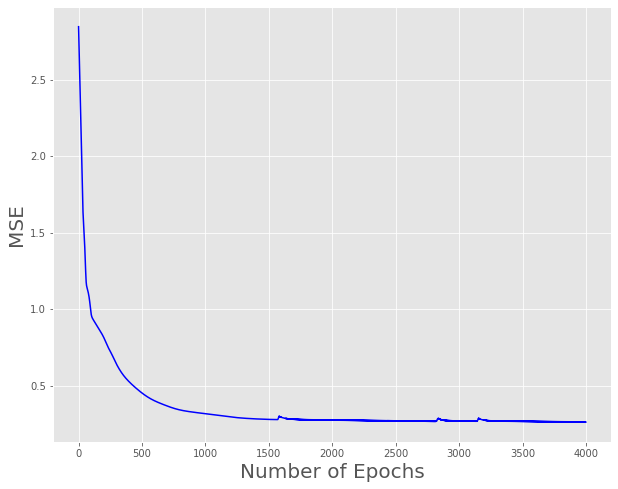

In [26]:
plt.figure(figsize=(10,8))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = plt.plot(range(epochMax),MSEAv,'b')
plt.xlabel('Number of Epochs', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.show()

In [27]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
XN = dg.values
XP = df.values
datamisclass = data
Ymisclass = MLP(datamisclass[:,0:2].T,Wh6,Wo6)    #pick one of the weights to classify new dataset
H = np.multiply(datamisclass[:,2],Ymisclass)
datamisclass[:,2] = H
misclass = datamisclass[datamisclass[:,2] <0]

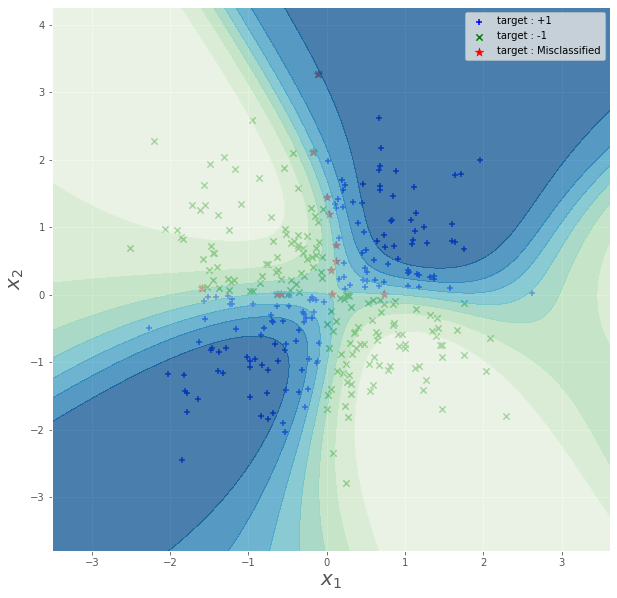

In [28]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(misclass[:,0],misclass[:,1],marker='*', c='r',label = "target : Misclassified", s=80)
plt.legend()

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))

# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
Y = MLP(Xvals[:,1:3].T,Wh4,Wo4)    #pick the weights you have selected in last section
# Plot contour plot
scores = Y.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.7,  cmap='GnBu')
# show the plot
plt.show()
plt.close()